# Problem Statement

## The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Use EDA to analyze the patterns present in the data.

### Objective

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In [1]:
import warnings 
warnings.simplefilter('ignore')

In [2]:
#Importing the required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading the Current application data
df = pd.read_csv("application_data.csv")
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [4]:
# Printing the shape of the data
df.shape

(307511, 122)

In [5]:
# Finding the null values
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

Too many columns to display all the data. But we can see that there are a lot of null values in the last few columns displayed.

In [6]:
# Checking the numerical variables
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

Not much of information can be taken from the above observation. But one thing we can see that there are a lot of numerical variables to deal with.

In [7]:
# Lets check all the column names which our data contains
df.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

There are a lot of columns in the data set. Let's see which are useful and which are not by eliminating null values from the data.

In [8]:
# Let's print the length of the data although we have checked that in the shape but still
len(df)

307511

This much of applicant's data is there in the data set which we are doing handson. Now, let's proceed to data cleaning.

## Data Cleaning

### Lets deal with outliers first.

In [9]:
# Retrieving numerical columns
numericals = df.describe().columns
numericals

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

In [10]:
# Retrieving categorical columns
categorical = list(set(df.columns) - set(numericals))
categorical

['WEEKDAY_APPR_PROCESS_START',
 'OCCUPATION_TYPE',
 'WALLSMATERIAL_MODE',
 'FLAG_OWN_CAR',
 'NAME_EDUCATION_TYPE',
 'NAME_HOUSING_TYPE',
 'NAME_CONTRACT_TYPE',
 'ORGANIZATION_TYPE',
 'CODE_GENDER',
 'NAME_TYPE_SUITE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'NAME_FAMILY_STATUS',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'EMERGENCYSTATE_MODE']

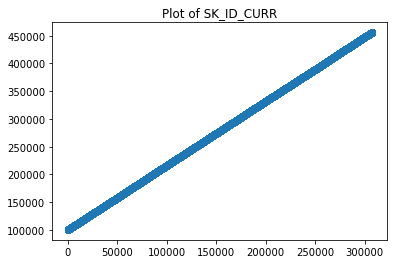

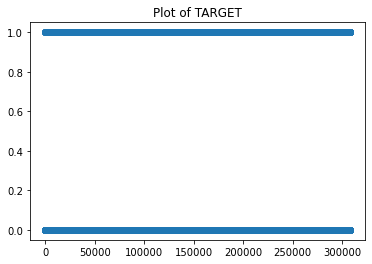

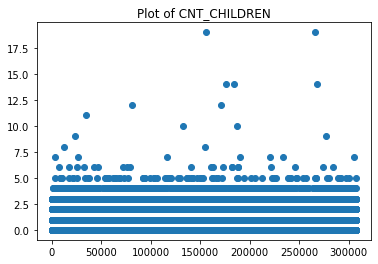

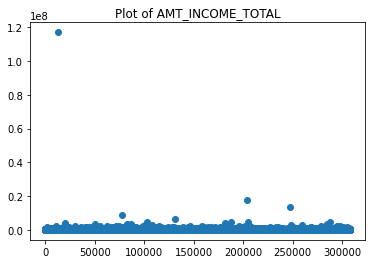

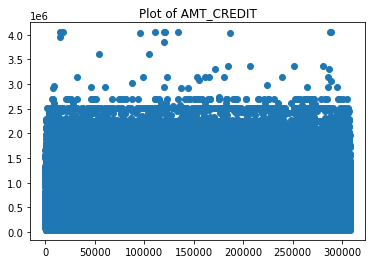

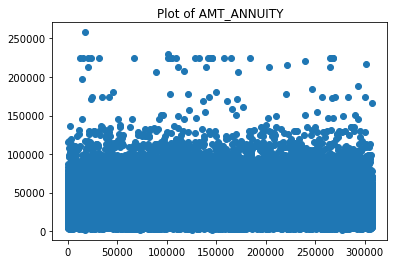

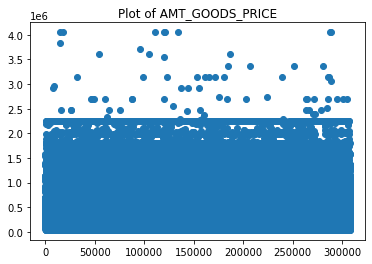

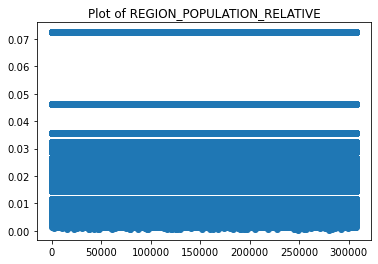

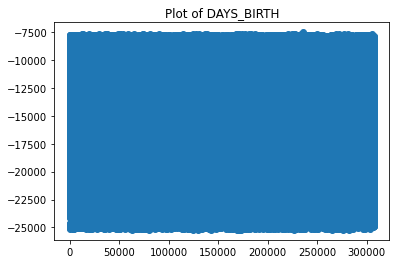

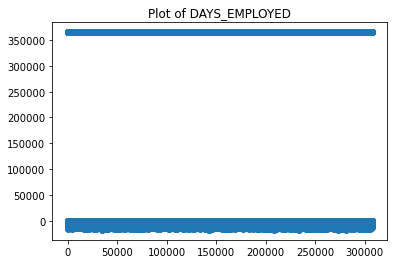

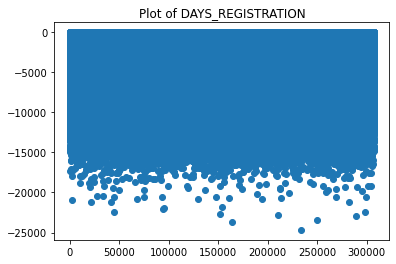

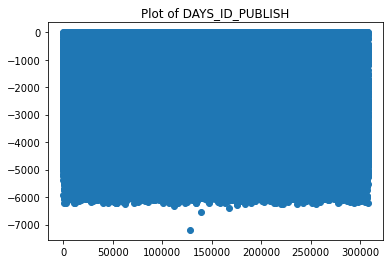

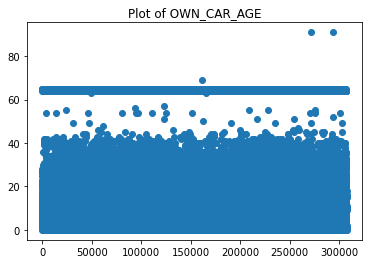

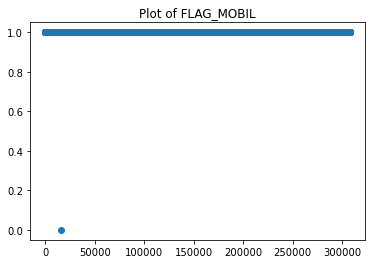

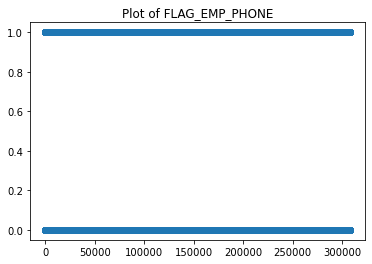

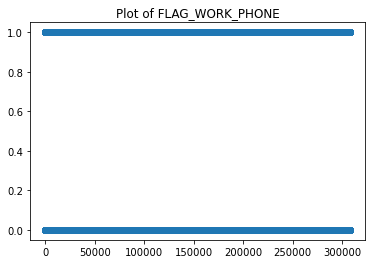

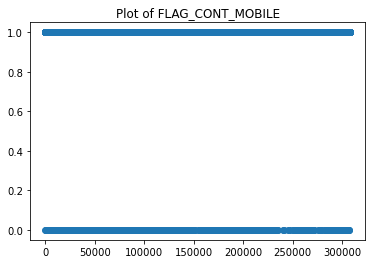

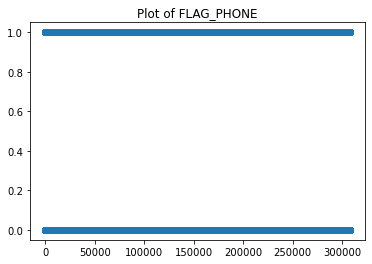

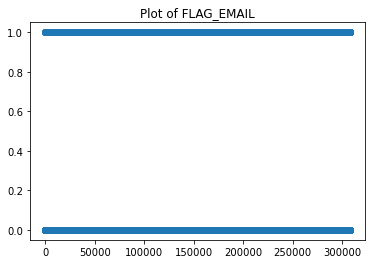

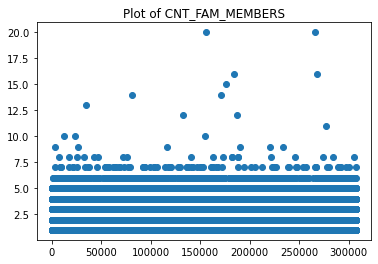

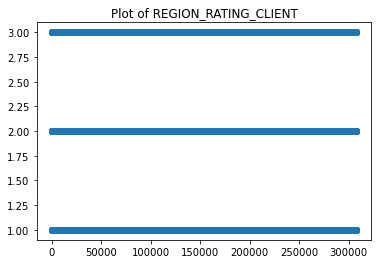

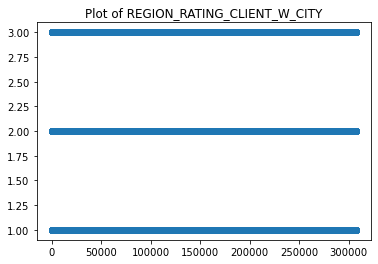

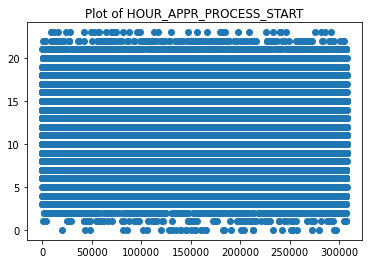

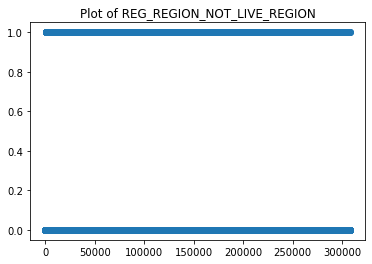

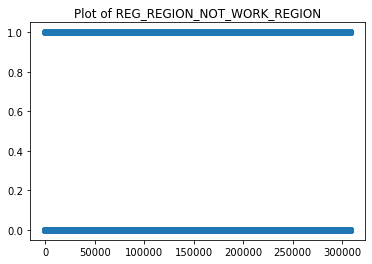

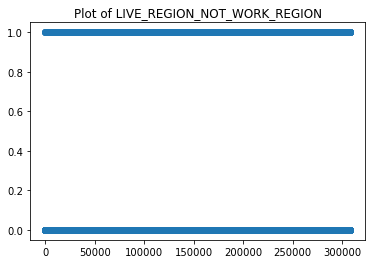

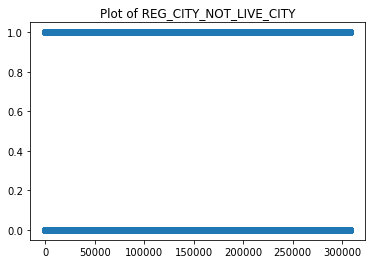

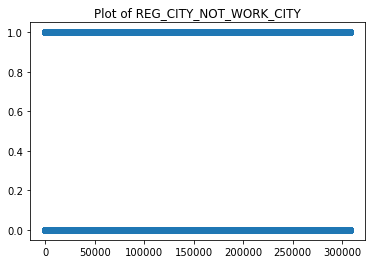

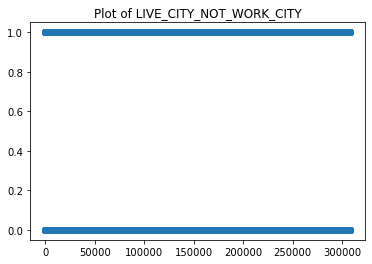

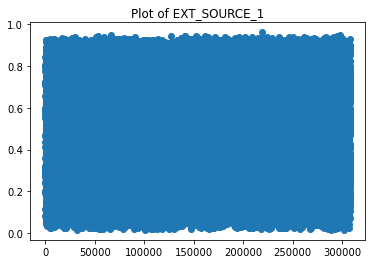

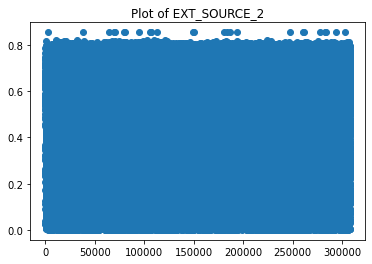

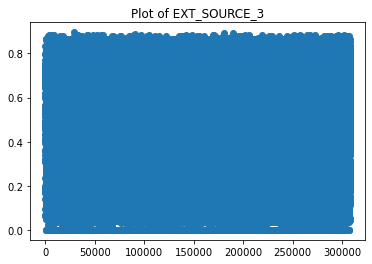

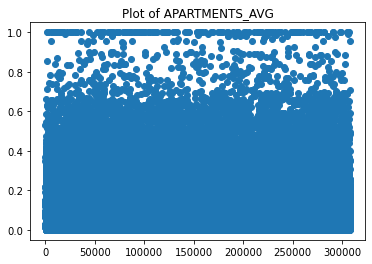

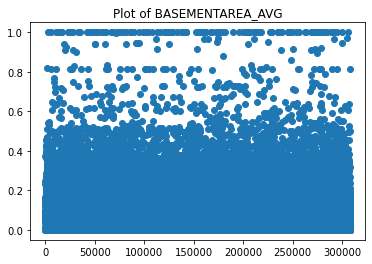

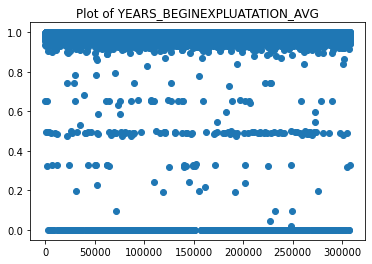

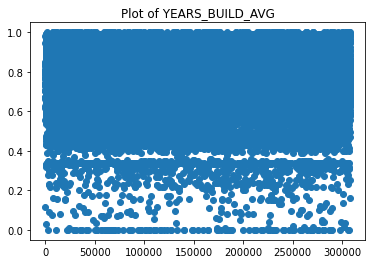

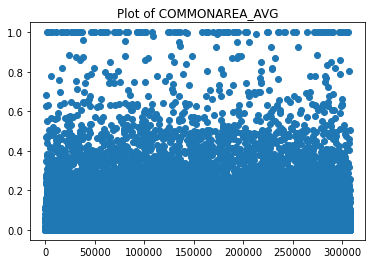

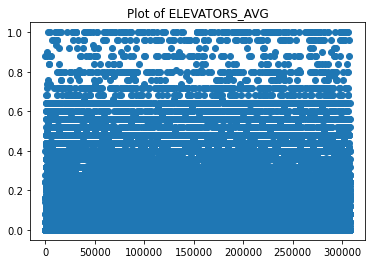

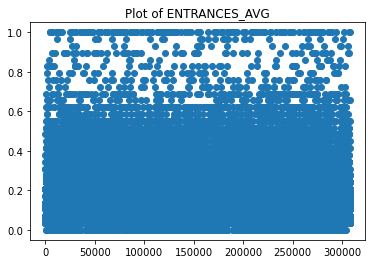

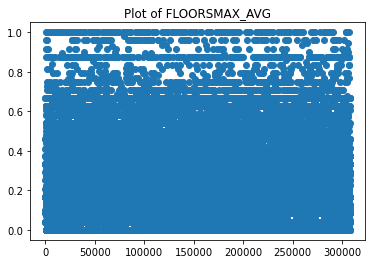

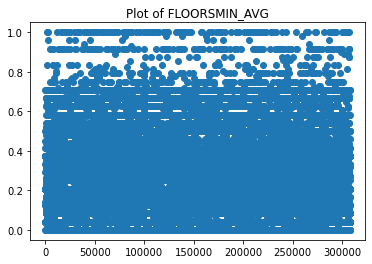

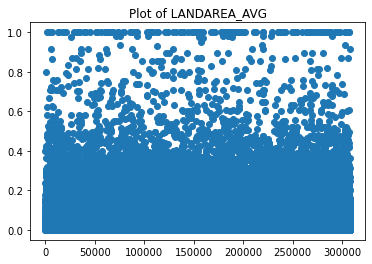

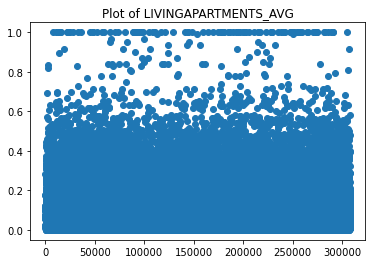

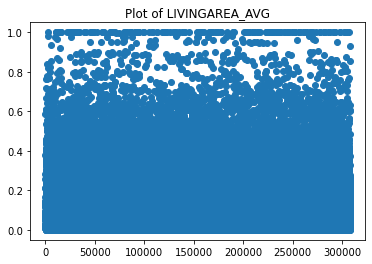

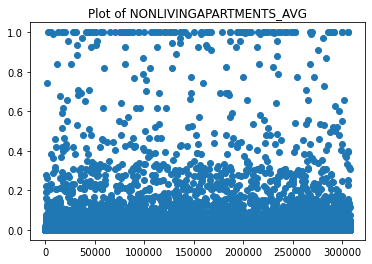

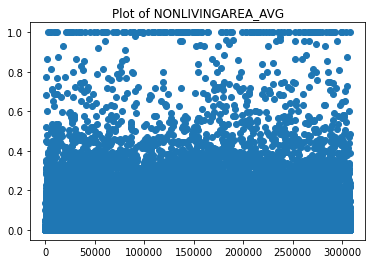

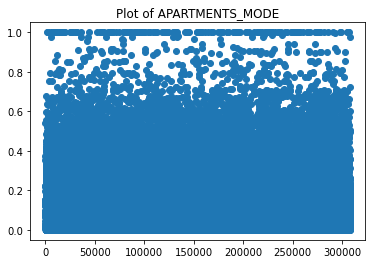

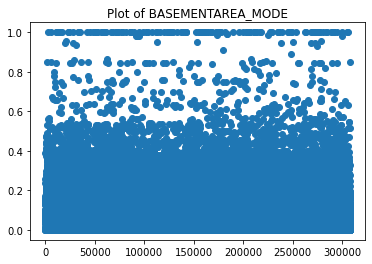

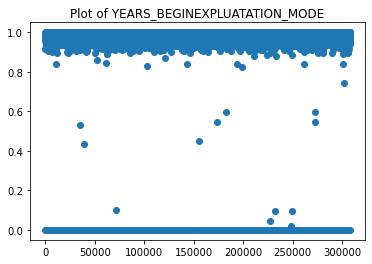

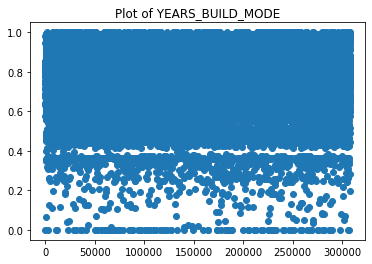

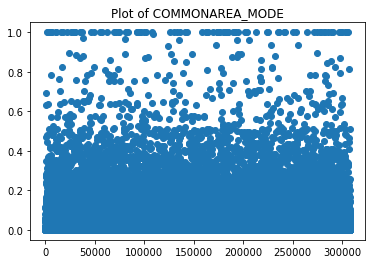

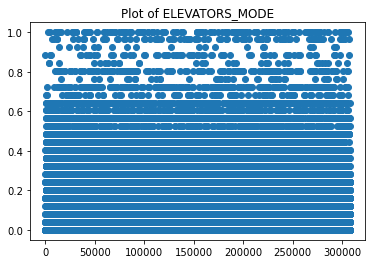

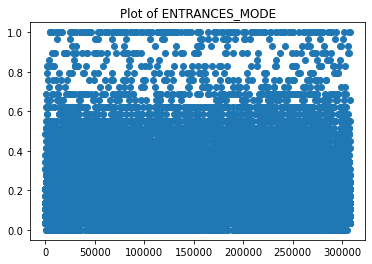

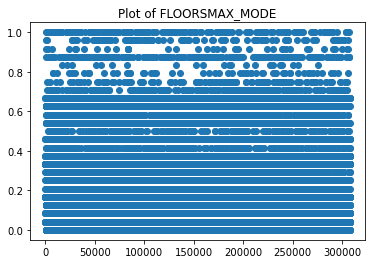

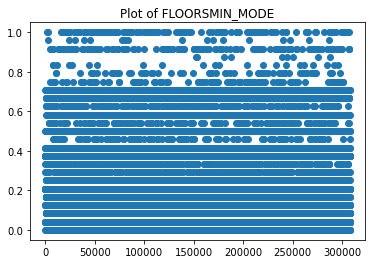

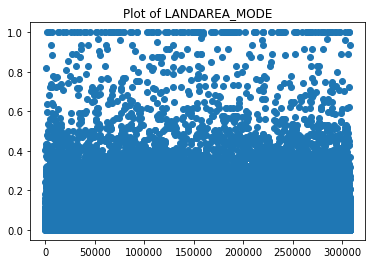

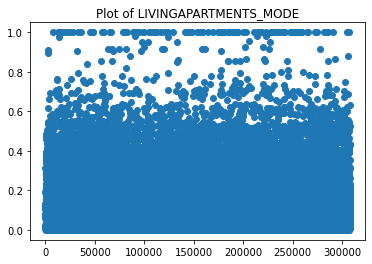

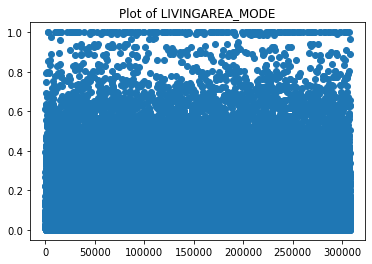

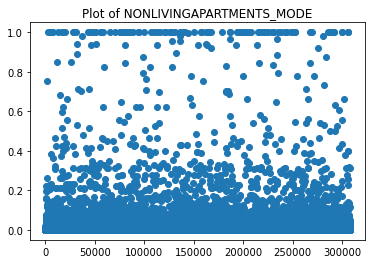

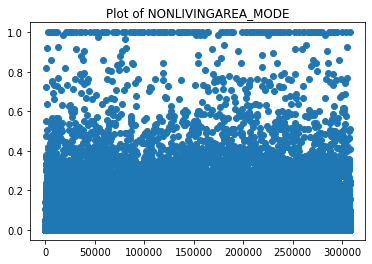

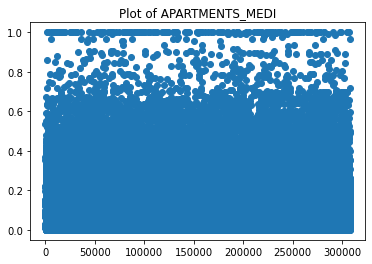

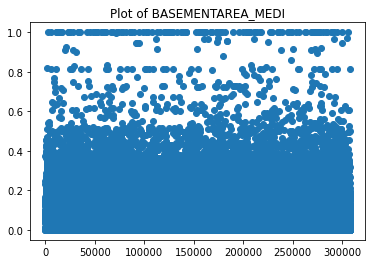

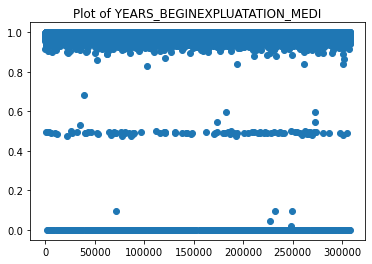

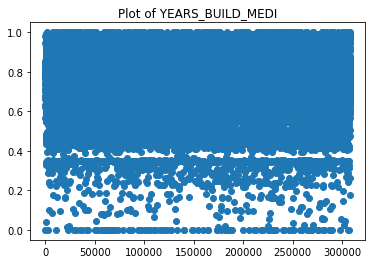

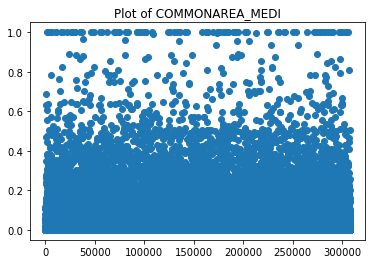

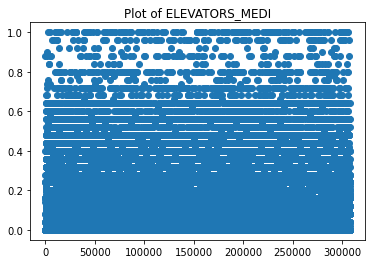

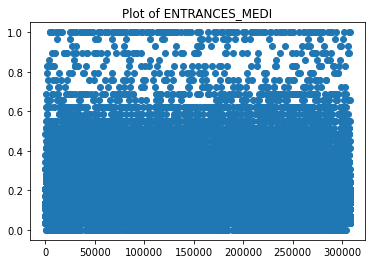

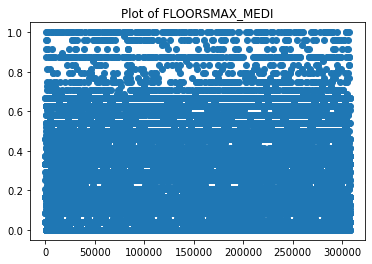

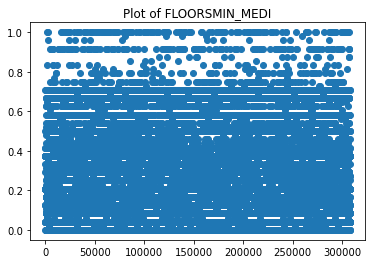

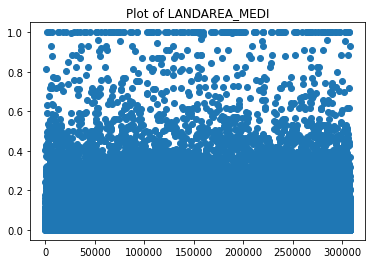

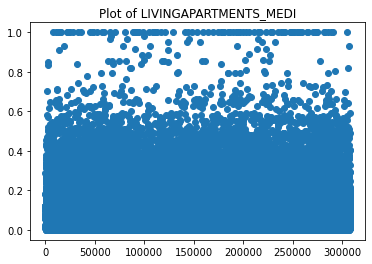

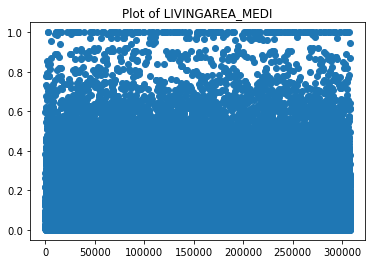

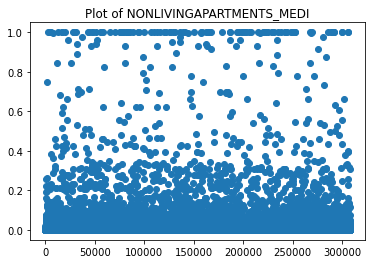

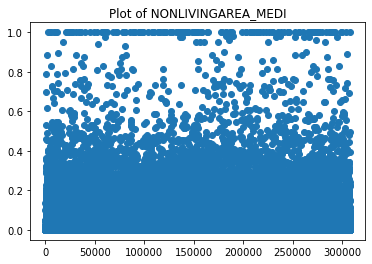

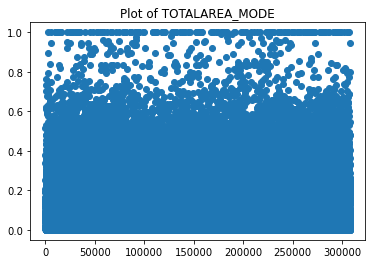

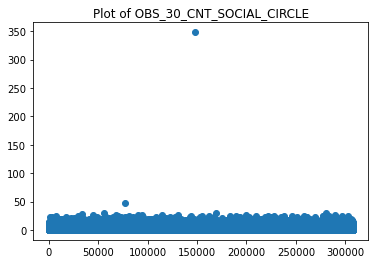

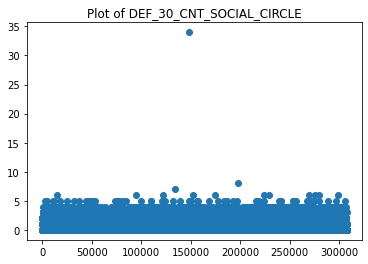

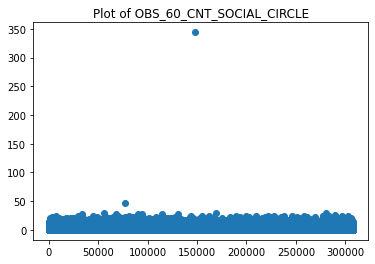

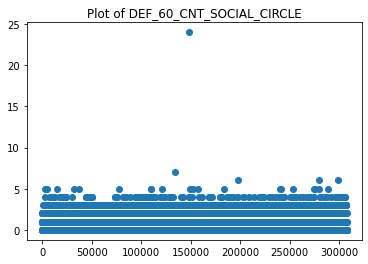

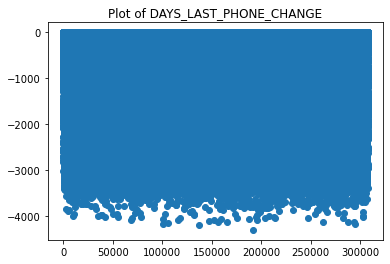

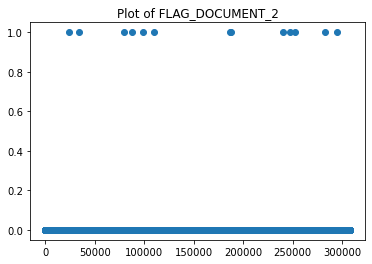

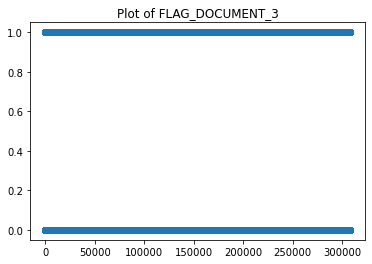

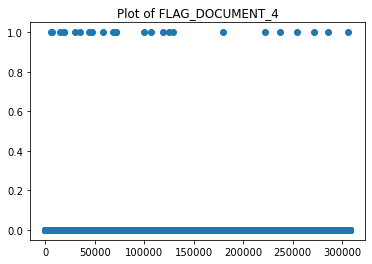

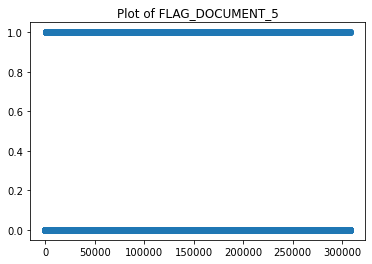

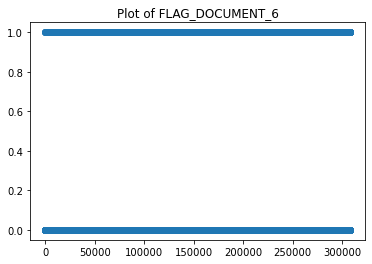

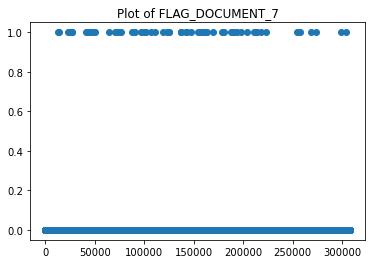

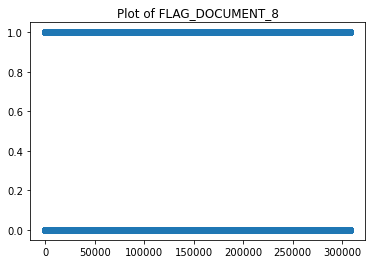

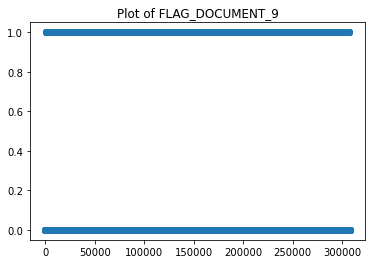

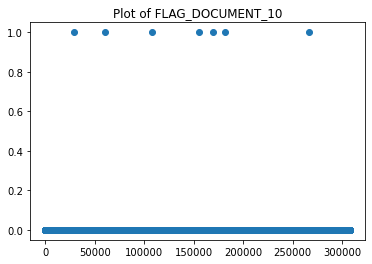

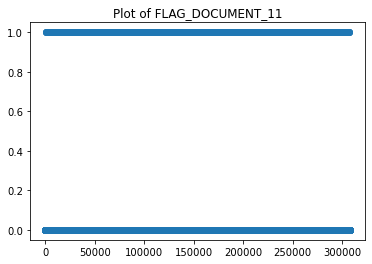

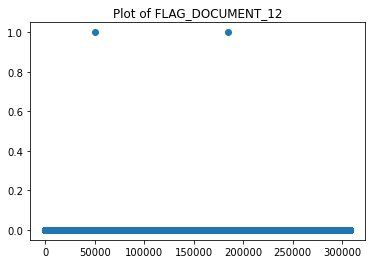

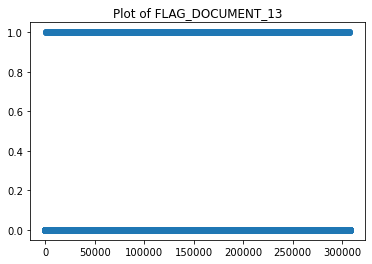

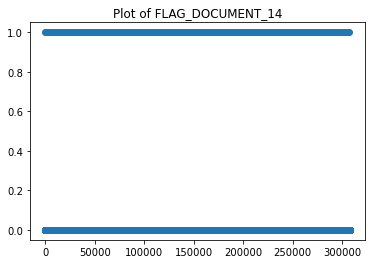

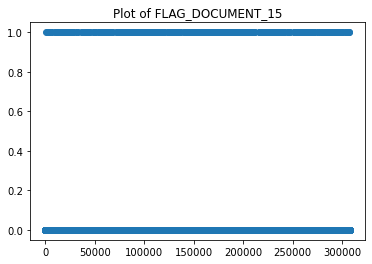

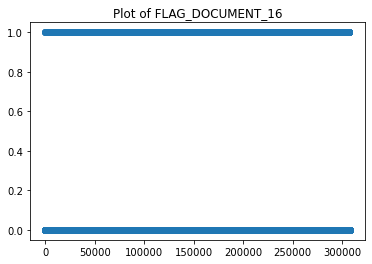

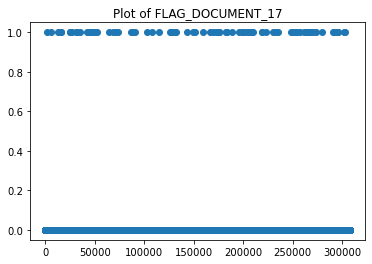

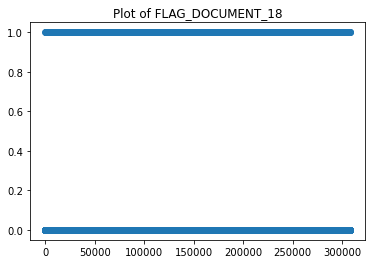

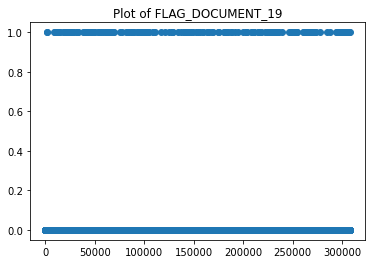

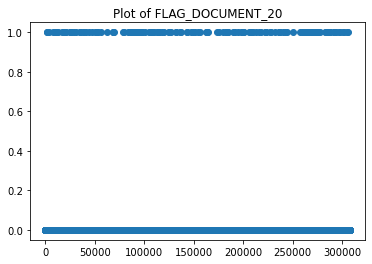

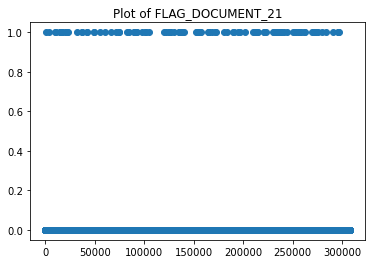

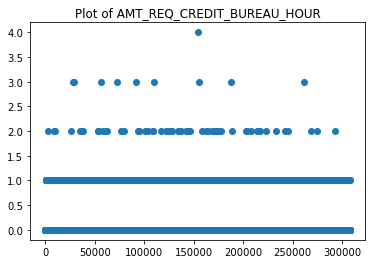

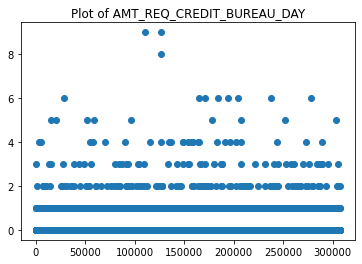

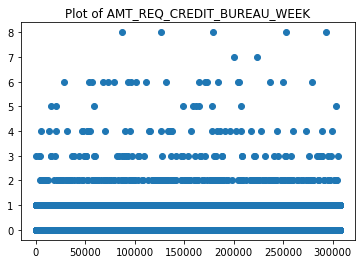

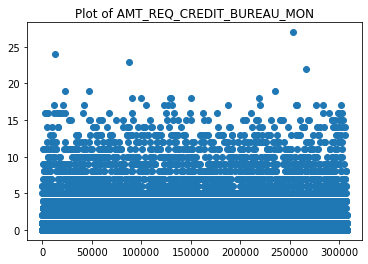

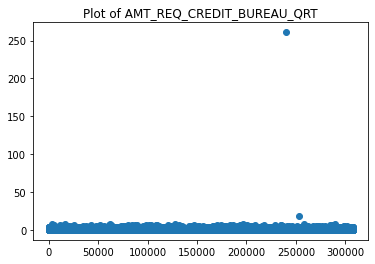

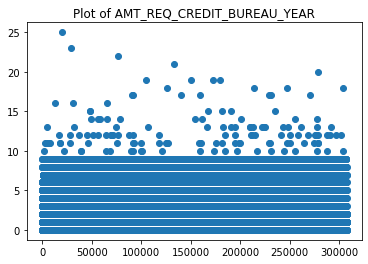

In [11]:
# Outliers
for column in numericals:
    plt.scatter(df.index, df[column])
    plt.title("Plot of "+column)
    plt.show()

After seeing the above plot, we can infer that there are a lot of outliers in most of the columns and we have to deal with them accordingly.

In [12]:
# Let look at CNT_CHILDREN column first
df['CNT_CHILDREN'].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

I don't think people these days have this much children. I mean 5 children are also extreme. Hence, people with children more than 6 are outliers in my view. Hence removing those from the data.

In [13]:
df[df['CNT_CHILDREN'] > 6]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
3079        103596       0         Cash loans           M            N   
12615       114709       0         Cash loans           M            Y   
23881       127782       1         Cash loans           F            N   
26195       130468       0         Cash loans           F            Y   
34545       140032       1         Cash loans           M            Y   
80948       193853       0         Cash loans           F            N   
116428      235015       0         Cash loans           M            N   
132585      253779       0         Cash loans           F            N   
154317      278853       0         Cash loans           F            Y   
155369      280108       0         Cash loans           F            N   
171125      298322       0    Revolving loans           F            N   
176011      303956       0         Cash loans           M            Y   
183878      313127       0         Cash loans           F            Y   
186820      316580       0         Cash loans           F            N   
190547      320933       0         Cash loans           M            N   
220134      355015       0         Cash loans           F            N   
233611      370590       0         Cash loans           M            N   
265784      407877       0         Cash loans           F            N   
267998      410527       0         Cash loans           F            N   
276768      420739       1         Cash loans           M            Y   
305112      453499       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
3079                 Y             7           85500.0    411813.0   
12615                N             8          112500.0    755190.0   
23881                N             9          180000.0    640080.0   
26195                Y             7          180000.0   1288350.0   
34545                N            11          315000.0   1007761.5   
80948                Y            12          337500.0    746280.0   
116428               Y             7          117000.0    574785.0   
132585               Y            10           67500.0     92655.0   
154317               Y             8          103500.0    239850.0   
155369               Y            19          112500.0    269550.0   
171125               Y            12          225000.0    202500.0   
176011               Y            14          225000.0   1085058.0   
183878               N            14           45000.0    810000.0   
186820               Y            10           67500.0    117162.0   
190547               N             7          202500.0    226422.0   
220134               N             7          157500.0    450000.0   
233611               Y             7          103500.0    110331.0   
265784               Y            19          112500.0    135000.0   
267998               N            14           54000.0    604152.0   
276768               N             9          270000.0    526491.0   
305112               N             7          112500.0    143910.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
3079        17577.0  ...                 0                0                0   
12615       29947.5  ...                 0                0                0   
23881       31131.0  ...                 0                0                0   
26195       41692.5  ...                 0                0                0   
34545       38515.5  ...                 0                0                0   
80948       59094.0  ...                 0                0                0   
116428      34861.5  ...                 0                0                0   
132585       5301.0  ...                 0                0                0   
154317      23719.5  ...                 0                0                0   
155369      13891.5  ...              

In [14]:
df = df[df['CNT_CHILDREN'] <= 6]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307490 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 288.6+ MB


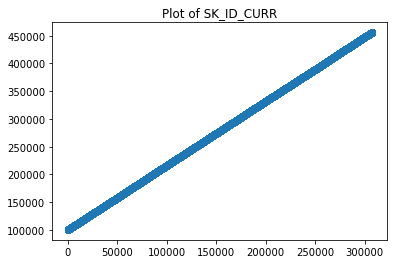

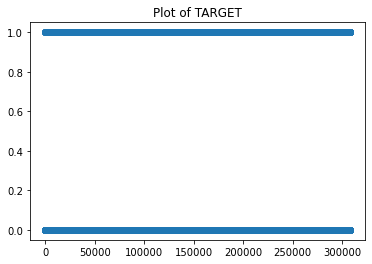

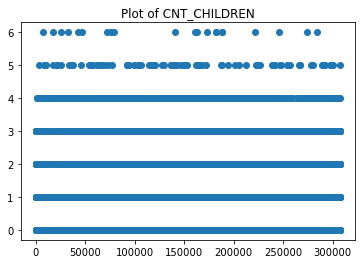

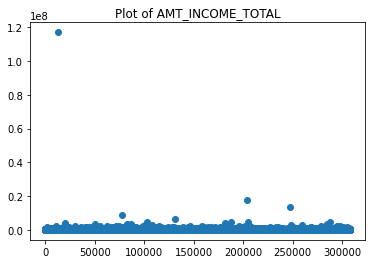

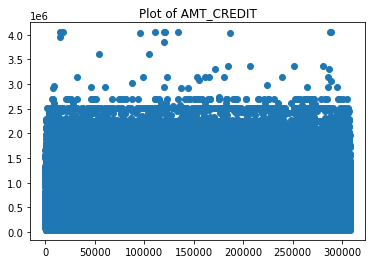

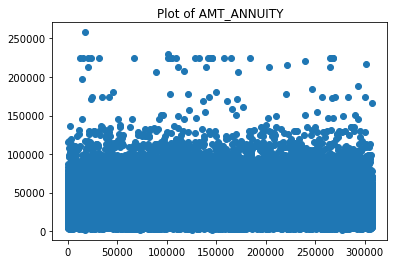

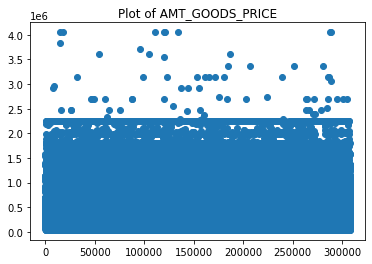

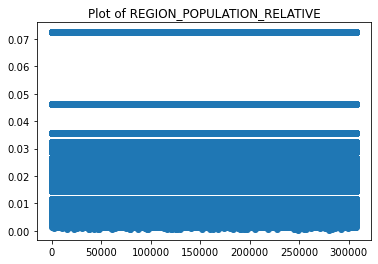

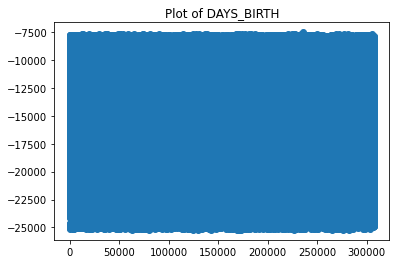

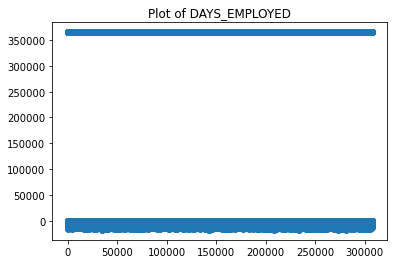

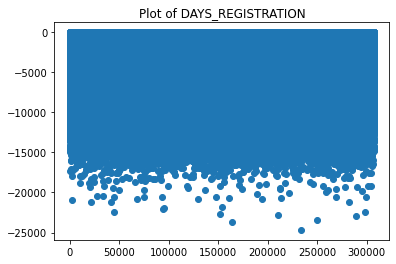

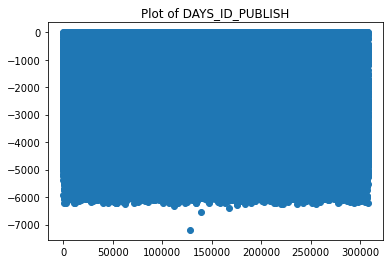

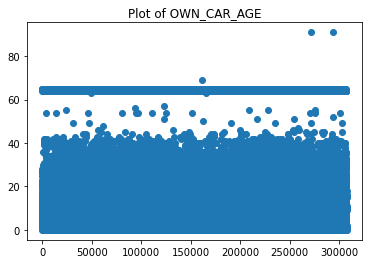

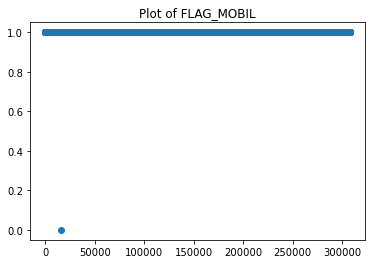

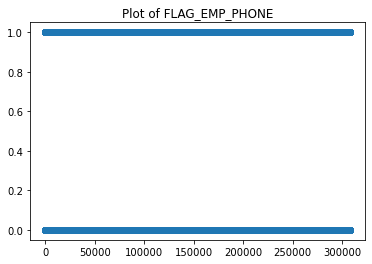

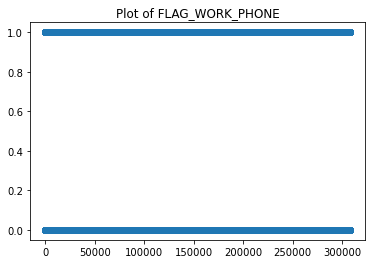

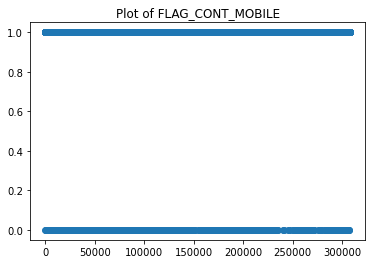

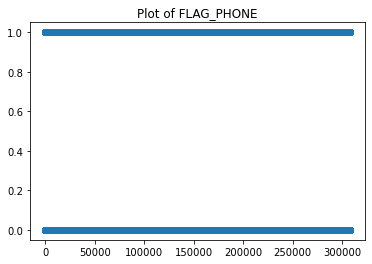

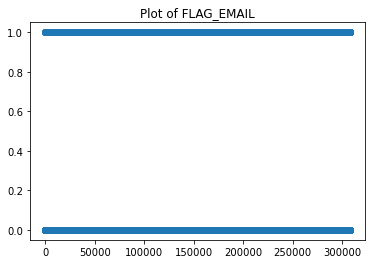

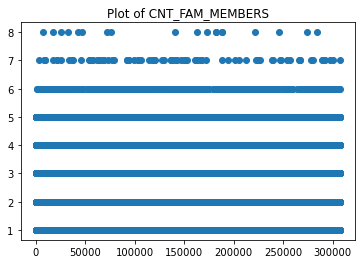

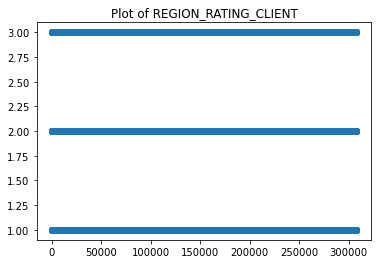

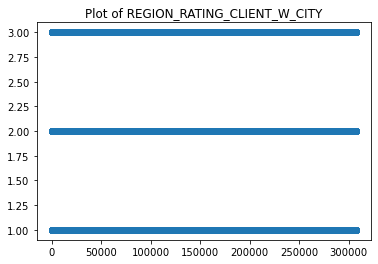

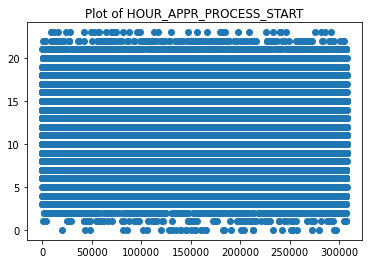

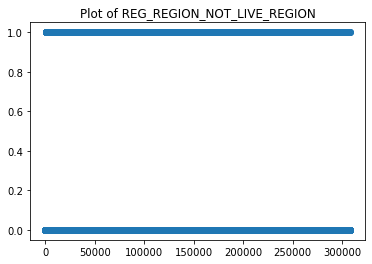

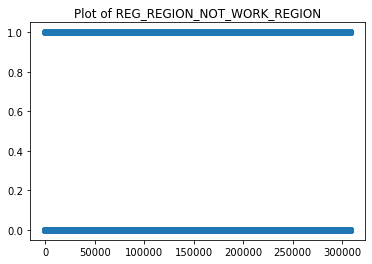

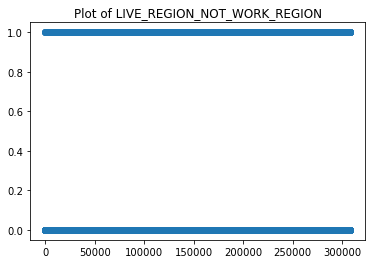

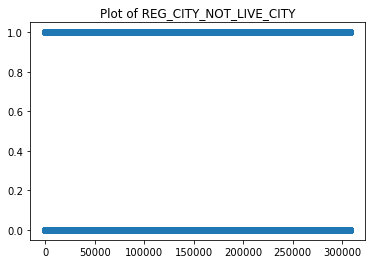

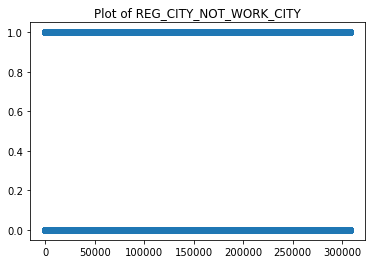

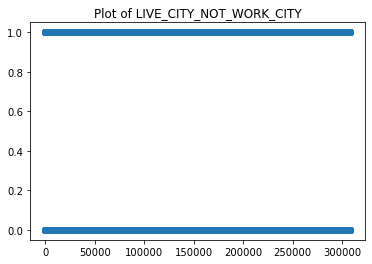

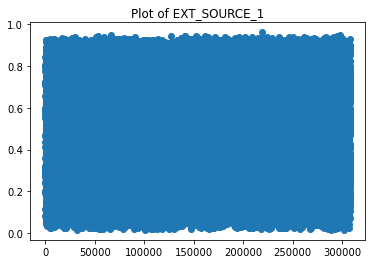

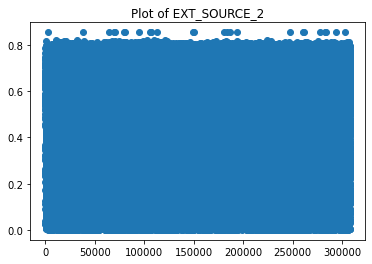

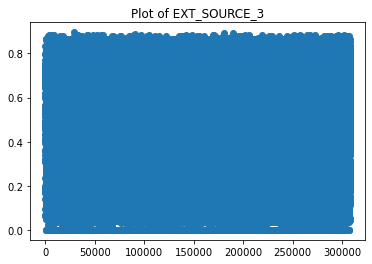

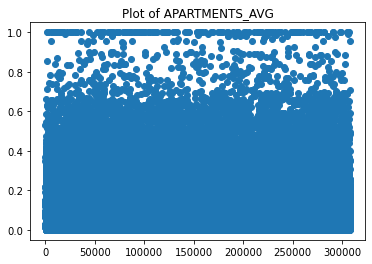

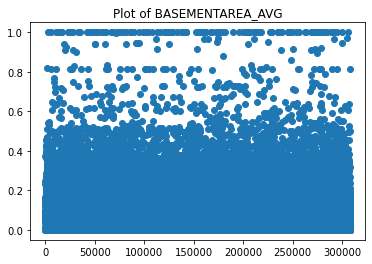

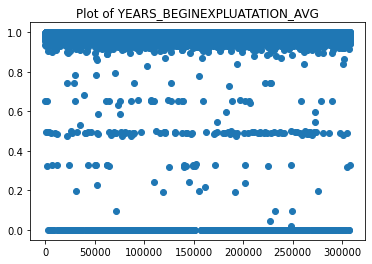

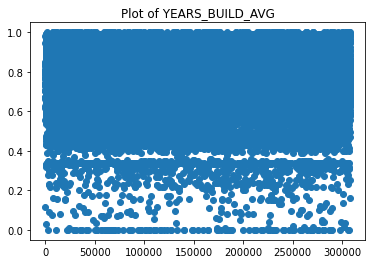

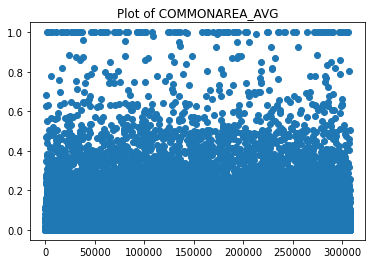

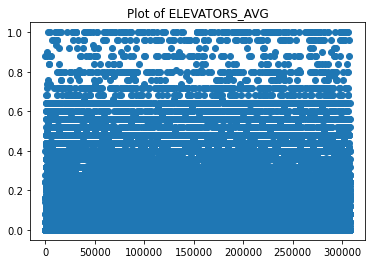

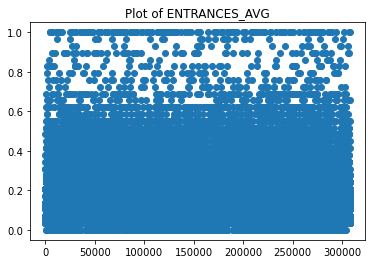

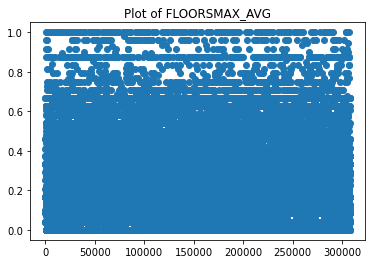

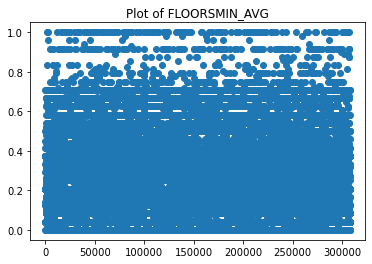

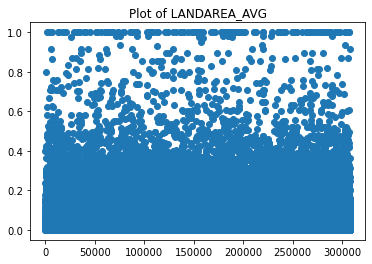

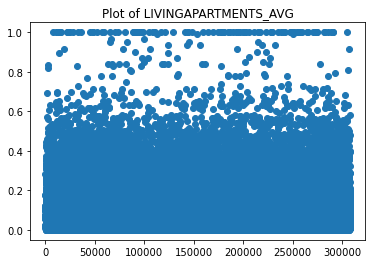

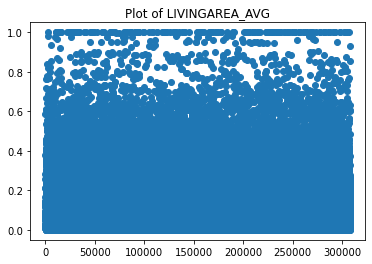

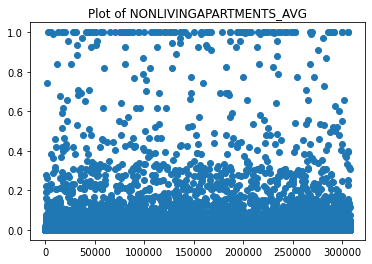

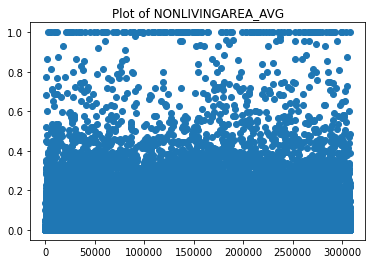

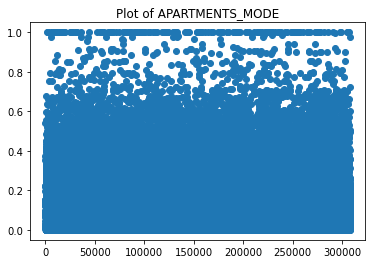

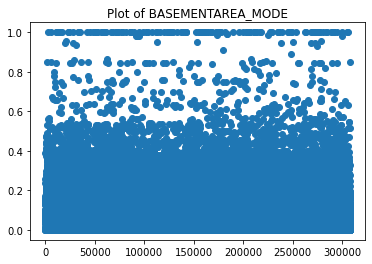

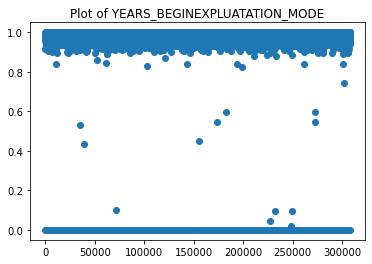

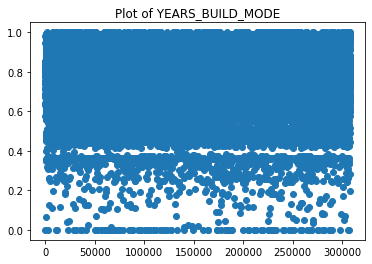

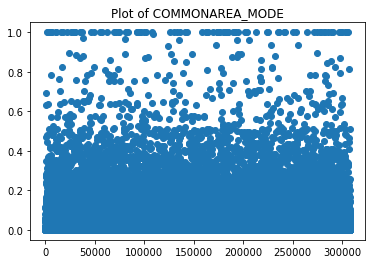

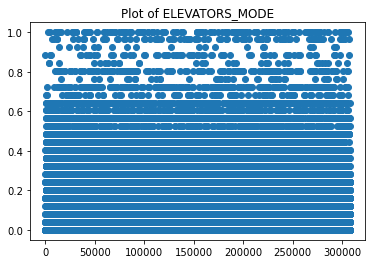

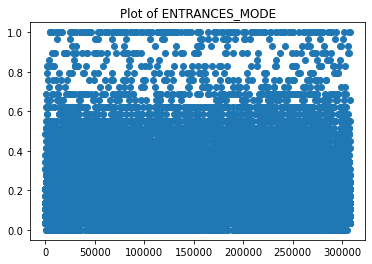

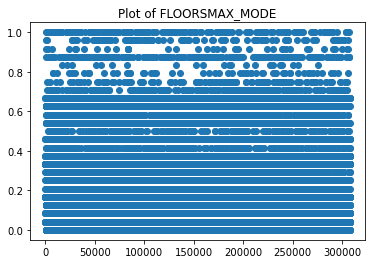

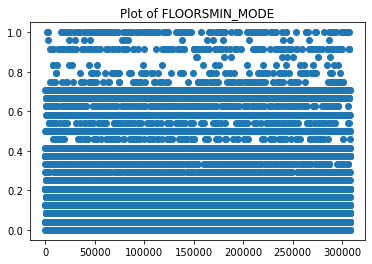

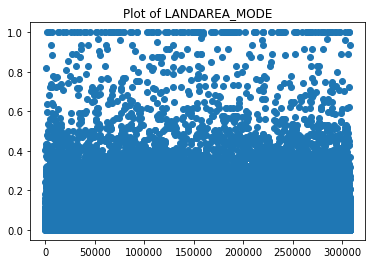

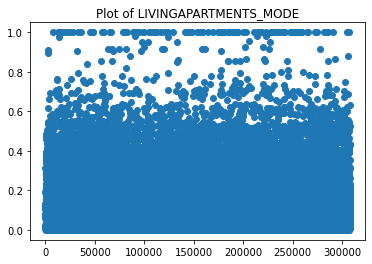

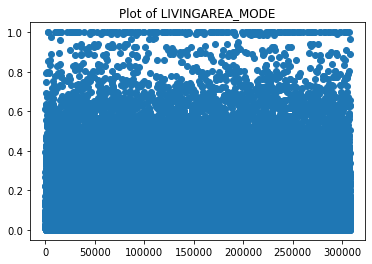

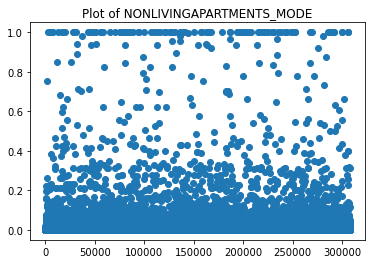

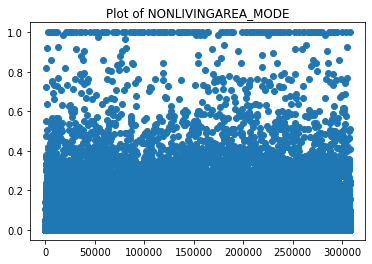

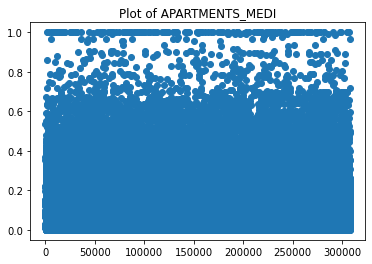

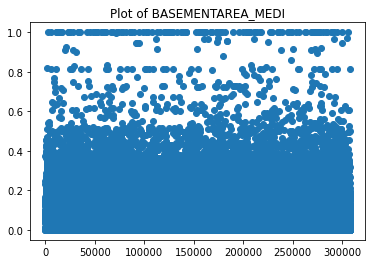

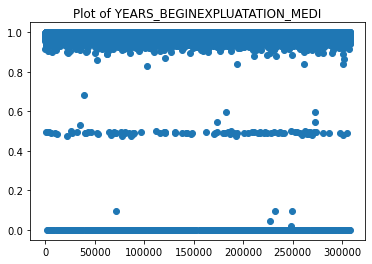

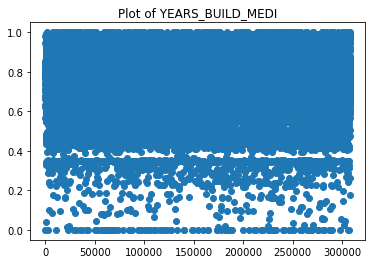

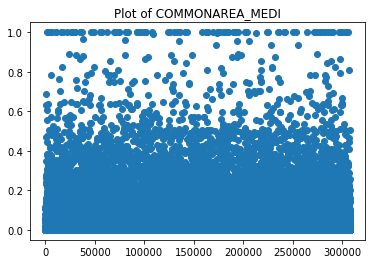

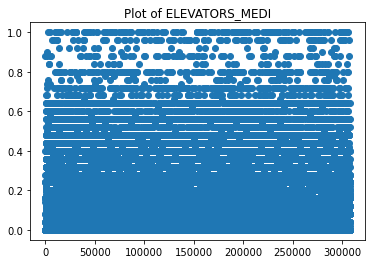

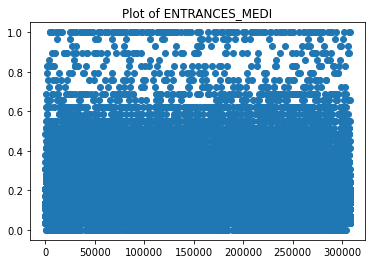

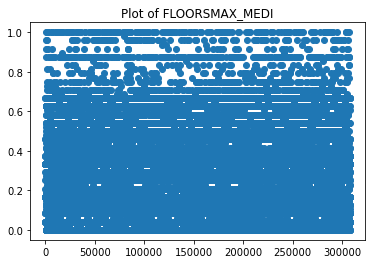

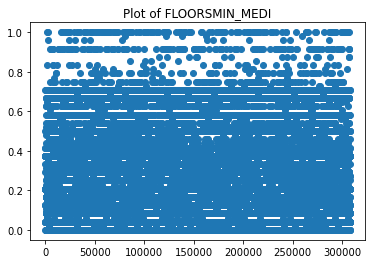

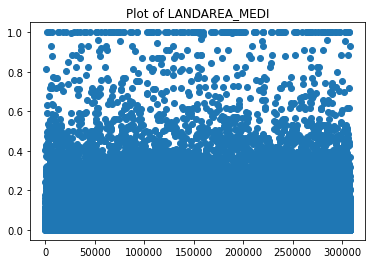

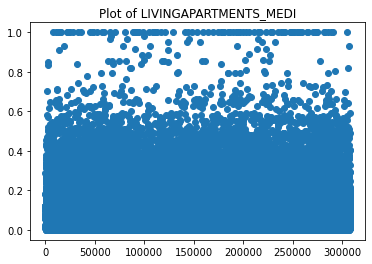

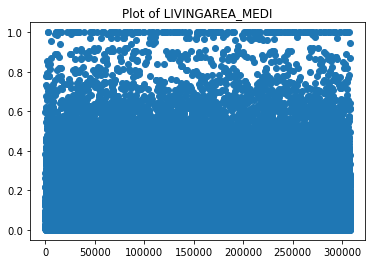

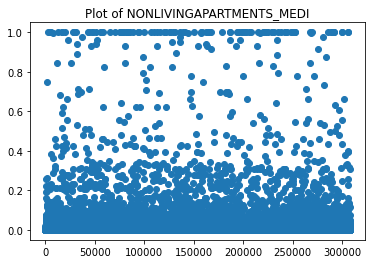

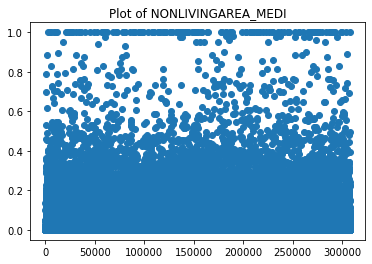

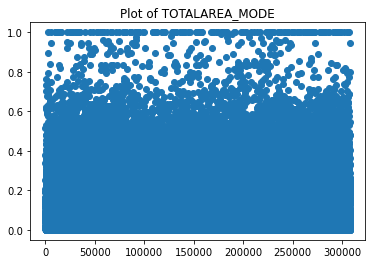

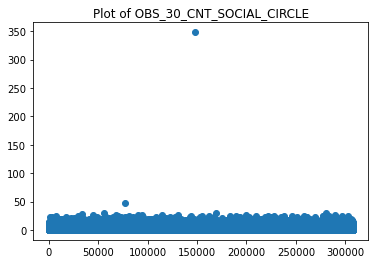

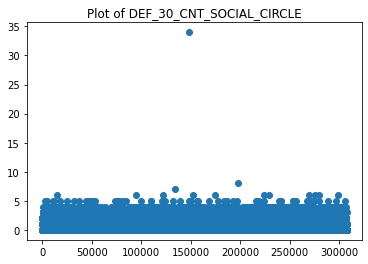

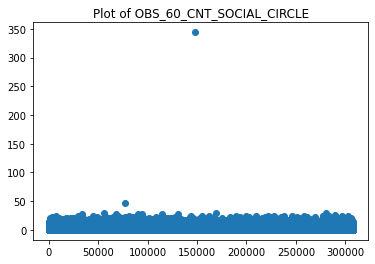

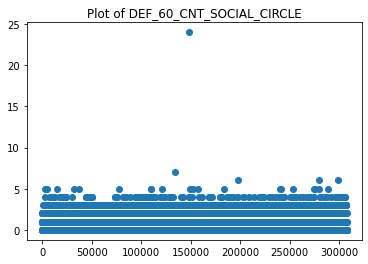

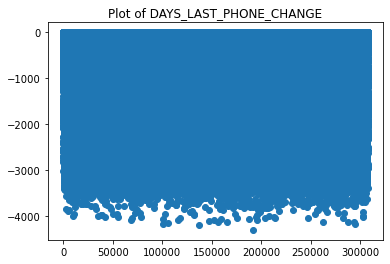

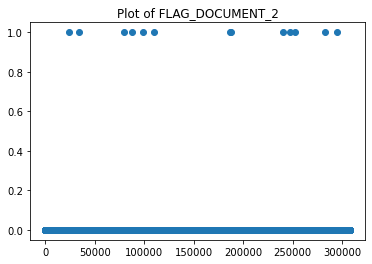

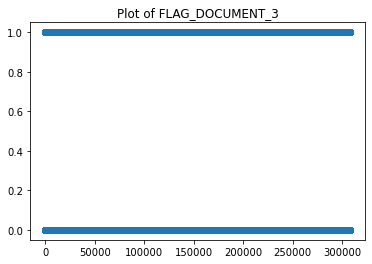

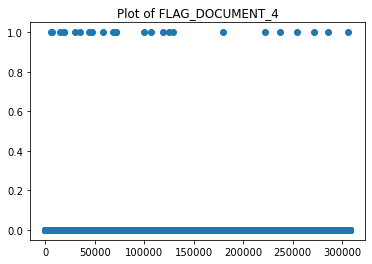

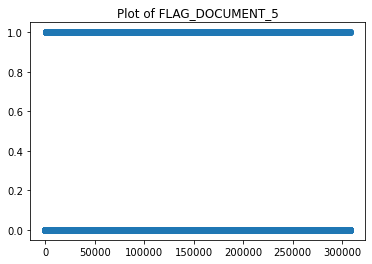

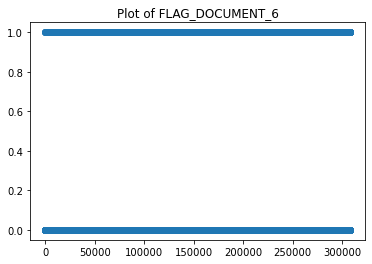

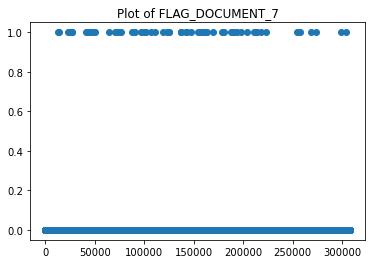

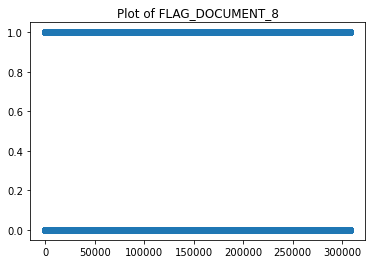

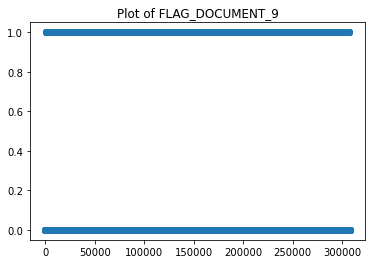

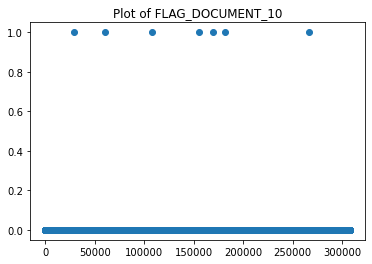

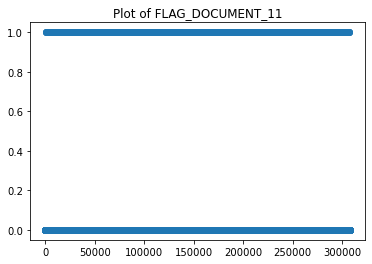

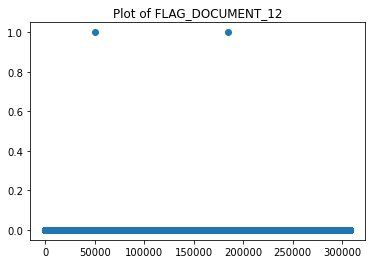

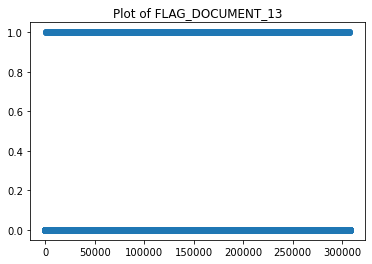

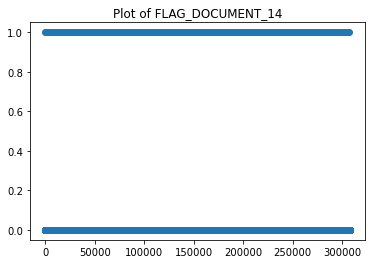

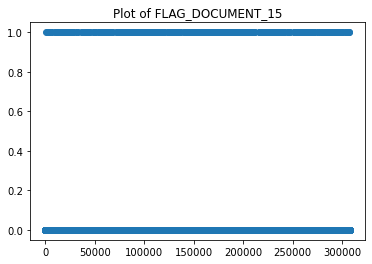

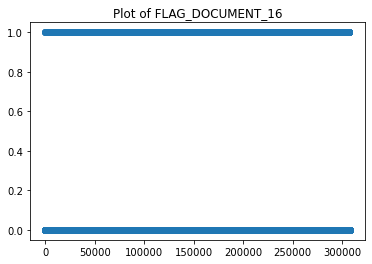

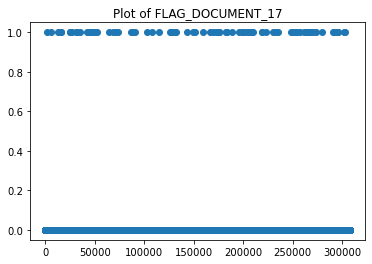

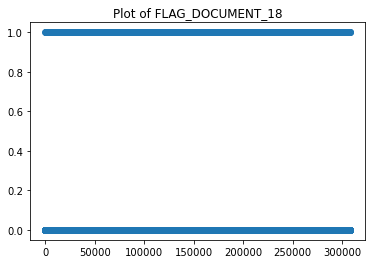

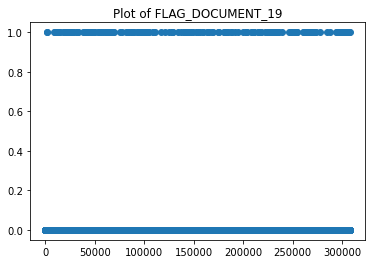

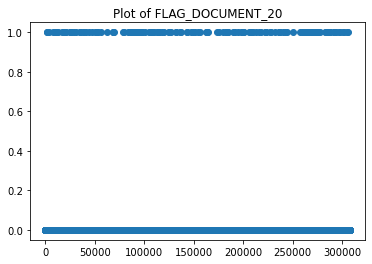

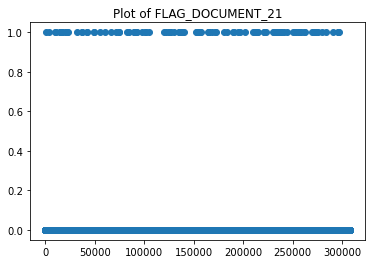

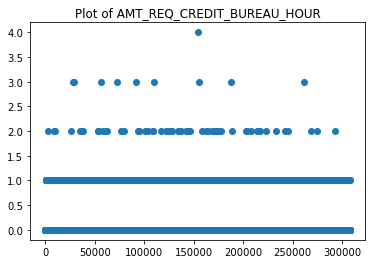

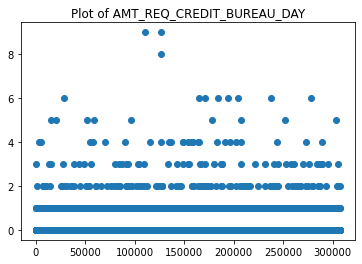

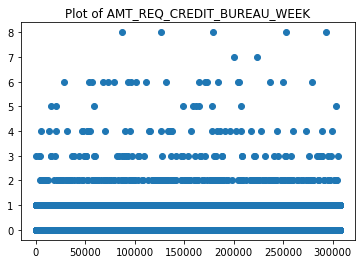

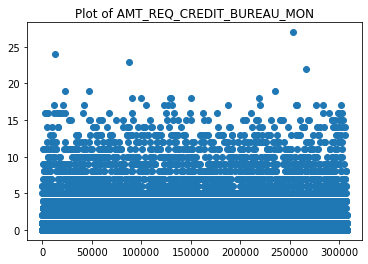

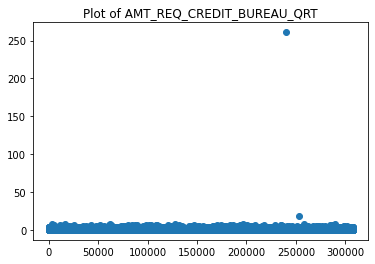

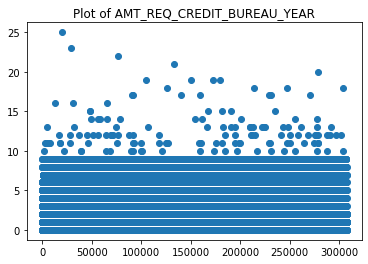

In [15]:
# Lets plot the graph again and see if rest of the outliers are still there.
for column in numericals:
    plt.scatter(df.index, df[column])
    plt.title("Plot of "+column)
    plt.show()

In [16]:
# Lets look at the AMT_INCOME_TOTAL
# Here plot scale is le8 which means 10*8
df[df['AMT_INCOME_TOTAL'] > 100000000]['OCCUPATION_TYPE']

12840    Laborers
Name: OCCUPATION_TYPE, dtype: object

In [17]:
# Since a laborer can not have income in crores, its a fake data. Hence, removing it.
df = df[df['AMT_INCOME_TOTAL'] < 100000000]

In [18]:
# Now remove the outlier in FLAG_MOBIL column because someone living in city must have a mobile in modern days.
# It can be a threat.
df[df['FLAG_MOBIL'] == 0]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
15709      118330       0         Cash loans           M            Y   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
15709               Y             0          126000.0    278613.0   

       AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
15709      25911.0  ...                 1                0                0   

      FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
15709                0                        NaN                       NaN   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
15709                         NaN                        NaN   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
15709                        NaN                         NaN  

[1 rows x 122 columns]

In [19]:
df = df[df['FLAG_MOBIL'] !=0]

In [20]:
# Now lets take OBS_30_CNT_SOCIAL_CIRCLE
df['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts()

0.0      163899
1.0       48780
2.0       29804
3.0       20319
4.0       14143
5.0        9553
6.0        6451
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
24.0         11
25.0         11
27.0          5
26.0          3
30.0          2
28.0          1
348.0         1
29.0          1
47.0          1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [21]:
df[df['OBS_30_CNT_SOCIAL_CIRCLE'] > 300]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
148403      272071       0    Revolving loans           M            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
148403               Y             0          202500.0    180000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
148403       9000.0  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
148403                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
148403                         1.0                        1.0   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
148403                        0.0                         3.0  

[1 rows x 122 columns]

Since, this customer may not be possibly a defaulter hence we can not drop it. Instead, we can replace it with mean to remove the outliers.

In [22]:
df['OBS_30_CNT_SOCIAL_CIRCLE'] = df['OBS_30_CNT_SOCIAL_CIRCLE'].replace([348.0 ], int(df['OBS_30_CNT_SOCIAL_CIRCLE'].mean()))

In [23]:
df['OBS_30_CNT_SOCIAL_CIRCLE'].unique()

array([ 2.,  1.,  0.,  4.,  8., 10., nan,  7.,  3.,  6.,  5., 12.,  9.,
       13., 11., 14., 22., 16., 15., 17., 20., 25., 19., 18., 21., 24.,
       23., 28., 26., 29., 27., 47., 30.])

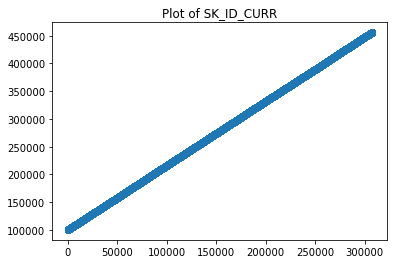

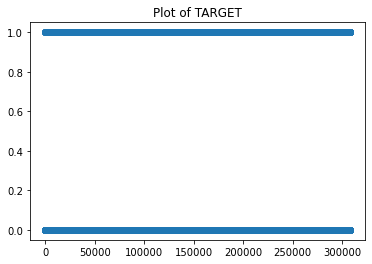

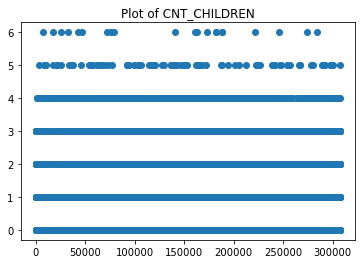

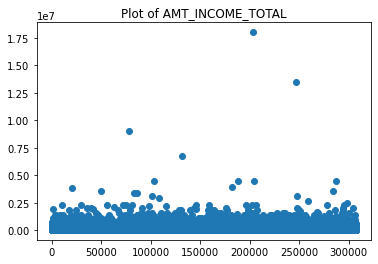

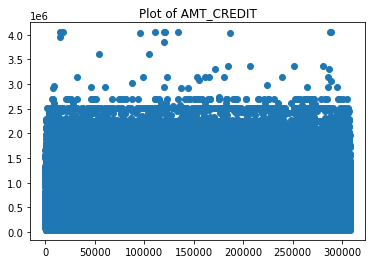

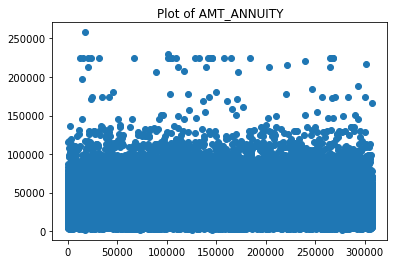

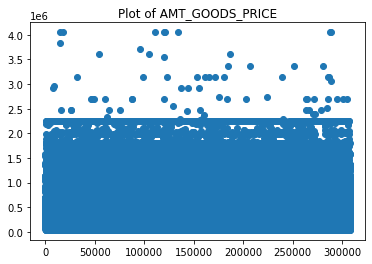

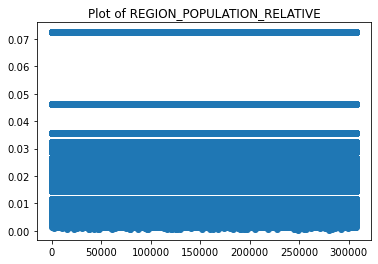

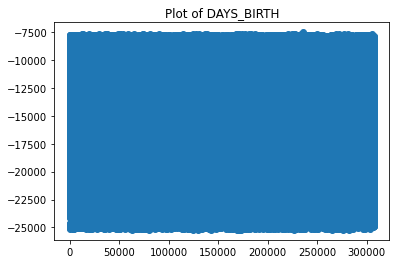

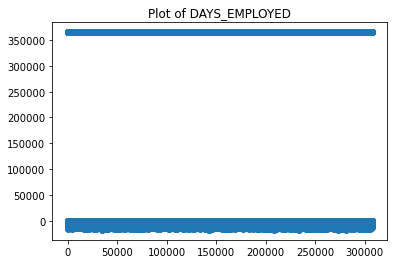

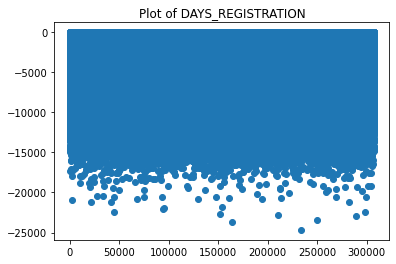

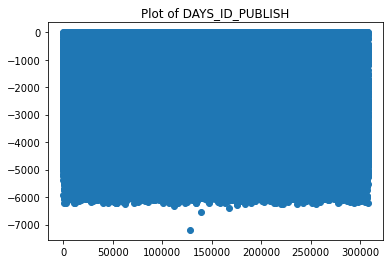

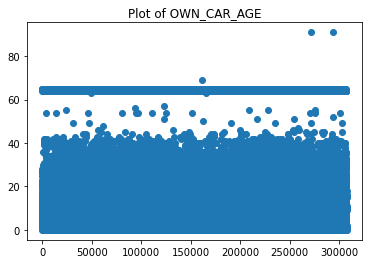

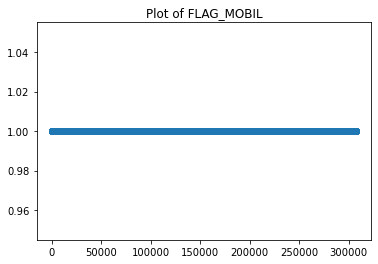

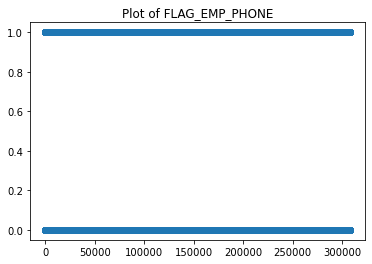

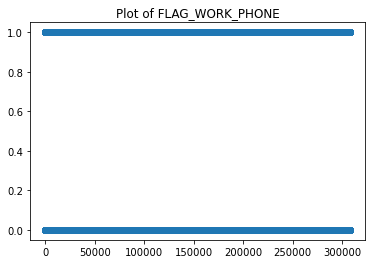

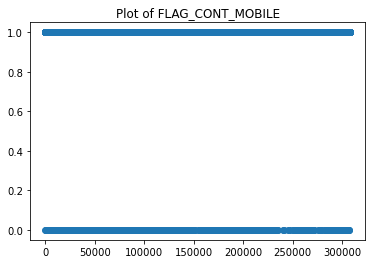

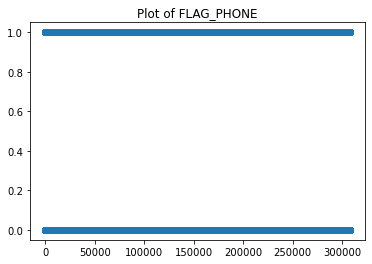

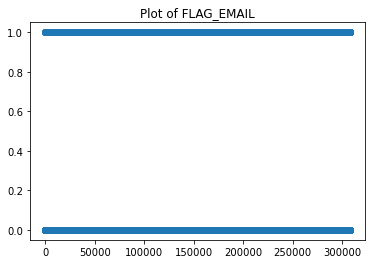

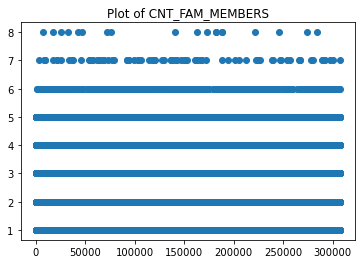

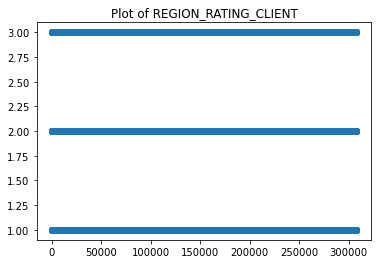

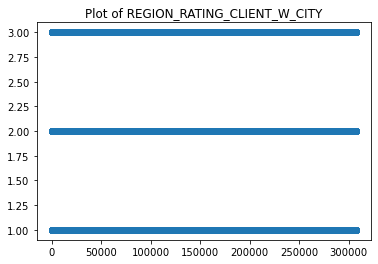

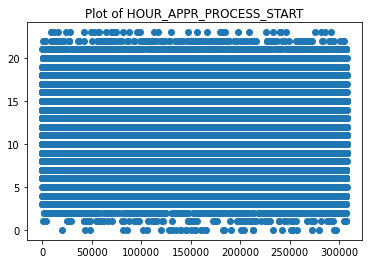

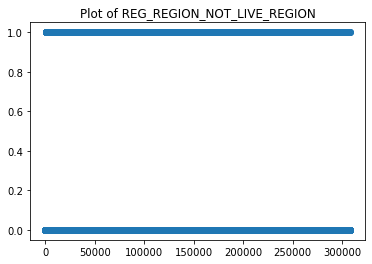

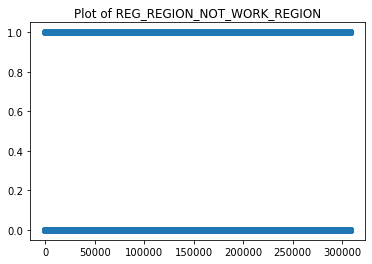

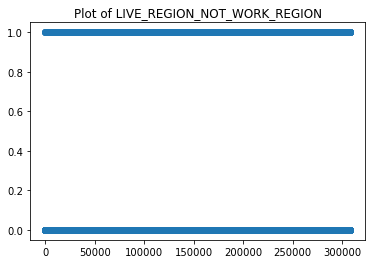

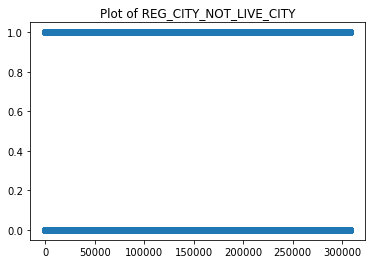

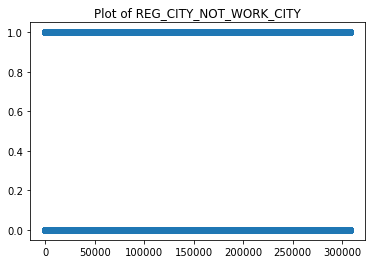

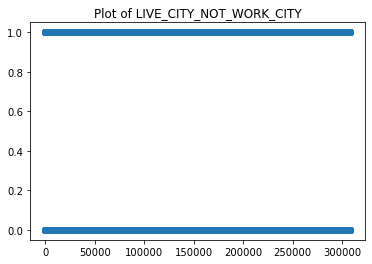

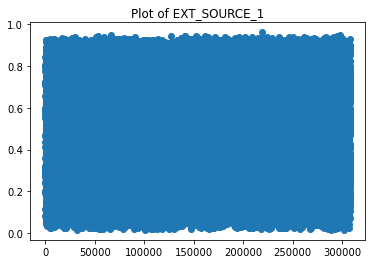

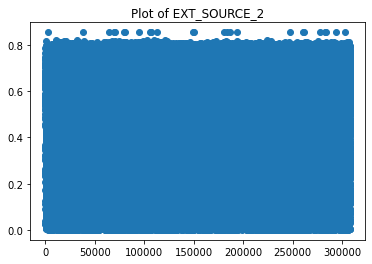

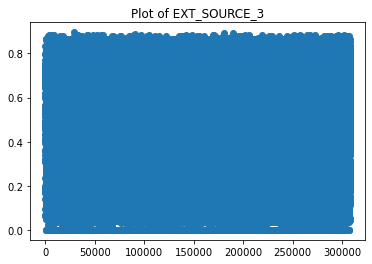

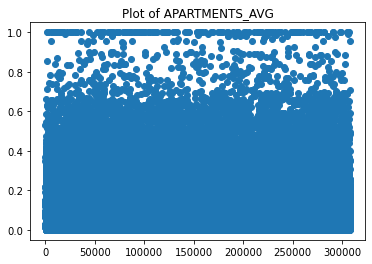

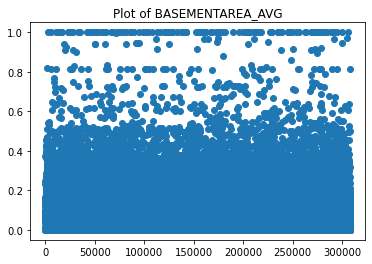

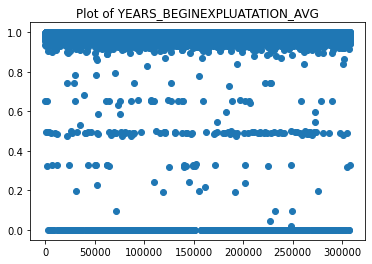

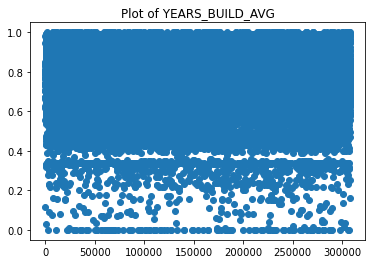

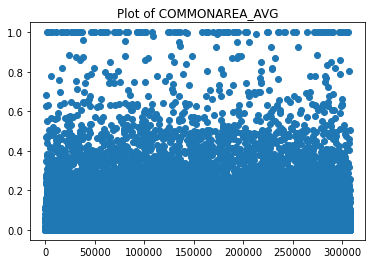

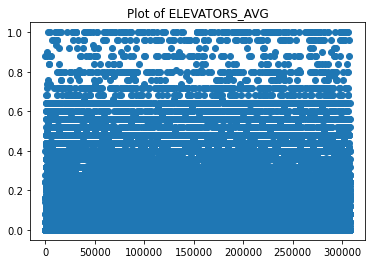

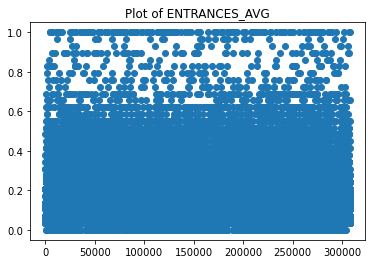

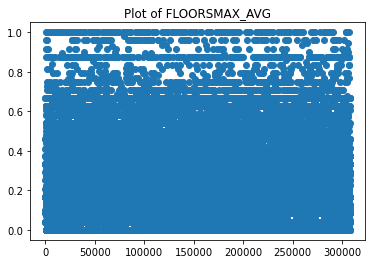

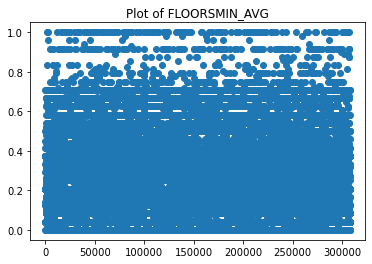

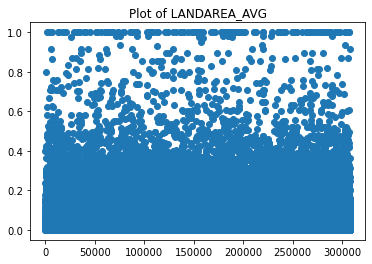

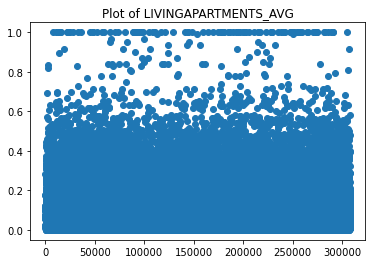

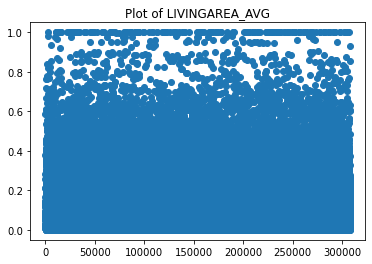

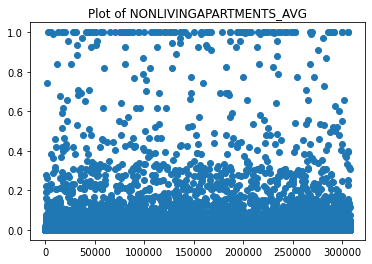

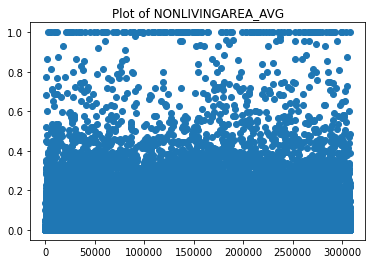

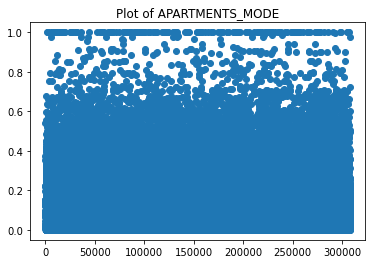

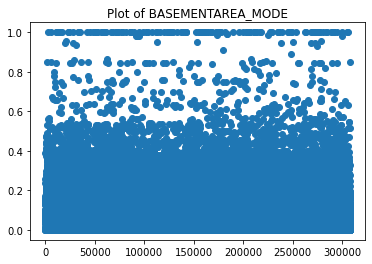

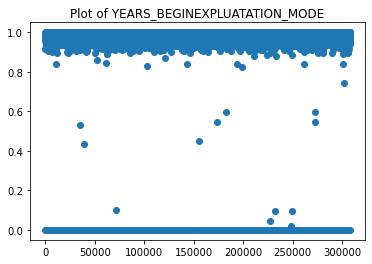

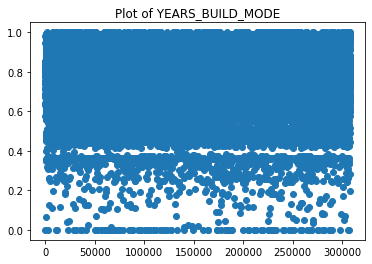

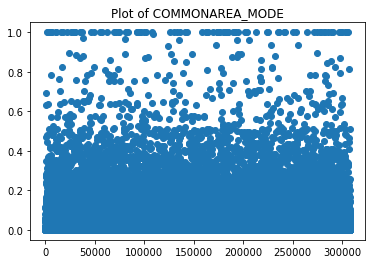

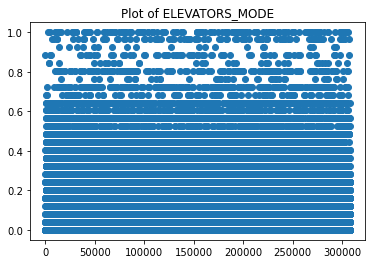

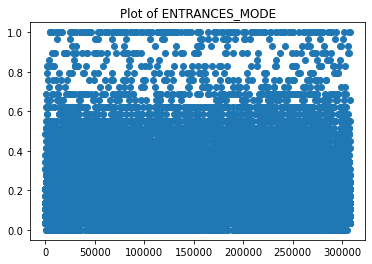

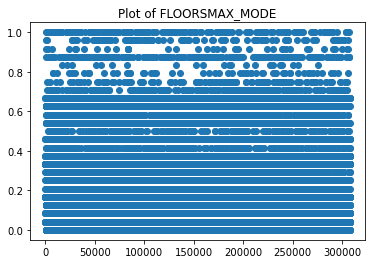

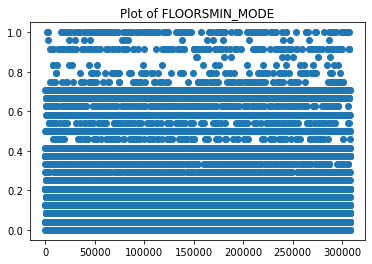

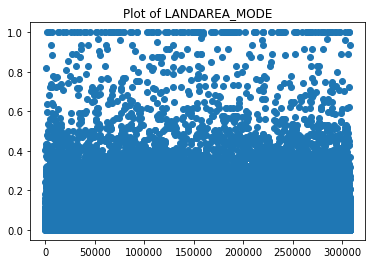

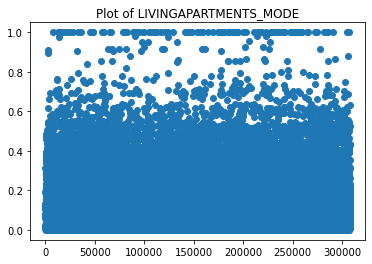

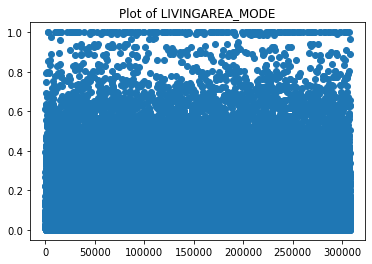

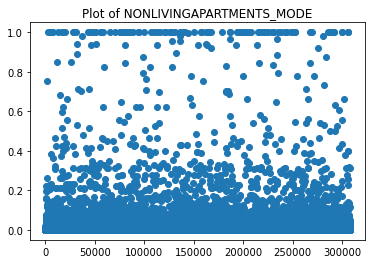

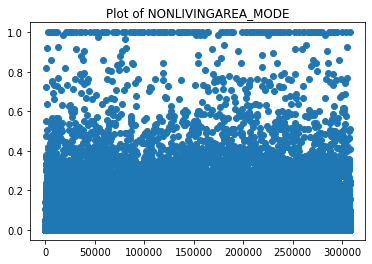

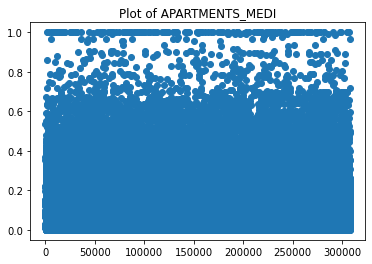

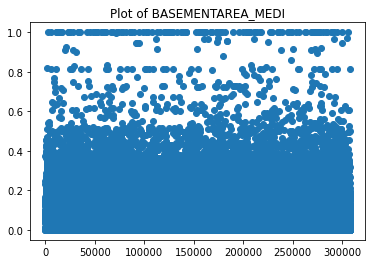

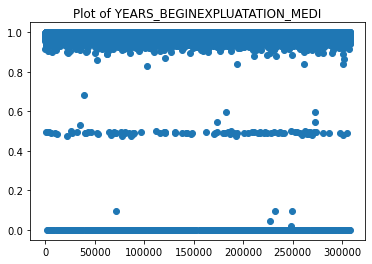

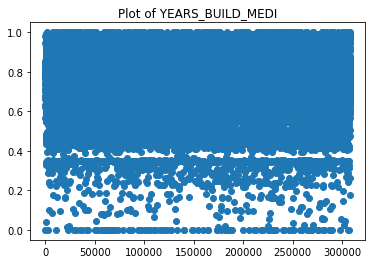

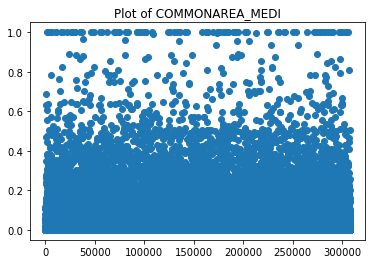

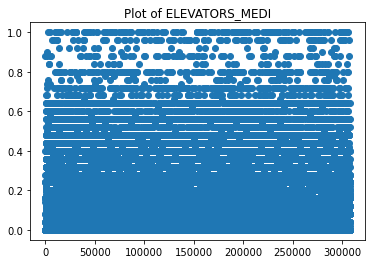

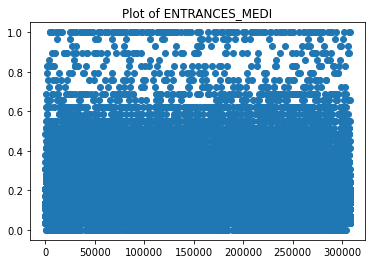

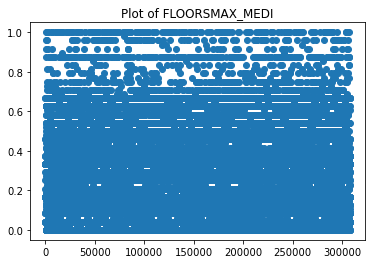

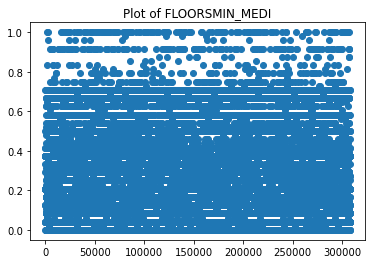

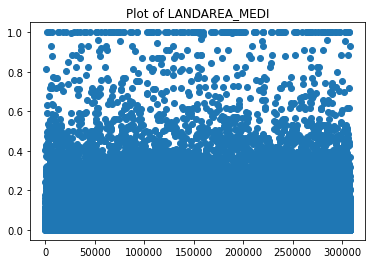

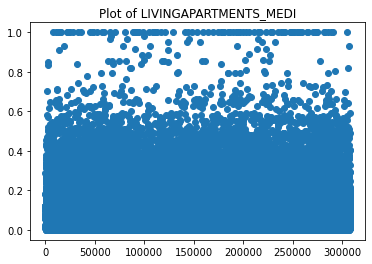

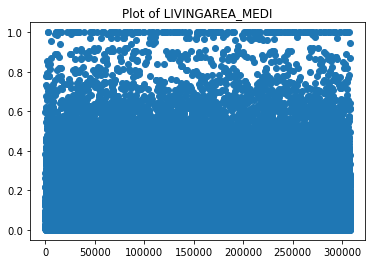

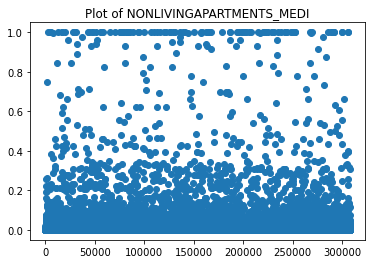

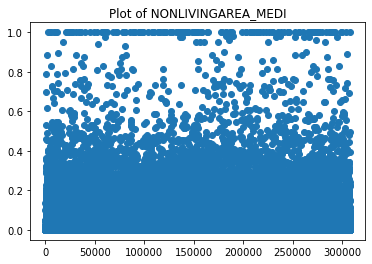

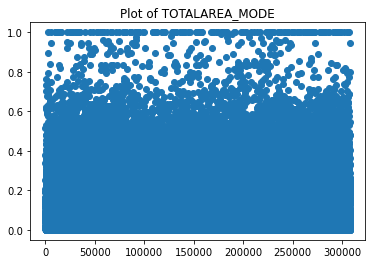

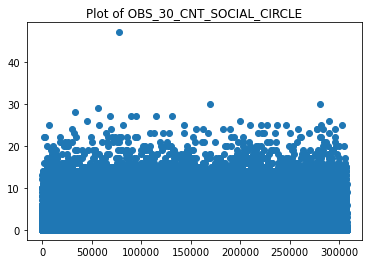

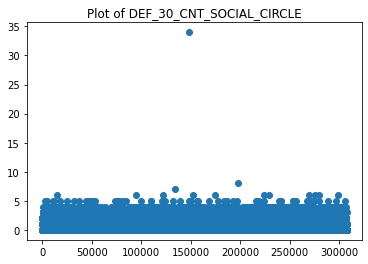

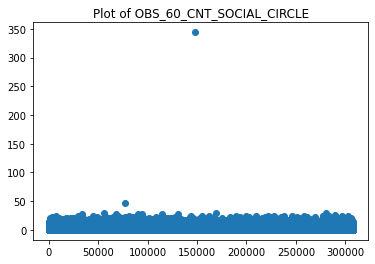

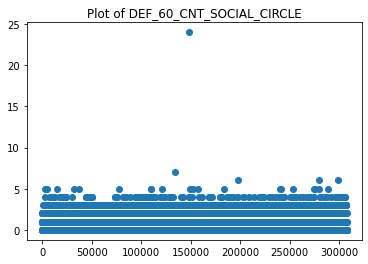

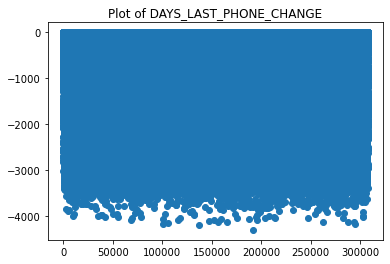

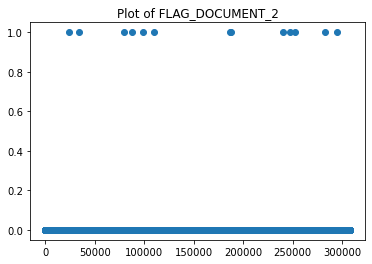

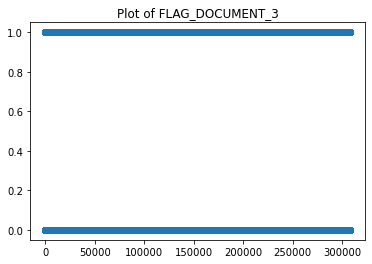

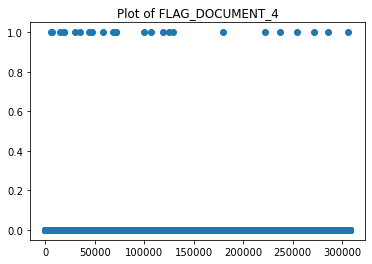

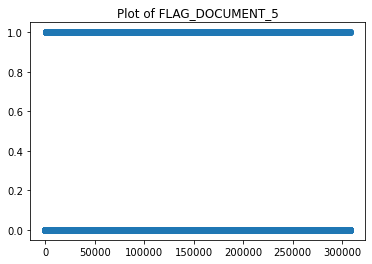

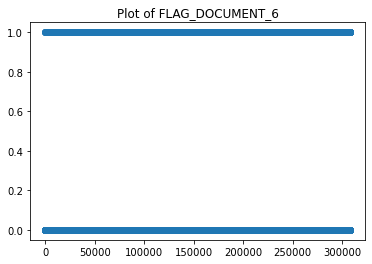

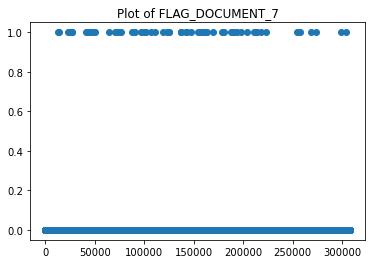

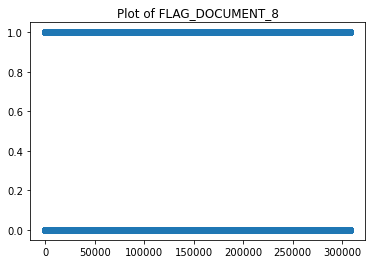

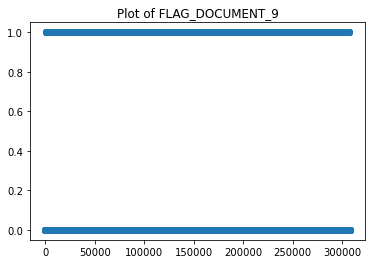

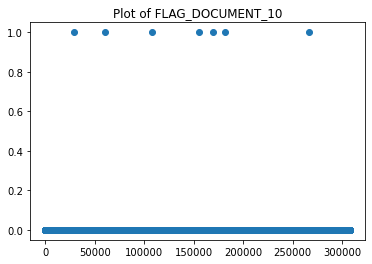

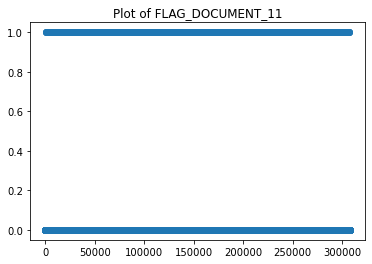

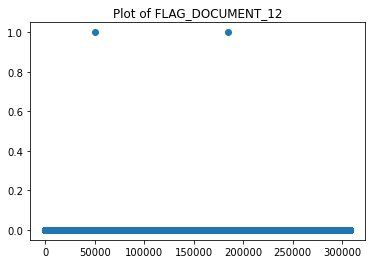

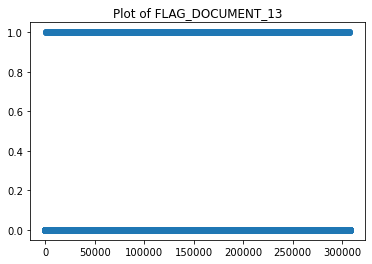

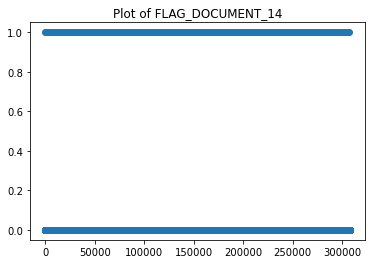

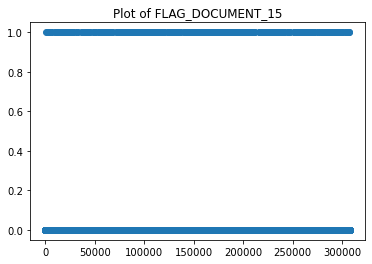

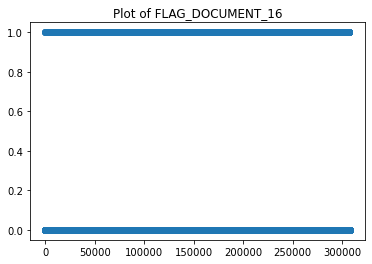

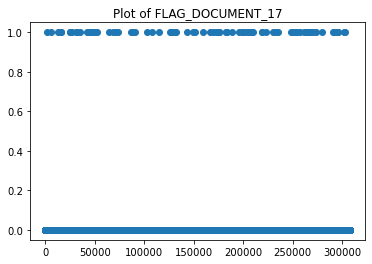

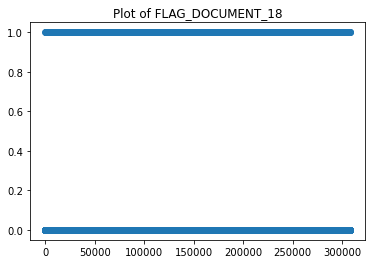

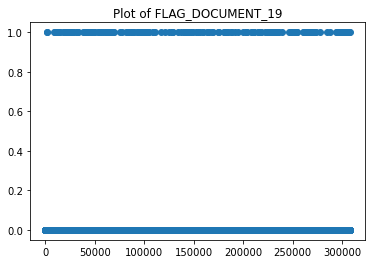

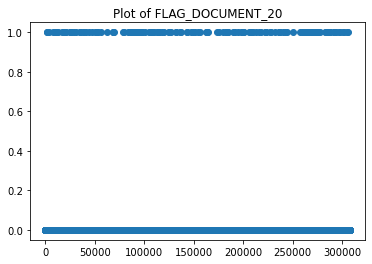

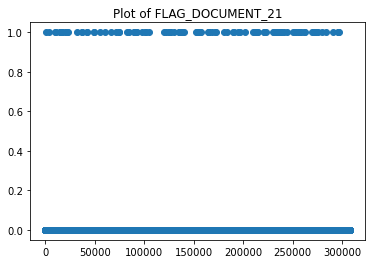

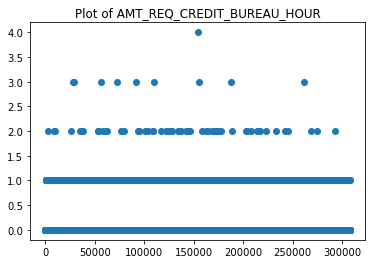

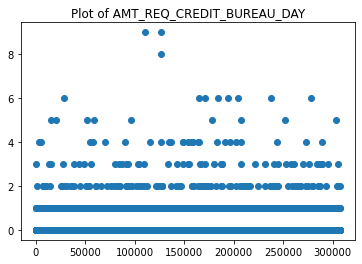

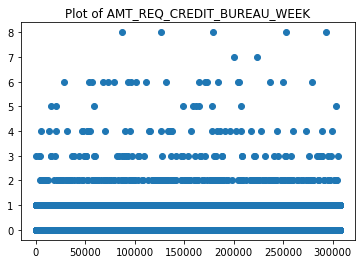

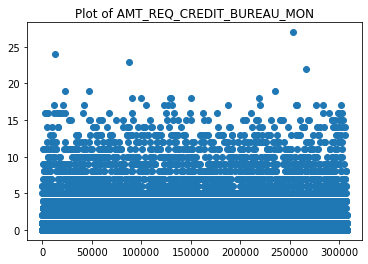

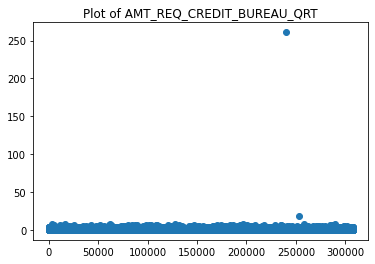

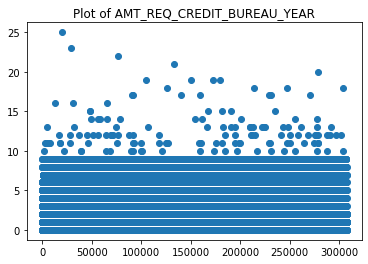

In [24]:
# Lets plot the graph again and see if rest of the outliers are still there.
for column in numericals:
    plt.scatter(df.index, df[column])
    plt.title("Plot of "+column)
    plt.show()

In [25]:
df['DEF_30_CNT_SOCIAL_CIRCLE'].unique()

array([ 2.,  0.,  1., nan,  3.,  4.,  5.,  6.,  7., 34.,  8.])

In [26]:
df['DEF_30_CNT_SOCIAL_CIRCLE'] = df['DEF_30_CNT_SOCIAL_CIRCLE'].replace([34.0 ], int(df['DEF_30_CNT_SOCIAL_CIRCLE'].mean()))

In [27]:
df['OBS_60_CNT_SOCIAL_CIRCLE'].unique()

array([  2.,   1.,   0.,   4.,   8.,  10.,  nan,   7.,   3.,   6.,   5.,
        12.,   9.,  13.,  11.,  14.,  21.,  15.,  22.,  16.,  20.,  25.,
        17.,  19.,  18.,  24.,  23.,  28.,  29.,  27.,  47., 344.,  30.,
        26.])

In [28]:
df['OBS_60_CNT_SOCIAL_CIRCLE'] = df['OBS_60_CNT_SOCIAL_CIRCLE'].replace([344.0 ], int(df['OBS_30_CNT_SOCIAL_CIRCLE'].mean()))

In [29]:
df['DEF_60_CNT_SOCIAL_CIRCLE'].unique()

array([ 2.,  0.,  1., nan,  3.,  5.,  4.,  7., 24.,  6.])

In [30]:
df['DEF_60_CNT_SOCIAL_CIRCLE'] = df['DEF_60_CNT_SOCIAL_CIRCLE'].replace([24.0 ], int(df['DEF_60_CNT_SOCIAL_CIRCLE'].mean()))

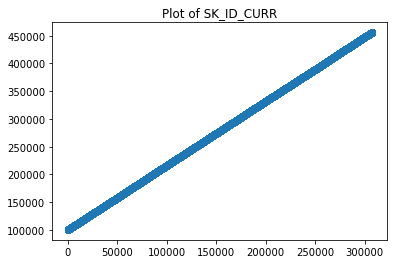

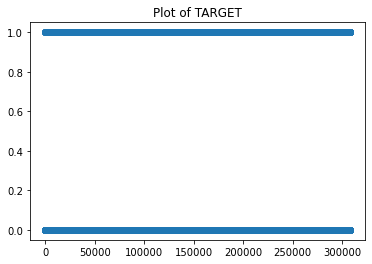

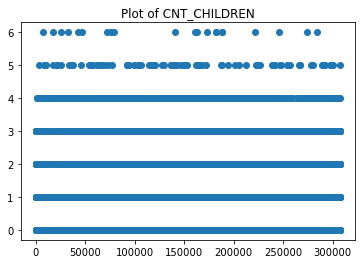

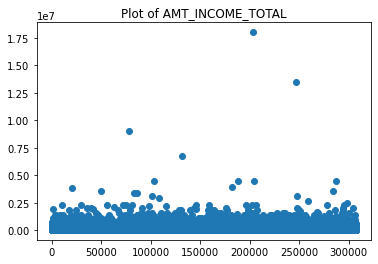

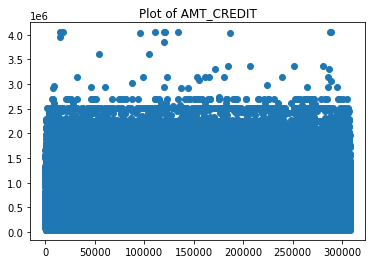

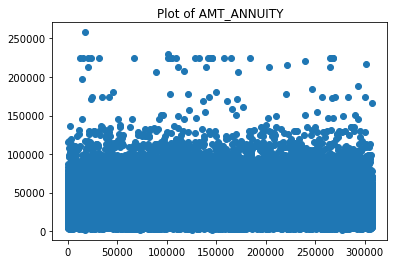

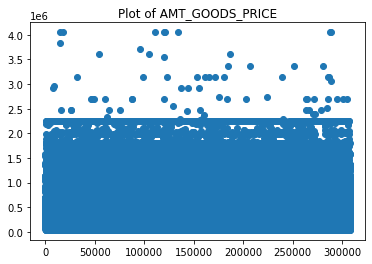

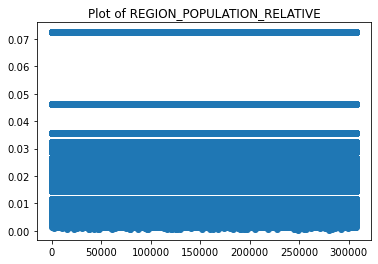

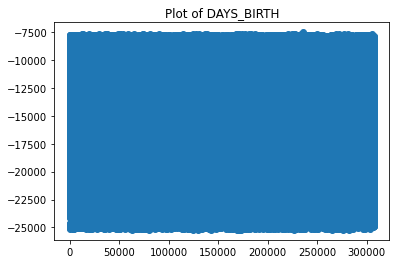

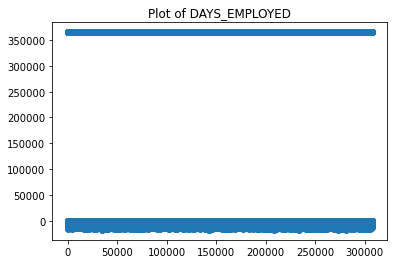

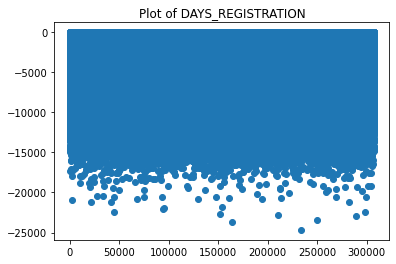

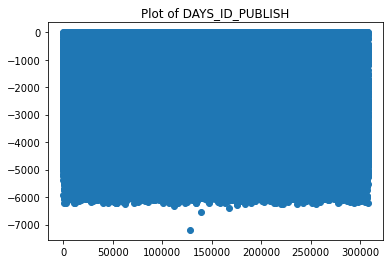

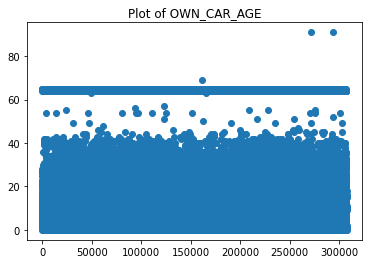

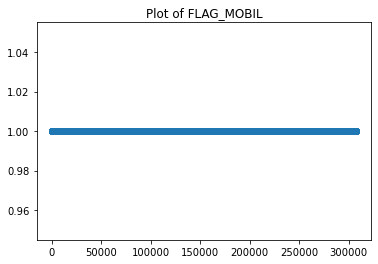

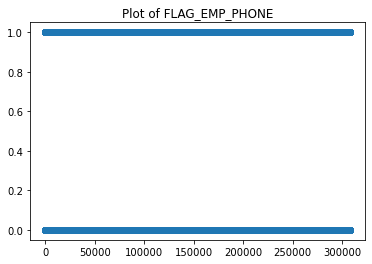

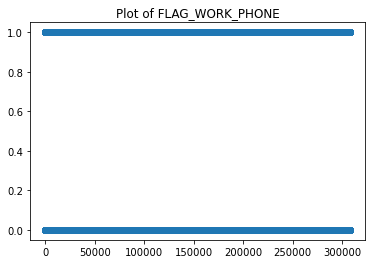

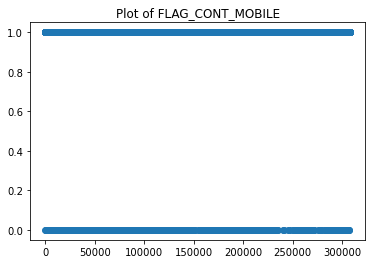

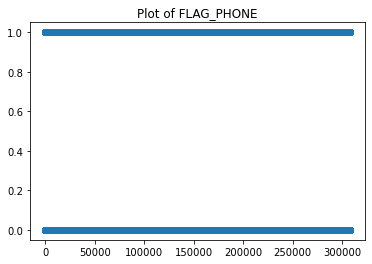

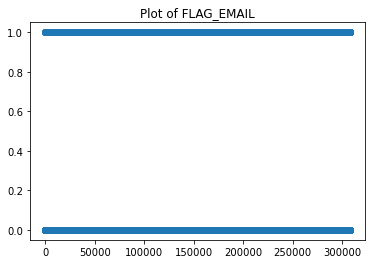

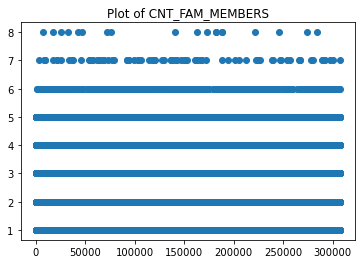

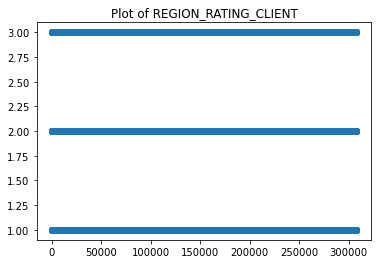

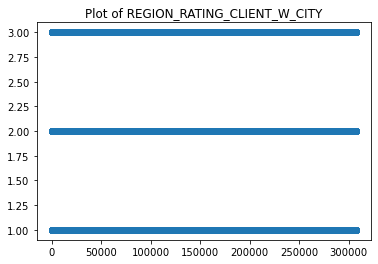

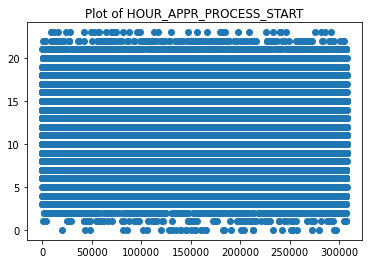

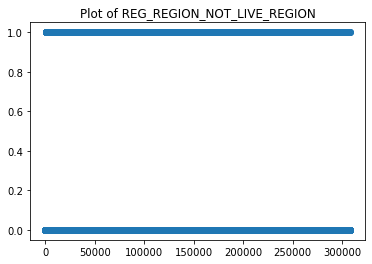

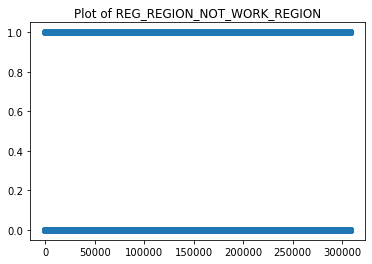

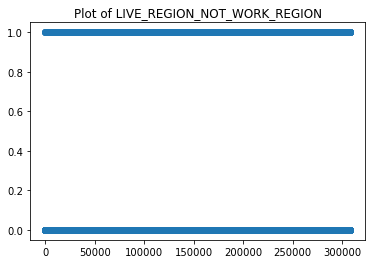

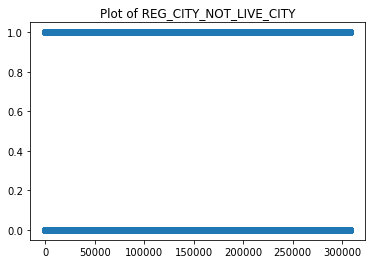

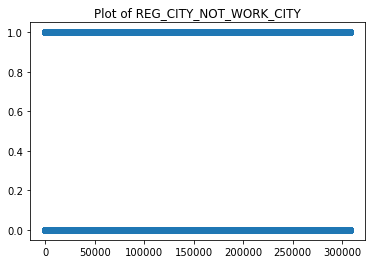

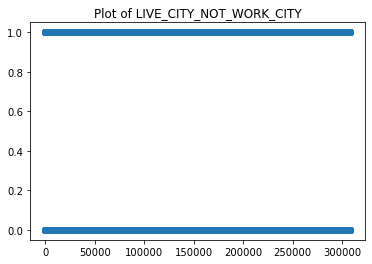

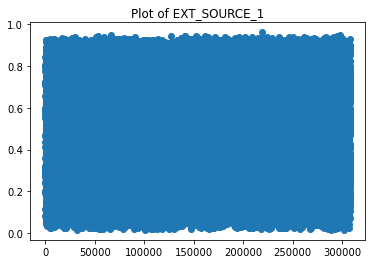

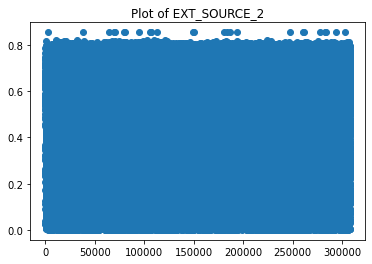

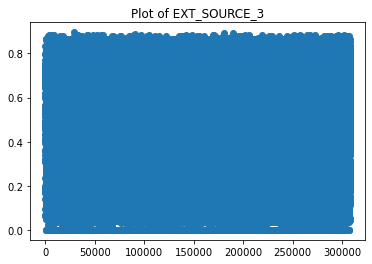

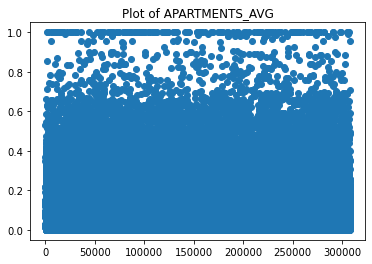

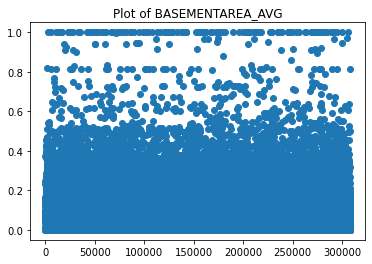

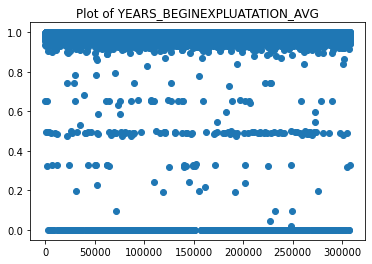

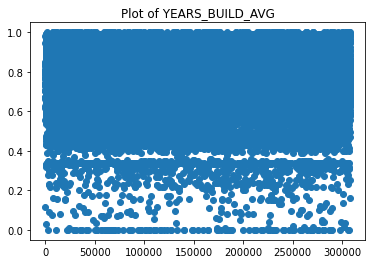

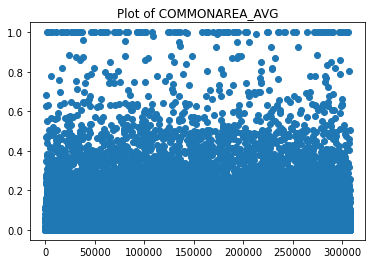

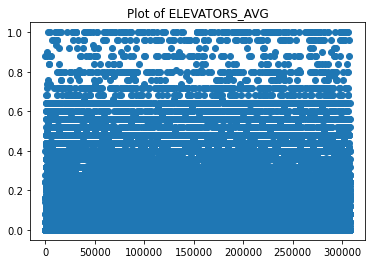

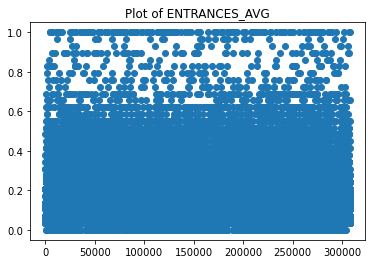

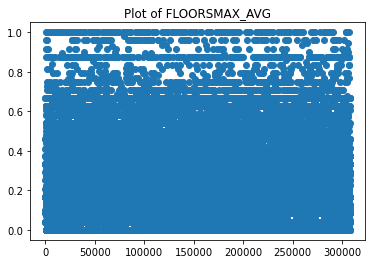

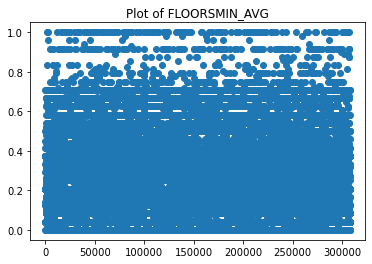

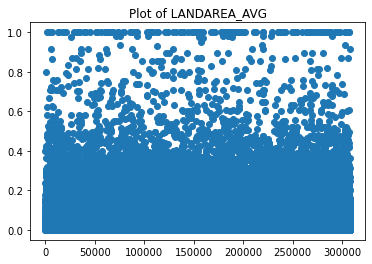

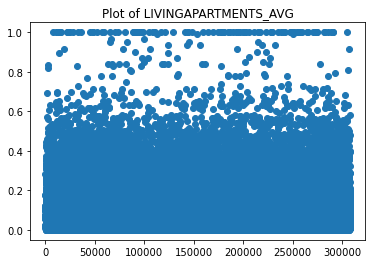

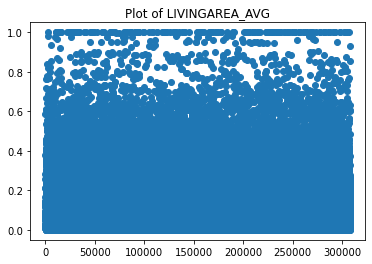

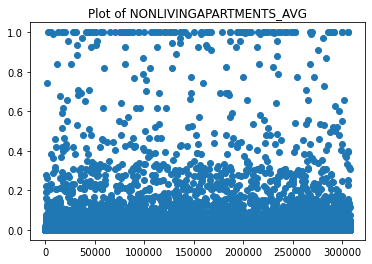

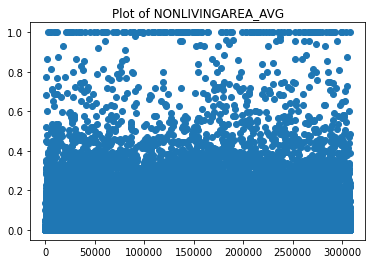

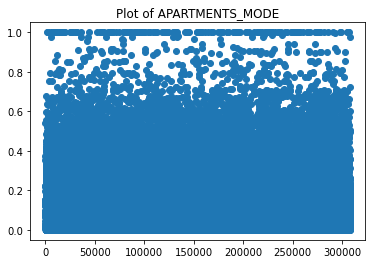

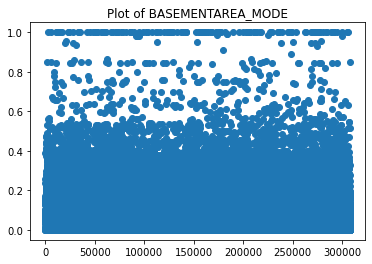

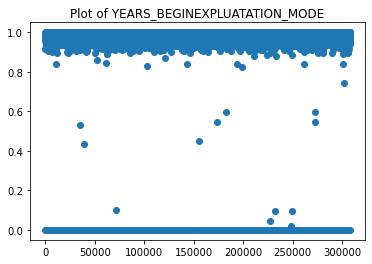

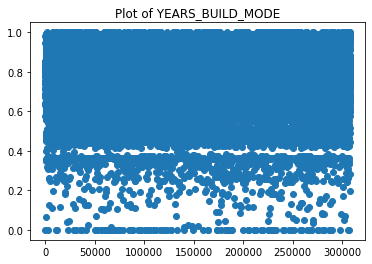

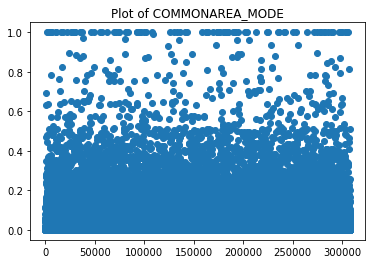

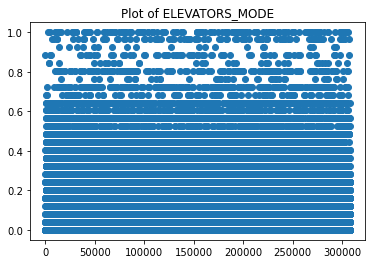

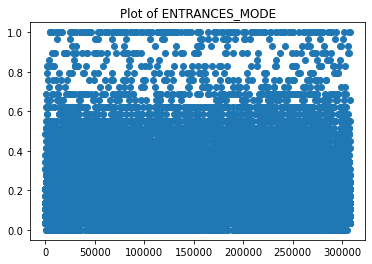

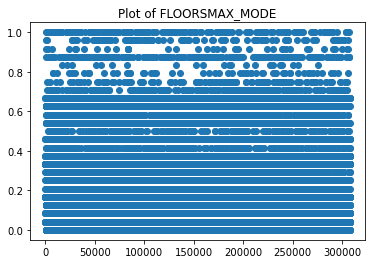

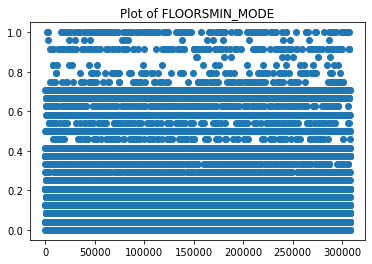

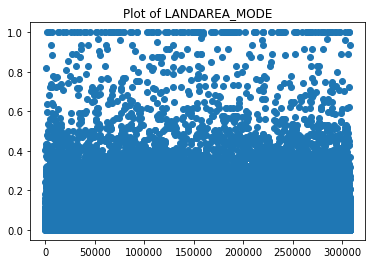

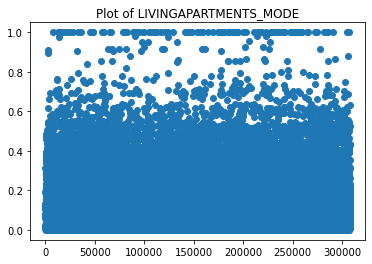

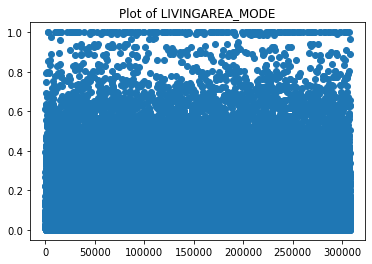

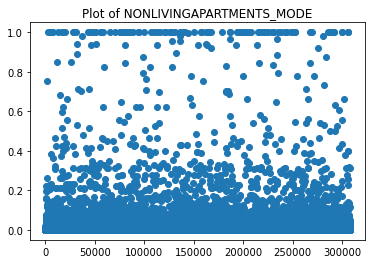

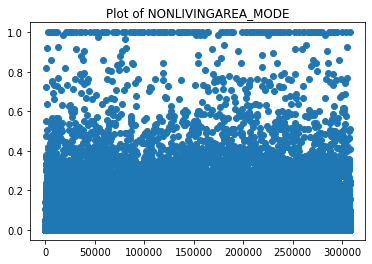

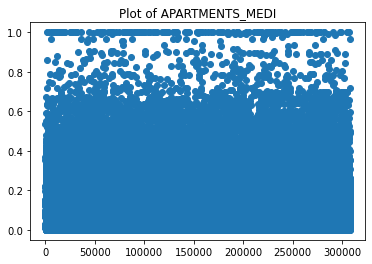

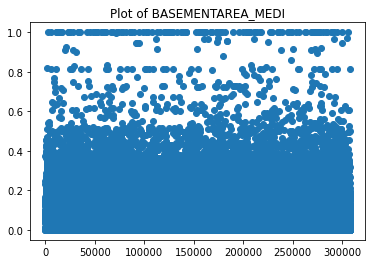

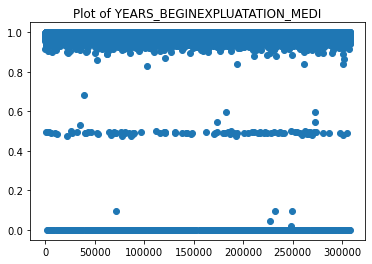

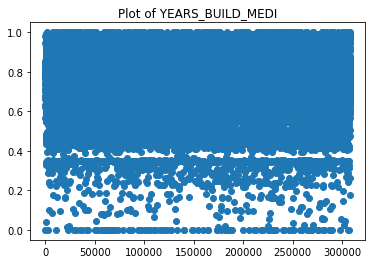

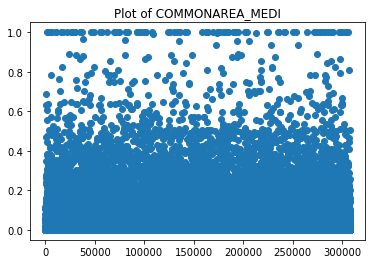

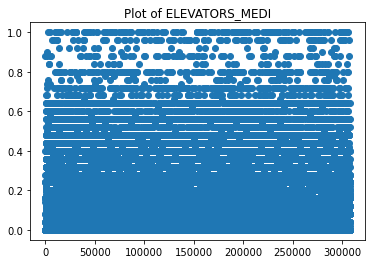

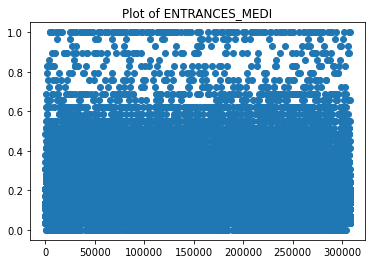

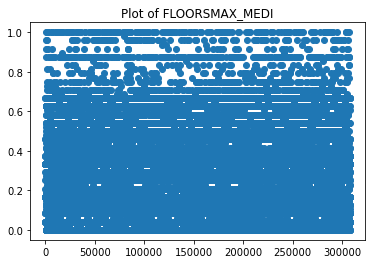

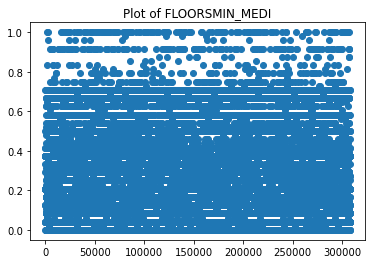

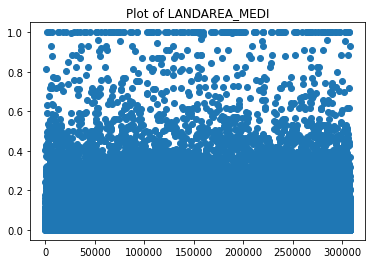

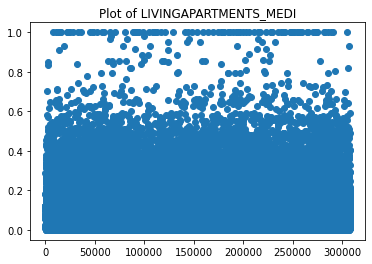

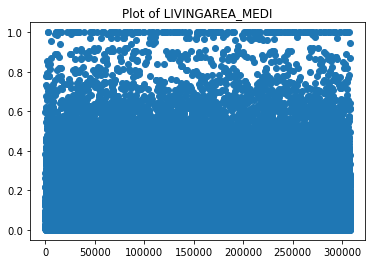

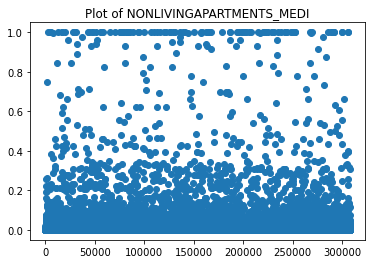

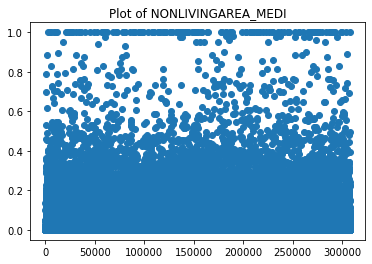

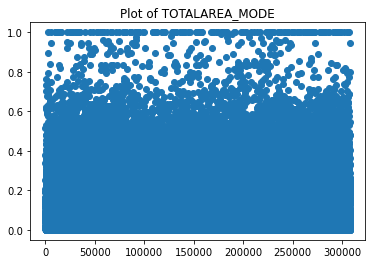

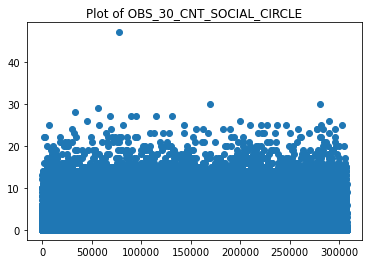

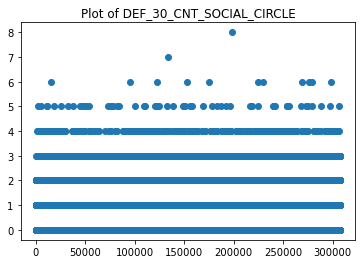

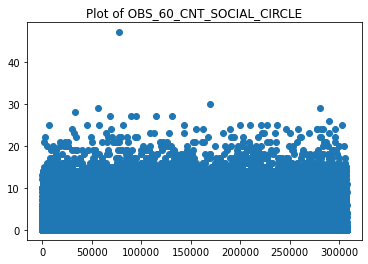

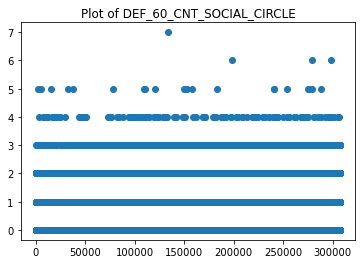

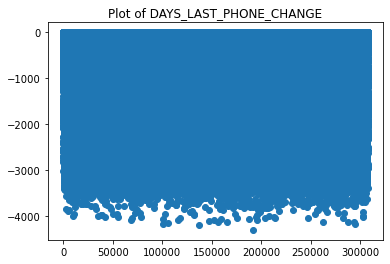

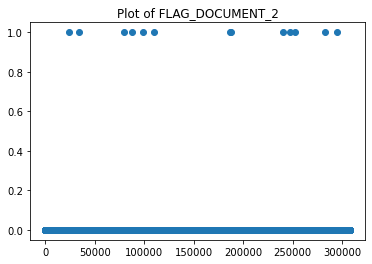

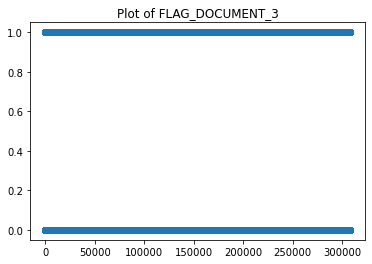

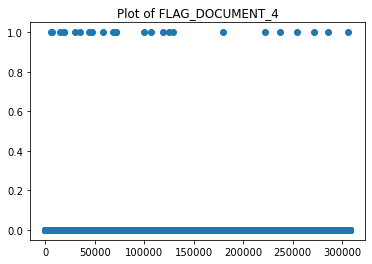

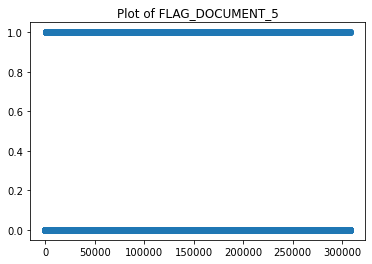

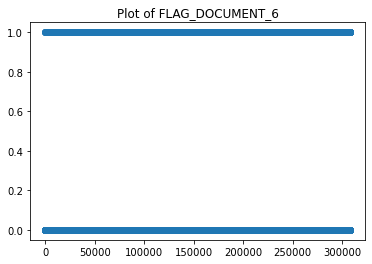

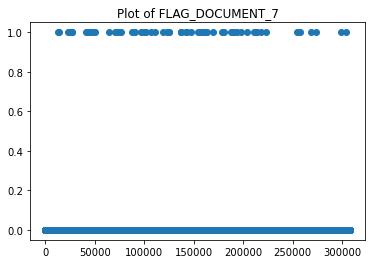

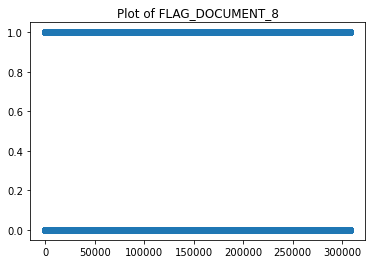

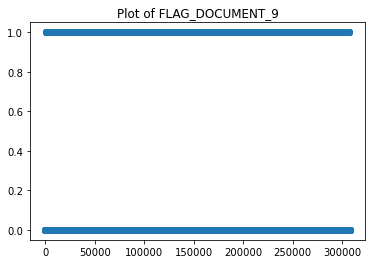

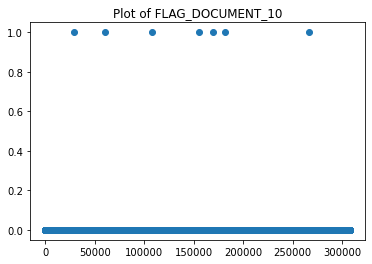

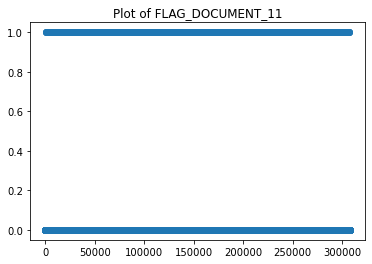

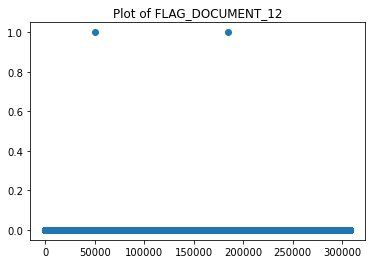

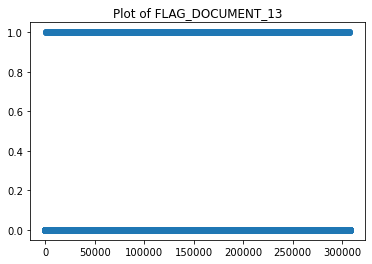

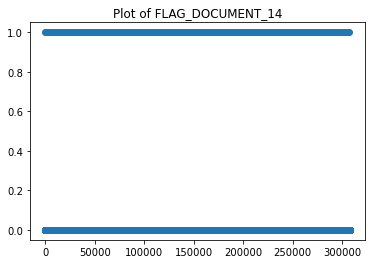

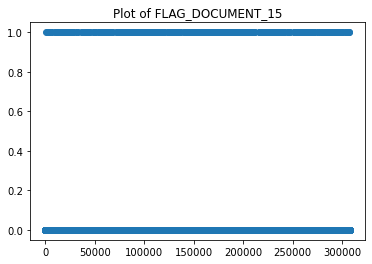

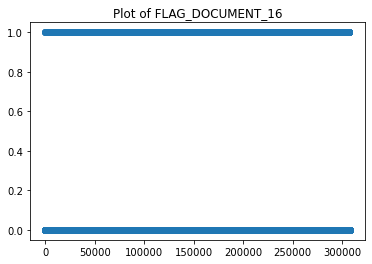

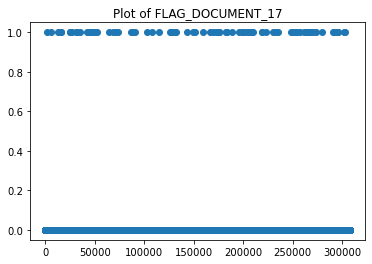

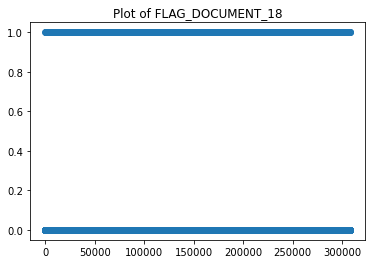

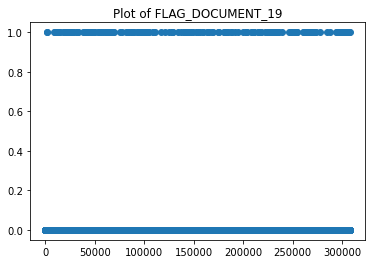

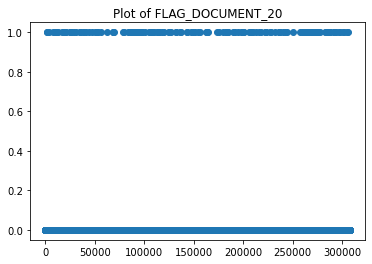

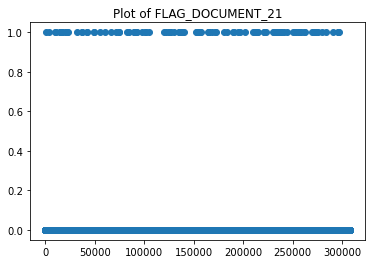

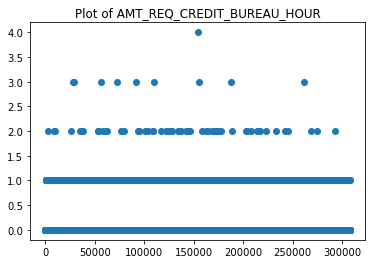

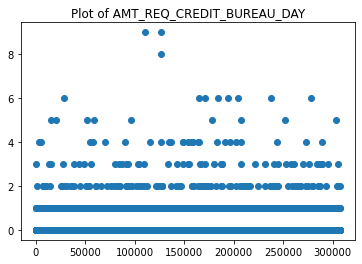

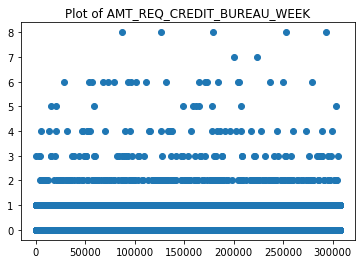

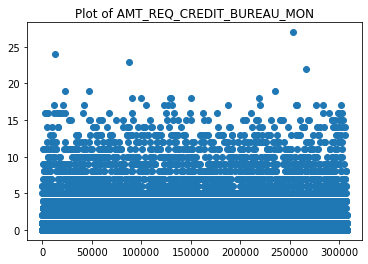

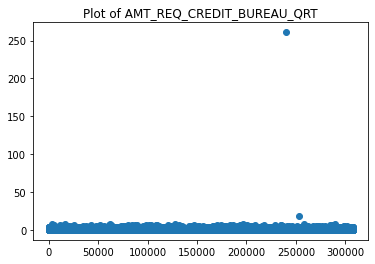

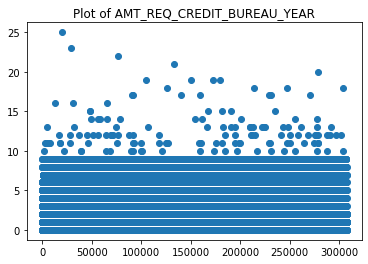

In [31]:
# Lets plot the graph again and see if all the outliers are fixed.
for column in numericals:
    plt.scatter(df.index, df[column])
    plt.title("Plot of "+column)
    plt.show()

In [32]:
# Looks like there is oultier in AMT_REQ_CREDIT_BUREAU_QRT column. Lets see.
df[df['AMT_REQ_CREDIT_BUREAU_QRT'] > 250]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
239474      377322       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
239474               Y             1          360000.0   1035000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
239474      30393.0  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
239474                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
239474                         0.0                        1.0   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
239474                      261.0                         0.0  

[1 rows x 122 columns]

In [33]:
df[df['AMT_REQ_CREDIT_BUREAU_QRT'] > 250]['AMT_REQ_CREDIT_BUREAU_QRT']

239474    261.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [34]:
# An applicant with this much enquiries does not looks good. It can be potential threat. Hence, removing it.
df = df[df['AMT_REQ_CREDIT_BUREAU_QRT'] != 261.0]

In [35]:
df['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

0.0     215400
1.0      33860
2.0      14411
3.0       1717
4.0        476
5.0         64
6.0         28
7.0          7
8.0          7
19.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [36]:
# Since 19 is a clear outlier we can drop it.
df = df[df['AMT_REQ_CREDIT_BUREAU_QRT'] != 19.0]

In [37]:
df['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

0.0    215400
1.0     33860
2.0     14411
3.0      1717
4.0       476
5.0        64
6.0        28
7.0         7
8.0         7
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

Now, all the outliers are fixed and we can move on further.

### Now lets deal with null values

Let's print columns with descending order of null values to get an idea about which columns needs to be dealt with first.

In [38]:
df.shape

(307486, 122)

In [39]:
df.isnull().sum().sort_values(ascending=False).head(30)

COMMONAREA_MEDI             214847
COMMONAREA_AVG              214847
COMMONAREA_MODE             214847
NONLIVINGAPARTMENTS_MODE    213496
NONLIVINGAPARTMENTS_MEDI    213496
NONLIVINGAPARTMENTS_AVG     213496
FONDKAPREMONT_MODE          210278
LIVINGAPARTMENTS_MEDI       210181
LIVINGAPARTMENTS_MODE       210181
LIVINGAPARTMENTS_AVG        210181
FLOORSMIN_MEDI              208623
FLOORSMIN_MODE              208623
FLOORSMIN_AVG               208623
YEARS_BUILD_MEDI            204471
YEARS_BUILD_AVG             204471
YEARS_BUILD_MODE            204471
OWN_CAR_AGE                 202912
LANDAREA_MODE               182576
LANDAREA_AVG                182576
LANDAREA_MEDI               182576
BASEMENTAREA_MEDI           179929
BASEMENTAREA_AVG            179929
BASEMENTAREA_MODE           179929
EXT_SOURCE_1                173366
NONLIVINGAREA_MEDI          169668
NONLIVINGAREA_AVG           169668
NONLIVINGAREA_MODE          169668
ELEVATORS_MODE              163877
ELEVATORS_AVG       

We can see that there a lot of columns with more than 2 lakhs missing values and most of them having 1.5 lakhs missing values. So we should drop columns with atleast 50% missing values, as they are of no use and will create difficulties while analysis.

In [40]:
x = len(df)/2
df.columns[df.isnull().sum() < x]

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

In [41]:
df = df[df.columns[df.isnull().sum() < x]]
df.shape

(307486, 81)

In [42]:
# Checking again the null values in columns
df.isnull().sum().sort_values(ascending=False).head(30)

FLOORSMAX_AVG                   153009
FLOORSMAX_MEDI                  153009
FLOORSMAX_MODE                  153009
YEARS_BEGINEXPLUATATION_AVG     149998
YEARS_BEGINEXPLUATATION_MEDI    149998
YEARS_BEGINEXPLUATATION_MODE    149998
TOTALAREA_MODE                  148422
EMERGENCYSTATE_MODE             145746
OCCUPATION_TYPE                  96388
EXT_SOURCE_3                     60959
AMT_REQ_CREDIT_BUREAU_YEAR       41516
AMT_REQ_CREDIT_BUREAU_QRT        41516
AMT_REQ_CREDIT_BUREAU_HOUR       41516
AMT_REQ_CREDIT_BUREAU_DAY        41516
AMT_REQ_CREDIT_BUREAU_WEEK       41516
AMT_REQ_CREDIT_BUREAU_MON        41516
NAME_TYPE_SUITE                   1292
DEF_60_CNT_SOCIAL_CIRCLE          1021
OBS_30_CNT_SOCIAL_CIRCLE          1021
DEF_30_CNT_SOCIAL_CIRCLE          1021
OBS_60_CNT_SOCIAL_CIRCLE          1021
EXT_SOURCE_2                       659
AMT_GOODS_PRICE                    278
AMT_ANNUITY                         12
CNT_FAM_MEMBERS                      2
FLAG_DOCUMENT_5          

In [43]:
# Let's find out the percentage of missing values in the columns as numbers are too huge to get the idea of how to treat them.
df_missing = df.count()/len(df)
df_missing = (1-df_missing)*100
df_missing = df_missing[df_missing > 0]
df_missing

AMT_ANNUITY                      0.003903
AMT_GOODS_PRICE                  0.090411
NAME_TYPE_SUITE                  0.420182
OCCUPATION_TYPE                 31.347118
CNT_FAM_MEMBERS                  0.000650
EXT_SOURCE_2                     0.214319
EXT_SOURCE_3                    19.824968
YEARS_BEGINEXPLUATATION_AVG     48.782058
FLOORSMAX_AVG                   49.761290
YEARS_BEGINEXPLUATATION_MODE    48.782058
FLOORSMAX_MODE                  49.761290
YEARS_BEGINEXPLUATATION_MEDI    48.782058
FLOORSMAX_MEDI                  49.761290
TOTALAREA_MODE                  48.269515
EMERGENCYSTATE_MODE             47.399231
OBS_30_CNT_SOCIAL_CIRCLE         0.332048
DEF_30_CNT_SOCIAL_CIRCLE         0.332048
OBS_60_CNT_SOCIAL_CIRCLE         0.332048
DEF_60_CNT_SOCIAL_CIRCLE         0.332048
AMT_REQ_CREDIT_BUREAU_HOUR      13.501753
AMT_REQ_CREDIT_BUREAU_DAY       13.501753
AMT_REQ_CREDIT_BUREAU_WEEK      13.501753
AMT_REQ_CREDIT_BUREAU_MON       13.501753
AMT_REQ_CREDIT_BUREAU_QRT       13

In [44]:
df_missing.sort_values(ascending=False, inplace=True)
df_missing

FLOORSMAX_MEDI                  49.761290
FLOORSMAX_AVG                   49.761290
FLOORSMAX_MODE                  49.761290
YEARS_BEGINEXPLUATATION_AVG     48.782058
YEARS_BEGINEXPLUATATION_MODE    48.782058
YEARS_BEGINEXPLUATATION_MEDI    48.782058
TOTALAREA_MODE                  48.269515
EMERGENCYSTATE_MODE             47.399231
OCCUPATION_TYPE                 31.347118
EXT_SOURCE_3                    19.824968
AMT_REQ_CREDIT_BUREAU_QRT       13.501753
AMT_REQ_CREDIT_BUREAU_YEAR      13.501753
AMT_REQ_CREDIT_BUREAU_HOUR      13.501753
AMT_REQ_CREDIT_BUREAU_DAY       13.501753
AMT_REQ_CREDIT_BUREAU_WEEK      13.501753
AMT_REQ_CREDIT_BUREAU_MON       13.501753
NAME_TYPE_SUITE                  0.420182
OBS_30_CNT_SOCIAL_CIRCLE         0.332048
DEF_30_CNT_SOCIAL_CIRCLE         0.332048
OBS_60_CNT_SOCIAL_CIRCLE         0.332048
DEF_60_CNT_SOCIAL_CIRCLE         0.332048
EXT_SOURCE_2                     0.214319
AMT_GOODS_PRICE                  0.090411
AMT_ANNUITY                      0

In [45]:
# Lets treat the missing values in FLOORSMAX_AVG column
df['FLOORSMAX_AVG'].head()

0    0.0833
1    0.2917
2       NaN
3       NaN
4       NaN
Name: FLOORSMAX_AVG, dtype: float64

In [46]:
# Checking out mean and median of the column
df['FLOORSMAX_AVG'].describe()

count    154477.000000
mean          0.226279
std           0.144644
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_AVG, dtype: float64

In [47]:
# It is not clear with this, mean and median are close to each other but not enough. Lets check out mode
df['FLOORSMAX_AVG'].mode()

0    0.1667
dtype: float64

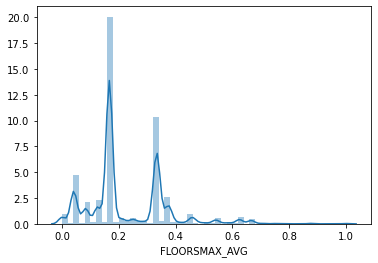

In [48]:
# Since mode and median are same let plot this column and see what can be done to replace null values
sns.distplot(df['FLOORSMAX_AVG'])
plt.show()

Since it has 2-3 bumps in the graph which will be effected if mode or median is chosen for null values, therefore filling the null values with mean should be good.

In [49]:
# Therefore filling null values in the FLOORSMAX_AVG column with mean
df['FLOORSMAX_AVG'].fillna(df['FLOORSMAX_AVG'].mean(), inplace=True)

In [50]:
# Lets check whether values are filled or not
df['FLOORSMAX_AVG'].isnull().sum()

0

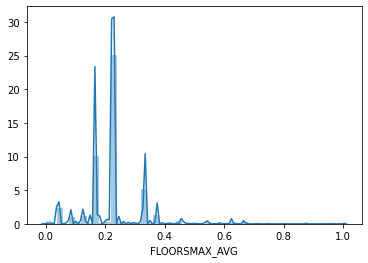

In [51]:
# Lets see the graph again
sns.distplot(df['FLOORSMAX_AVG']);

The above graph looks good. Now we can proceed with other columns to fill null values.

In [52]:
# Since first column is fixed, we have to drop it from missing data to remove confusion.
df_missing.drop('FLOORSMAX_AVG', inplace=True)

In [53]:
df_missing

FLOORSMAX_MEDI                  49.761290
FLOORSMAX_MODE                  49.761290
YEARS_BEGINEXPLUATATION_AVG     48.782058
YEARS_BEGINEXPLUATATION_MODE    48.782058
YEARS_BEGINEXPLUATATION_MEDI    48.782058
TOTALAREA_MODE                  48.269515
EMERGENCYSTATE_MODE             47.399231
OCCUPATION_TYPE                 31.347118
EXT_SOURCE_3                    19.824968
AMT_REQ_CREDIT_BUREAU_QRT       13.501753
AMT_REQ_CREDIT_BUREAU_YEAR      13.501753
AMT_REQ_CREDIT_BUREAU_HOUR      13.501753
AMT_REQ_CREDIT_BUREAU_DAY       13.501753
AMT_REQ_CREDIT_BUREAU_WEEK      13.501753
AMT_REQ_CREDIT_BUREAU_MON       13.501753
NAME_TYPE_SUITE                  0.420182
OBS_30_CNT_SOCIAL_CIRCLE         0.332048
DEF_30_CNT_SOCIAL_CIRCLE         0.332048
OBS_60_CNT_SOCIAL_CIRCLE         0.332048
DEF_60_CNT_SOCIAL_CIRCLE         0.332048
EXT_SOURCE_2                     0.214319
AMT_GOODS_PRICE                  0.090411
AMT_ANNUITY                      0.003903
CNT_FAM_MEMBERS                  0

In [54]:
df['FLOORSMAX_MEDI'].head()

0    0.0833
1    0.2917
2       NaN
3       NaN
4       NaN
Name: FLOORSMAX_MEDI, dtype: float64

In [55]:
# lets print mean, median and mode of the column
print(df['FLOORSMAX_MEDI'].mode())
print()
print(df['FLOORSMAX_MEDI'].describe())

0    0.1667
dtype: float64

count    154477.000000
mean          0.225894
std           0.145071
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_MEDI, dtype: float64


In [56]:
# This is same as FLOORSMAX_AVG column so following the same approach and filling NaN with mean()
df['FLOORSMAX_MEDI'].fillna(df['FLOORSMAX_MEDI'].mean(), inplace=True)

In [57]:
# Lets describe it again
df['FLOORSMAX_MEDI'].describe()

count    307486.000000
mean          0.225894
std           0.102825
min           0.000000
25%           0.166700
50%           0.225894
75%           0.225894
max           1.000000
Name: FLOORSMAX_MEDI, dtype: float64

We can see that mean and median is same now. Lets proceed with other columns.

In [58]:
df_missing.drop('FLOORSMAX_MEDI', inplace=True)
df_missing

FLOORSMAX_MODE                  49.761290
YEARS_BEGINEXPLUATATION_AVG     48.782058
YEARS_BEGINEXPLUATATION_MODE    48.782058
YEARS_BEGINEXPLUATATION_MEDI    48.782058
TOTALAREA_MODE                  48.269515
EMERGENCYSTATE_MODE             47.399231
OCCUPATION_TYPE                 31.347118
EXT_SOURCE_3                    19.824968
AMT_REQ_CREDIT_BUREAU_QRT       13.501753
AMT_REQ_CREDIT_BUREAU_YEAR      13.501753
AMT_REQ_CREDIT_BUREAU_HOUR      13.501753
AMT_REQ_CREDIT_BUREAU_DAY       13.501753
AMT_REQ_CREDIT_BUREAU_WEEK      13.501753
AMT_REQ_CREDIT_BUREAU_MON       13.501753
NAME_TYPE_SUITE                  0.420182
OBS_30_CNT_SOCIAL_CIRCLE         0.332048
DEF_30_CNT_SOCIAL_CIRCLE         0.332048
OBS_60_CNT_SOCIAL_CIRCLE         0.332048
DEF_60_CNT_SOCIAL_CIRCLE         0.332048
EXT_SOURCE_2                     0.214319
AMT_GOODS_PRICE                  0.090411
AMT_ANNUITY                      0.003903
CNT_FAM_MEMBERS                  0.000650
dtype: float64

In [59]:
df['FLOORSMAX_MODE'].head()

0    0.0833
1    0.2917
2       NaN
3       NaN
4       NaN
Name: FLOORSMAX_MODE, dtype: float64

In [60]:
print(df['FLOORSMAX_MODE'].mode())
print()
print(df['FLOORSMAX_MODE'].describe())

0    0.1667
dtype: float64

count    154477.000000
mean          0.222314
std           0.143713
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_MODE, dtype: float64


In [61]:
# This is also same as FLOORSMAX_AVG column so following the same approach and filling NaN with mean()
df['FLOORSMAX_MODE'].fillna(df['FLOORSMAX_MODE'].mean(), inplace=True)
df['FLOORSMAX_MODE'].describe()

count    307486.000000
mean          0.222314
std           0.101863
min           0.000000
25%           0.166700
50%           0.222314
75%           0.222314
max           1.000000
Name: FLOORSMAX_MODE, dtype: float64

In [62]:
df_missing.drop('FLOORSMAX_MODE', inplace=True)
df_missing

YEARS_BEGINEXPLUATATION_AVG     48.782058
YEARS_BEGINEXPLUATATION_MODE    48.782058
YEARS_BEGINEXPLUATATION_MEDI    48.782058
TOTALAREA_MODE                  48.269515
EMERGENCYSTATE_MODE             47.399231
OCCUPATION_TYPE                 31.347118
EXT_SOURCE_3                    19.824968
AMT_REQ_CREDIT_BUREAU_QRT       13.501753
AMT_REQ_CREDIT_BUREAU_YEAR      13.501753
AMT_REQ_CREDIT_BUREAU_HOUR      13.501753
AMT_REQ_CREDIT_BUREAU_DAY       13.501753
AMT_REQ_CREDIT_BUREAU_WEEK      13.501753
AMT_REQ_CREDIT_BUREAU_MON       13.501753
NAME_TYPE_SUITE                  0.420182
OBS_30_CNT_SOCIAL_CIRCLE         0.332048
DEF_30_CNT_SOCIAL_CIRCLE         0.332048
OBS_60_CNT_SOCIAL_CIRCLE         0.332048
DEF_60_CNT_SOCIAL_CIRCLE         0.332048
EXT_SOURCE_2                     0.214319
AMT_GOODS_PRICE                  0.090411
AMT_ANNUITY                      0.003903
CNT_FAM_MEMBERS                  0.000650
dtype: float64

Looks like every numerical column has same case as FLOORSMAX_AVG column.

In [63]:
df['YEARS_BEGINEXPLUATATION_AVG'].head()

0    0.9722
1    0.9851
2       NaN
3       NaN
4       NaN
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64

In [64]:
print(df['YEARS_BEGINEXPLUATATION_AVG'].mode())
print()
print(df['YEARS_BEGINEXPLUATATION_AVG'].describe())

0    0.9871
dtype: float64

count    157488.000000
mean          0.977734
std           0.059226
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64


Since in this case median-mode are closer as compared to mean-median. Lets plot this column and have a look.
But lets plot all the three cases i.e. filling null values with mean, median and mode then decide which is better.

In [65]:
df_mean = df['YEARS_BEGINEXPLUATATION_AVG'].fillna(df['YEARS_BEGINEXPLUATATION_AVG'].mean())
df_mode = df['YEARS_BEGINEXPLUATATION_AVG'].fillna(df['YEARS_BEGINEXPLUATATION_AVG'].mode())
df_median = df['YEARS_BEGINEXPLUATATION_AVG'].fillna(df['YEARS_BEGINEXPLUATATION_AVG'].median())

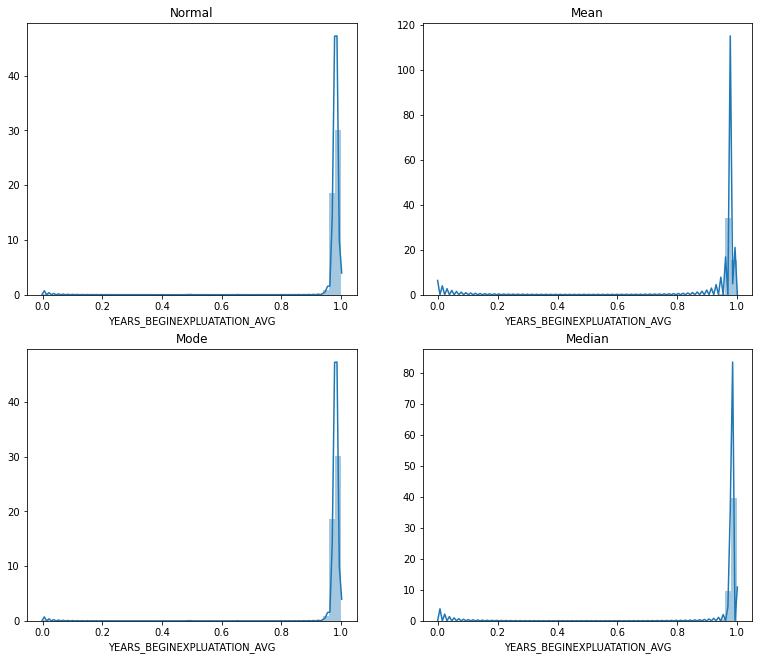

In [66]:
fig = plt.figure(figsize=(13,11))

ax1 = plt.subplot(221)
sns.distplot(df['YEARS_BEGINEXPLUATATION_AVG'], ax=ax1)
plt.title('Normal')

ax2 = plt.subplot(222)
sns.distplot(df_mean, ax=ax2)
plt.title('Mean')

ax3 = plt.subplot(223)
sns.distplot(df_mode, ax=ax3)
plt.title('Mode')

ax4 = plt.subplot(224)
sns.distplot(df_median, ax=ax4)
plt.title('Median')

plt.show()

As per my understanding mean graph is looking similar to bell graph obviously not exactly as it is shifted towards the right. But still it is the closet we can get. So, filling nulls with mean look good to me.

In [67]:
df['YEARS_BEGINEXPLUATATION_AVG'].fillna(df['YEARS_BEGINEXPLUATATION_AVG'].mean(),inplace=True)
df['YEARS_BEGINEXPLUATATION_AVG'].describe()

count    307486.000000
mean          0.977734
std           0.042386
min           0.000000
25%           0.977734
50%           0.977734
75%           0.982100
max           1.000000
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64

In [68]:
df_missing.drop('YEARS_BEGINEXPLUATATION_AVG', inplace=True)
df_missing

YEARS_BEGINEXPLUATATION_MODE    48.782058
YEARS_BEGINEXPLUATATION_MEDI    48.782058
TOTALAREA_MODE                  48.269515
EMERGENCYSTATE_MODE             47.399231
OCCUPATION_TYPE                 31.347118
EXT_SOURCE_3                    19.824968
AMT_REQ_CREDIT_BUREAU_QRT       13.501753
AMT_REQ_CREDIT_BUREAU_YEAR      13.501753
AMT_REQ_CREDIT_BUREAU_HOUR      13.501753
AMT_REQ_CREDIT_BUREAU_DAY       13.501753
AMT_REQ_CREDIT_BUREAU_WEEK      13.501753
AMT_REQ_CREDIT_BUREAU_MON       13.501753
NAME_TYPE_SUITE                  0.420182
OBS_30_CNT_SOCIAL_CIRCLE         0.332048
DEF_30_CNT_SOCIAL_CIRCLE         0.332048
OBS_60_CNT_SOCIAL_CIRCLE         0.332048
DEF_60_CNT_SOCIAL_CIRCLE         0.332048
EXT_SOURCE_2                     0.214319
AMT_GOODS_PRICE                  0.090411
AMT_ANNUITY                      0.003903
CNT_FAM_MEMBERS                  0.000650
dtype: float64

In [69]:
df['YEARS_BEGINEXPLUATATION_MEDI'].head()

0    0.9722
1    0.9851
2       NaN
3       NaN
4       NaN
Name: YEARS_BEGINEXPLUATATION_MEDI, dtype: float64

In [70]:
print(df['YEARS_BEGINEXPLUATATION_MEDI'].mode())
print()
print(df['YEARS_BEGINEXPLUATATION_MEDI'].describe())

0    0.9871
dtype: float64

count    157488.000000
mean          0.977752
std           0.059900
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MEDI, dtype: float64


In [71]:
# This is similar to YEARS_BEGINEXPLUATATION_AVG column and hence filling it with mean as well.
df['YEARS_BEGINEXPLUATATION_MEDI'].fillna(df['YEARS_BEGINEXPLUATATION_MEDI'].mean(),inplace=True)
df['YEARS_BEGINEXPLUATATION_MEDI'].describe()

count    307486.000000
mean          0.977752
std           0.042869
min           0.000000
25%           0.977752
50%           0.977752
75%           0.982100
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MEDI, dtype: float64

In [72]:
df_missing.drop('YEARS_BEGINEXPLUATATION_MEDI', inplace=True)
df_missing

YEARS_BEGINEXPLUATATION_MODE    48.782058
TOTALAREA_MODE                  48.269515
EMERGENCYSTATE_MODE             47.399231
OCCUPATION_TYPE                 31.347118
EXT_SOURCE_3                    19.824968
AMT_REQ_CREDIT_BUREAU_QRT       13.501753
AMT_REQ_CREDIT_BUREAU_YEAR      13.501753
AMT_REQ_CREDIT_BUREAU_HOUR      13.501753
AMT_REQ_CREDIT_BUREAU_DAY       13.501753
AMT_REQ_CREDIT_BUREAU_WEEK      13.501753
AMT_REQ_CREDIT_BUREAU_MON       13.501753
NAME_TYPE_SUITE                  0.420182
OBS_30_CNT_SOCIAL_CIRCLE         0.332048
DEF_30_CNT_SOCIAL_CIRCLE         0.332048
OBS_60_CNT_SOCIAL_CIRCLE         0.332048
DEF_60_CNT_SOCIAL_CIRCLE         0.332048
EXT_SOURCE_2                     0.214319
AMT_GOODS_PRICE                  0.090411
AMT_ANNUITY                      0.003903
CNT_FAM_MEMBERS                  0.000650
dtype: float64

In [73]:
df['YEARS_BEGINEXPLUATATION_MODE'].head()

0    0.9722
1    0.9851
2       NaN
3       NaN
4       NaN
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: float64

In [74]:
print(df['YEARS_BEGINEXPLUATATION_MODE'].mode())
print()
print(df['YEARS_BEGINEXPLUATATION_MODE'].describe())

0    0.9871
dtype: float64

count    157488.000000
mean          0.977065
std           0.064579
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: float64


In [75]:
# This is similar to YEARS_BEGINEXPLUATATION_AVG column and hence filling it with mean as well.
df['YEARS_BEGINEXPLUATATION_MODE'].fillna(df['YEARS_BEGINEXPLUATATION_MODE'].mean(),inplace=True)
df['YEARS_BEGINEXPLUATATION_MODE'].describe()

count    307486.000000
mean          0.977065
std           0.046217
min           0.000000
25%           0.977065
50%           0.977065
75%           0.981600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: float64

In [76]:
df_missing.drop('YEARS_BEGINEXPLUATATION_MODE', inplace=True)
df_missing

TOTALAREA_MODE                48.269515
EMERGENCYSTATE_MODE           47.399231
OCCUPATION_TYPE               31.347118
EXT_SOURCE_3                  19.824968
AMT_REQ_CREDIT_BUREAU_QRT     13.501753
AMT_REQ_CREDIT_BUREAU_YEAR    13.501753
AMT_REQ_CREDIT_BUREAU_HOUR    13.501753
AMT_REQ_CREDIT_BUREAU_DAY     13.501753
AMT_REQ_CREDIT_BUREAU_WEEK    13.501753
AMT_REQ_CREDIT_BUREAU_MON     13.501753
NAME_TYPE_SUITE                0.420182
OBS_30_CNT_SOCIAL_CIRCLE       0.332048
DEF_30_CNT_SOCIAL_CIRCLE       0.332048
OBS_60_CNT_SOCIAL_CIRCLE       0.332048
DEF_60_CNT_SOCIAL_CIRCLE       0.332048
EXT_SOURCE_2                   0.214319
AMT_GOODS_PRICE                0.090411
AMT_ANNUITY                    0.003903
CNT_FAM_MEMBERS                0.000650
dtype: float64

In [77]:
df['TOTALAREA_MODE'].head()

0    0.0149
1    0.0714
2       NaN
3       NaN
4       NaN
Name: TOTALAREA_MODE, dtype: float64

In [78]:
print(df['TOTALAREA_MODE'].mode())
print()
print(df['TOTALAREA_MODE'].describe())

0    0.0
dtype: float64

count    159064.000000
mean          0.102548
std           0.107465
min           0.000000
25%           0.041200
50%           0.068800
75%           0.127600
max           1.000000
Name: TOTALAREA_MODE, dtype: float64


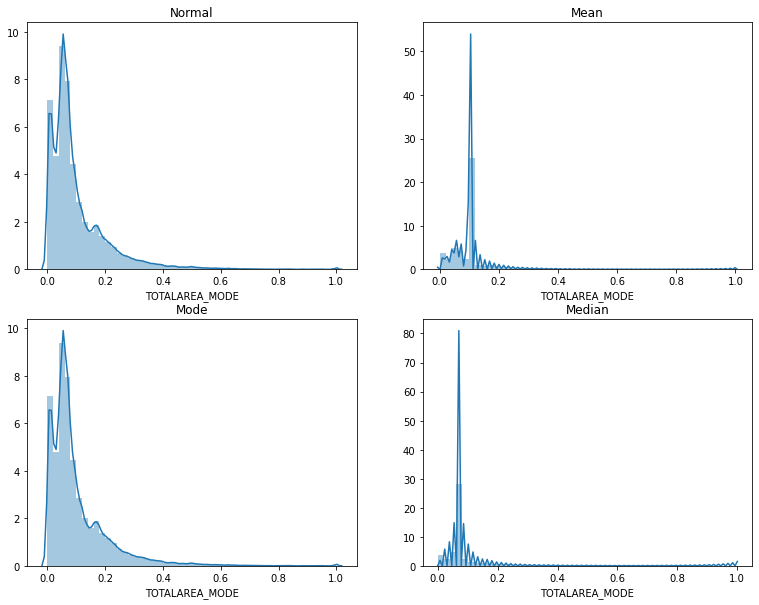

In [79]:
# We can see that median is lower than mean but lets plot this with mean, median and mode and find out which suites better. 
fig = plt.figure(figsize=(13,10))

ax1 = plt.subplot(221)
sns.distplot(df['TOTALAREA_MODE'], ax=ax1)
plt.title('Normal')

ax2 = plt.subplot(222)
sns.distplot(df['TOTALAREA_MODE'].fillna(df['TOTALAREA_MODE'].mean()), ax=ax2)
plt.title('Mean')

ax3 = plt.subplot(223)
sns.distplot(df['TOTALAREA_MODE'].fillna(df['TOTALAREA_MODE'].mode()), ax=ax3)
plt.title('Mode')

ax4 = plt.subplot(224)
sns.distplot(df['TOTALAREA_MODE'].fillna(df['TOTALAREA_MODE'].median()), ax=ax4)
plt.title('Median')

plt.show()

In [80]:
# median looks better options for this, hence proceeding with it.
df['TOTALAREA_MODE'].fillna(df['TOTALAREA_MODE'].median(),inplace=True)
df['TOTALAREA_MODE'].describe()

count    307486.000000
mean          0.086258
std           0.079111
min           0.000000
25%           0.067000
50%           0.068800
75%           0.070300
max           1.000000
Name: TOTALAREA_MODE, dtype: float64

In [81]:
df_missing.drop('TOTALAREA_MODE', inplace=True)
df_missing

EMERGENCYSTATE_MODE           47.399231
OCCUPATION_TYPE               31.347118
EXT_SOURCE_3                  19.824968
AMT_REQ_CREDIT_BUREAU_QRT     13.501753
AMT_REQ_CREDIT_BUREAU_YEAR    13.501753
AMT_REQ_CREDIT_BUREAU_HOUR    13.501753
AMT_REQ_CREDIT_BUREAU_DAY     13.501753
AMT_REQ_CREDIT_BUREAU_WEEK    13.501753
AMT_REQ_CREDIT_BUREAU_MON     13.501753
NAME_TYPE_SUITE                0.420182
OBS_30_CNT_SOCIAL_CIRCLE       0.332048
DEF_30_CNT_SOCIAL_CIRCLE       0.332048
OBS_60_CNT_SOCIAL_CIRCLE       0.332048
DEF_60_CNT_SOCIAL_CIRCLE       0.332048
EXT_SOURCE_2                   0.214319
AMT_GOODS_PRICE                0.090411
AMT_ANNUITY                    0.003903
CNT_FAM_MEMBERS                0.000650
dtype: float64

In [82]:
df['EMERGENCYSTATE_MODE'].head()

0     No
1     No
2    NaN
3    NaN
4    NaN
Name: EMERGENCYSTATE_MODE, dtype: object

In [83]:
# EMERGENCYSTATE_MODE is a categorical variable, so let's check unique entries
df['EMERGENCYSTATE_MODE'].value_counts()

No     159412
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64

In [84]:
df['EMERGENCYSTATE_MODE'].mode()

0    No
dtype: object

'EMERGENCYSTATE_MODE' column has 47% missing values which is a lot and can not be filled with either of the values as it may effect the analysis. And the description file does not have exact description of it, hence keeping it null or replacing it with third category as unknown can be done. So, leaving it as it is else third category may change analysis.

In [85]:
df_missing.drop('EMERGENCYSTATE_MODE', inplace=True)
df_missing

OCCUPATION_TYPE               31.347118
EXT_SOURCE_3                  19.824968
AMT_REQ_CREDIT_BUREAU_QRT     13.501753
AMT_REQ_CREDIT_BUREAU_YEAR    13.501753
AMT_REQ_CREDIT_BUREAU_HOUR    13.501753
AMT_REQ_CREDIT_BUREAU_DAY     13.501753
AMT_REQ_CREDIT_BUREAU_WEEK    13.501753
AMT_REQ_CREDIT_BUREAU_MON     13.501753
NAME_TYPE_SUITE                0.420182
OBS_30_CNT_SOCIAL_CIRCLE       0.332048
DEF_30_CNT_SOCIAL_CIRCLE       0.332048
OBS_60_CNT_SOCIAL_CIRCLE       0.332048
DEF_60_CNT_SOCIAL_CIRCLE       0.332048
EXT_SOURCE_2                   0.214319
AMT_GOODS_PRICE                0.090411
AMT_ANNUITY                    0.003903
CNT_FAM_MEMBERS                0.000650
dtype: float64

In [86]:
df['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [87]:
df[['OCCUPATION_TYPE', 'AMT_INCOME_TOTAL']].groupby(df['OCCUPATION_TYPE']).mean()

AMT_INCOME_TOTAL
OCCUPATION_TYPE                        
Accountants               194561.498726
Cleaning staff            130800.760645
Cooking staff             138396.508176
Core staff                172656.995761
Drivers                   187005.102634
HR staff                  188916.282416
High skill tech staff     182842.045683
IT staff                  213465.601711
Laborers                  164240.600015
Low-skill Laborers        133228.001911
Managers                  260343.779539
Medicine staff            149709.643434
Private service staff     182334.812783
Realty agents             195003.994674
Sales staff               152302.669365
Secretaries               160541.662069
Security staff            149659.693332
Waiters/barmen staff      144296.171492

Since, OCCUPATION_TYPE is a crucial column so can not be dropped. And cannot with filled with mode or anyother method as per my knowlegde, hence leaving it as it is.

In [88]:
df_missing.drop('OCCUPATION_TYPE', inplace=True)
df_missing

EXT_SOURCE_3                  19.824968
AMT_REQ_CREDIT_BUREAU_QRT     13.501753
AMT_REQ_CREDIT_BUREAU_YEAR    13.501753
AMT_REQ_CREDIT_BUREAU_HOUR    13.501753
AMT_REQ_CREDIT_BUREAU_DAY     13.501753
AMT_REQ_CREDIT_BUREAU_WEEK    13.501753
AMT_REQ_CREDIT_BUREAU_MON     13.501753
NAME_TYPE_SUITE                0.420182
OBS_30_CNT_SOCIAL_CIRCLE       0.332048
DEF_30_CNT_SOCIAL_CIRCLE       0.332048
OBS_60_CNT_SOCIAL_CIRCLE       0.332048
DEF_60_CNT_SOCIAL_CIRCLE       0.332048
EXT_SOURCE_2                   0.214319
AMT_GOODS_PRICE                0.090411
AMT_ANNUITY                    0.003903
CNT_FAM_MEMBERS                0.000650
dtype: float64

In [89]:
df['EXT_SOURCE_3'].head()

0    0.139376
1         NaN
2    0.729567
3         NaN
4         NaN
Name: EXT_SOURCE_3, dtype: float64

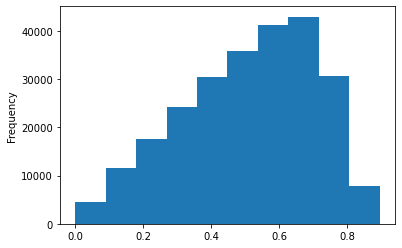

In [90]:
df['EXT_SOURCE_3'].plot.hist()

In [91]:
sample = 0
for i in range(30):
    sample += df['EXT_SOURCE_3'].sample(30).mean()
sample_mean = sample/30

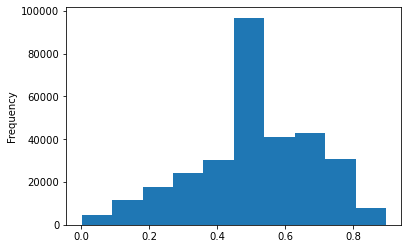

In [92]:
df['EXT_SOURCE_3'].fillna(sample_mean).plot.hist()

In [93]:
# Looks better now, hence filling nulls in EXT_SOURCE_3 column with sample mean.
df['EXT_SOURCE_3'].fillna(sample_mean, inplace=True)
df['EXT_SOURCE_3'].head()

0    0.139376
1    0.508804
2    0.729567
3    0.508804
4    0.508804
Name: EXT_SOURCE_3, dtype: float64

In [94]:
df_missing.drop('EXT_SOURCE_3', inplace=True)
df_missing

AMT_REQ_CREDIT_BUREAU_QRT     13.501753
AMT_REQ_CREDIT_BUREAU_YEAR    13.501753
AMT_REQ_CREDIT_BUREAU_HOUR    13.501753
AMT_REQ_CREDIT_BUREAU_DAY     13.501753
AMT_REQ_CREDIT_BUREAU_WEEK    13.501753
AMT_REQ_CREDIT_BUREAU_MON     13.501753
NAME_TYPE_SUITE                0.420182
OBS_30_CNT_SOCIAL_CIRCLE       0.332048
DEF_30_CNT_SOCIAL_CIRCLE       0.332048
OBS_60_CNT_SOCIAL_CIRCLE       0.332048
DEF_60_CNT_SOCIAL_CIRCLE       0.332048
EXT_SOURCE_2                   0.214319
AMT_GOODS_PRICE                0.090411
AMT_ANNUITY                    0.003903
CNT_FAM_MEMBERS                0.000650
dtype: float64

In [95]:
df['AMT_REQ_CREDIT_BUREAU_QRT'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [96]:
df['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

0.0    215400
1.0     33860
2.0     14411
3.0      1717
4.0       476
5.0        64
6.0        28
7.0         7
8.0         7
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

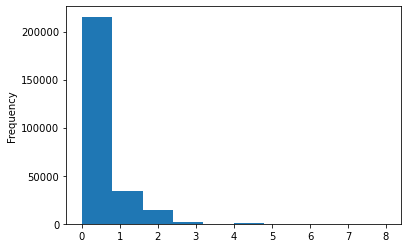

In [97]:
# Lets plot this graph first
unique_values = len(df['AMT_REQ_CREDIT_BUREAU_QRT'].unique())
df['AMT_REQ_CREDIT_BUREAU_QRT'].plot.hist(bins=unique_values)

In [98]:
df['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0]

0.0

In [99]:
df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(df['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0], inplace=True)
df['AMT_REQ_CREDIT_BUREAU_QRT'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

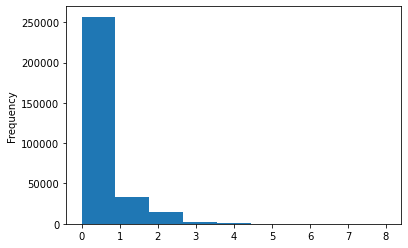

In [100]:
unique_values = len(df['AMT_REQ_CREDIT_BUREAU_QRT'].unique())
df['AMT_REQ_CREDIT_BUREAU_QRT'].plot.hist(bins=unique_values)

In [101]:
df_missing.drop('AMT_REQ_CREDIT_BUREAU_QRT', inplace=True)
df_missing

AMT_REQ_CREDIT_BUREAU_YEAR    13.501753
AMT_REQ_CREDIT_BUREAU_HOUR    13.501753
AMT_REQ_CREDIT_BUREAU_DAY     13.501753
AMT_REQ_CREDIT_BUREAU_WEEK    13.501753
AMT_REQ_CREDIT_BUREAU_MON     13.501753
NAME_TYPE_SUITE                0.420182
OBS_30_CNT_SOCIAL_CIRCLE       0.332048
DEF_30_CNT_SOCIAL_CIRCLE       0.332048
OBS_60_CNT_SOCIAL_CIRCLE       0.332048
DEF_60_CNT_SOCIAL_CIRCLE       0.332048
EXT_SOURCE_2                   0.214319
AMT_GOODS_PRICE                0.090411
AMT_ANNUITY                    0.003903
CNT_FAM_MEMBERS                0.000650
dtype: float64

In [102]:
df['AMT_REQ_CREDIT_BUREAU_YEAR'].head()

0    1.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [103]:
df['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

0.0     71795
1.0     63398
2.0     50187
3.0     33625
4.0     20713
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
21.0        1
23.0        1
25.0        1
20.0        1
22.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

Since all the AMT_REQ_CREDIT_BUREAU_xxxxx are same in behavior, hence they all can be filled with mode at once.

In [104]:
df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(df['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0],inplace=True)
df['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(df['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0],inplace=True)
df['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(df['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0],inplace=True)
df['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(df['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0],inplace=True)
df['AMT_REQ_CREDIT_BUREAU_MON'].fillna(df['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0],inplace=True)

In [105]:
df_missing.drop('AMT_REQ_CREDIT_BUREAU_YEAR', inplace=True)
df_missing.drop('AMT_REQ_CREDIT_BUREAU_HOUR', inplace=True)
df_missing.drop('AMT_REQ_CREDIT_BUREAU_DAY', inplace=True)
df_missing.drop('AMT_REQ_CREDIT_BUREAU_WEEK', inplace=True)
df_missing.drop('AMT_REQ_CREDIT_BUREAU_MON', inplace=True)
df_missing

NAME_TYPE_SUITE             0.420182
OBS_30_CNT_SOCIAL_CIRCLE    0.332048
DEF_30_CNT_SOCIAL_CIRCLE    0.332048
OBS_60_CNT_SOCIAL_CIRCLE    0.332048
DEF_60_CNT_SOCIAL_CIRCLE    0.332048
EXT_SOURCE_2                0.214319
AMT_GOODS_PRICE             0.090411
AMT_ANNUITY                 0.003903
CNT_FAM_MEMBERS             0.000650
dtype: float64

In [106]:
df['NAME_TYPE_SUITE'].sample(5)

249603          Other_A
276495    Unaccompanied
108180           Family
205738    Unaccompanied
51087     Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [107]:
# 'NAME_TYPE_SUITE' is also a categorical column with lesser number of missing values. Hence, it can be filled with mode.
df['NAME_TYPE_SUITE'].fillna(df['NAME_TYPE_SUITE'].mode()[0], inplace=True)

In [108]:
df['NAME_TYPE_SUITE'].isnull().sum()

0

In [109]:
df_missing.drop('NAME_TYPE_SUITE', inplace=True)
df_missing

OBS_30_CNT_SOCIAL_CIRCLE    0.332048
DEF_30_CNT_SOCIAL_CIRCLE    0.332048
OBS_60_CNT_SOCIAL_CIRCLE    0.332048
DEF_60_CNT_SOCIAL_CIRCLE    0.332048
EXT_SOURCE_2                0.214319
AMT_GOODS_PRICE             0.090411
AMT_ANNUITY                 0.003903
CNT_FAM_MEMBERS             0.000650
dtype: float64

In [110]:
df['OBS_30_CNT_SOCIAL_CIRCLE'].head()

0    2.0
1    1.0
2    0.0
3    2.0
4    0.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [111]:
df['DEF_30_CNT_SOCIAL_CIRCLE'].head()

0    2.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

First 5 columns in missing data are also categorical columns with lower missing values, hence can be filled with mode with affecting the analysis.

In [112]:
df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_30_CNT_SOCIAL_CIRCLE'].mode()[0],inplace=True)
df['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(df['DEF_30_CNT_SOCIAL_CIRCLE'].mode()[0],inplace=True)
df['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_60_CNT_SOCIAL_CIRCLE'].mode()[0],inplace=True)
df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(df['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0],inplace=True)
df['EXT_SOURCE_2'].fillna(df['EXT_SOURCE_2'].mode()[0],inplace=True)

In [113]:
df_missing.drop('OBS_30_CNT_SOCIAL_CIRCLE', inplace=True)
df_missing.drop('DEF_30_CNT_SOCIAL_CIRCLE', inplace=True)
df_missing.drop('OBS_60_CNT_SOCIAL_CIRCLE', inplace=True)
df_missing.drop('DEF_60_CNT_SOCIAL_CIRCLE', inplace=True)
df_missing.drop('EXT_SOURCE_2', inplace=True)
df_missing

AMT_GOODS_PRICE    0.090411
AMT_ANNUITY        0.003903
CNT_FAM_MEMBERS    0.000650
dtype: float64

In [114]:
df['AMT_GOODS_PRICE'].head()

0     351000.0
1    1129500.0
2     135000.0
3     297000.0
4     513000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [115]:
print(df['AMT_GOODS_PRICE'].mode())
print()
print(df['AMT_GOODS_PRICE'].describe())

0    450000.0
dtype: float64

count    3.072080e+05
mean     5.384023e+05
std      3.694505e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


Text(0.5, 1.0, 'Mean')

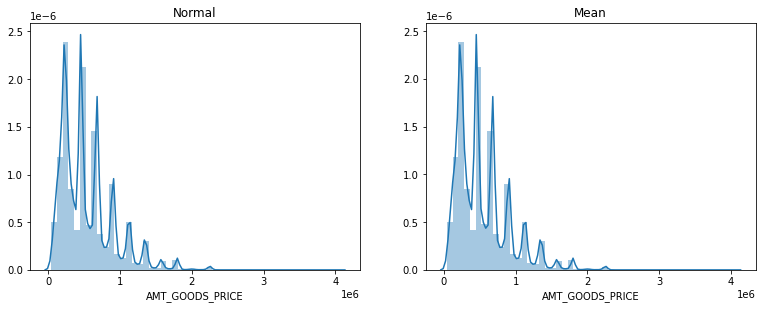

In [116]:
# We can see that median is lower than mean but lets plot it and find out which suites better. 
fig = plt.figure(figsize=(13,10))

ax1 = plt.subplot(221)
sns.distplot(df['AMT_GOODS_PRICE'], ax=ax1)
plt.title('Normal')

ax2 = plt.subplot(222)
sns.distplot(df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].mean()), ax=ax2)
plt.title('Mean')

Columns with such small percentage of missing values does not change anything in the graph. Hence, filling all numerical variables with mean and categorical variables with mode.

In [117]:
df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].mean(), inplace=True)
df['AMT_ANNUITY'].fillna(df['AMT_ANNUITY'].mean(), inplace=True)
df['DAYS_LAST_PHONE_CHANGE'].fillna(df['DAYS_LAST_PHONE_CHANGE'].mean(), inplace=True)

In [118]:
df['CNT_FAM_MEMBERS'].fillna(df['CNT_FAM_MEMBERS'].mode()[0], inplace=True)

In [119]:
df.isnull().sum().sort_values(ascending=False)

EMERGENCYSTATE_MODE    145746
OCCUPATION_TYPE         96388
DAYS_ID_PUBLISH             0
FLAG_EMP_PHONE              0
FLAG_WORK_PHONE             0
                        ...  
FLAG_DOCUMENT_2             0
FLAG_DOCUMENT_3             0
FLAG_DOCUMENT_4             0
FLAG_DOCUMENT_5             0
SK_ID_CURR                  0
Length: 81, dtype: int64

In [120]:
# Lets change the age of client's age from days to years.
df['DAYS_BIRTH'].head()

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
Name: DAYS_BIRTH, dtype: int64

In [121]:
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: round(abs(x/365)))
df['DAYS_BIRTH'].head()

0    26
1    46
2    52
3    52
4    55
Name: DAYS_BIRTH, dtype: int64

In [122]:
# There is one more column with incorrect input that needs to be corrected
df['CODE_GENDER'].value_counts()

F      202432
M      105050
XNA         4
Name: CODE_GENDER, dtype: int64

In [123]:
# Since the value of XNA is very low, we can fill it with mode
df['CODE_GENDER'].replace('XNA',df['CODE_GENDER'].mode()[0], inplace=True)

In [124]:
df['CODE_GENDER'].value_counts()

F    202436
M    105050
Name: CODE_GENDER, dtype: int64

# Data cleaning is done.

## Working with 'TARGET' variable, as it is most important for ploting and analysis.

In [125]:
df['TARGET'].head()

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [126]:
df['TARGET'].value_counts()

0    282666
1     24820
Name: TARGET, dtype: int64

Since there is a huge difference in counts of 0 and 1, therefore data is imbalanced. Means data contains more number of people's information who are paying installments on time and less number of people's information with difficulties in payments. 

### What is ratio of imbalance?

In [127]:
(df['TARGET'] == 0).sum()/(df['TARGET'] == 1).sum()

11.38863819500403

# Starting visualization to get insights

In [128]:
# Since there is a lot of imbalance, we need to separate these out.
train_0 = df.loc[df['TARGET'] == 0]
train_1 = df.loc[df['TARGET'] == 1]

In [129]:
# Retrieving numerical columns again after cleaning
numericals = df.describe().columns
numericals

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
      

In [130]:
# Retrieving categorical columns
categorical = list(set(df.columns) - set(numericals))
categorical

['WEEKDAY_APPR_PROCESS_START',
 'OCCUPATION_TYPE',
 'NAME_EDUCATION_TYPE',
 'FLAG_OWN_CAR',
 'NAME_HOUSING_TYPE',
 'NAME_CONTRACT_TYPE',
 'ORGANIZATION_TYPE',
 'CODE_GENDER',
 'NAME_TYPE_SUITE',
 'NAME_FAMILY_STATUS',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'EMERGENCYSTATE_MODE']

In [131]:
# now proceed with plotting for insights
def plotting(train, train_0, train_1, col):
    
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(221)
    train[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ col)
    
    ax2 = plt.subplot(222)
    sns.countplot(x= col, hue = 'TARGET', data = train, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    df = pd.DataFrame()
    df['0']= ((train_0[col].value_counts())/len(train_0))
    df['1']= ((train_1[col].value_counts())/len(train_1))
    df.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')


    plt.tight_layout()

    plt.show()
      

## Univariate Analysis of categorical variables

Plotting  WEEKDAY_APPR_PROCESS_START


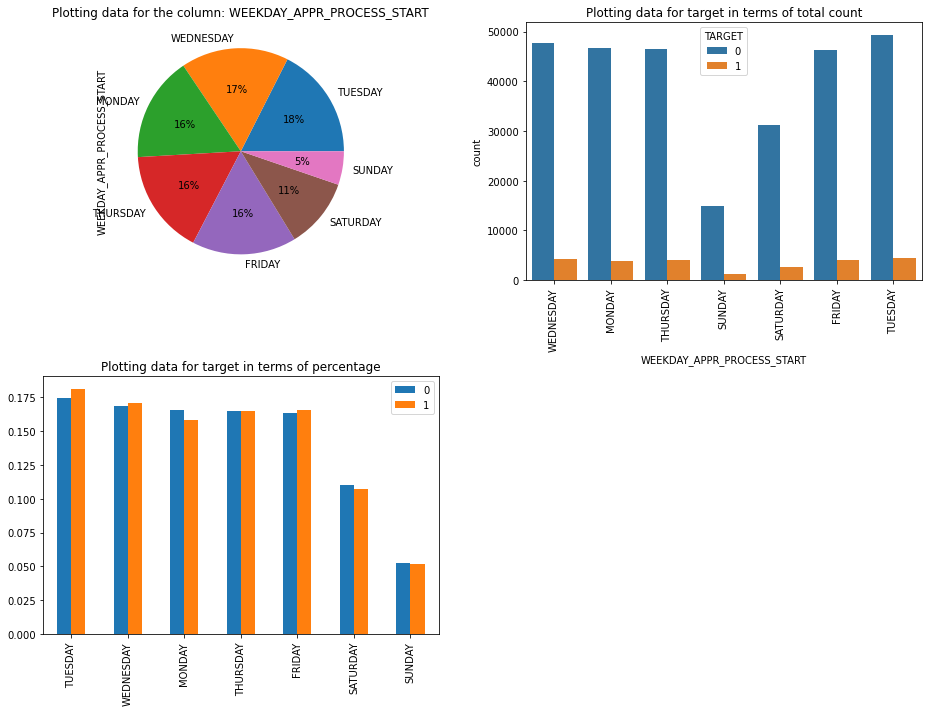

Plotting  OCCUPATION_TYPE


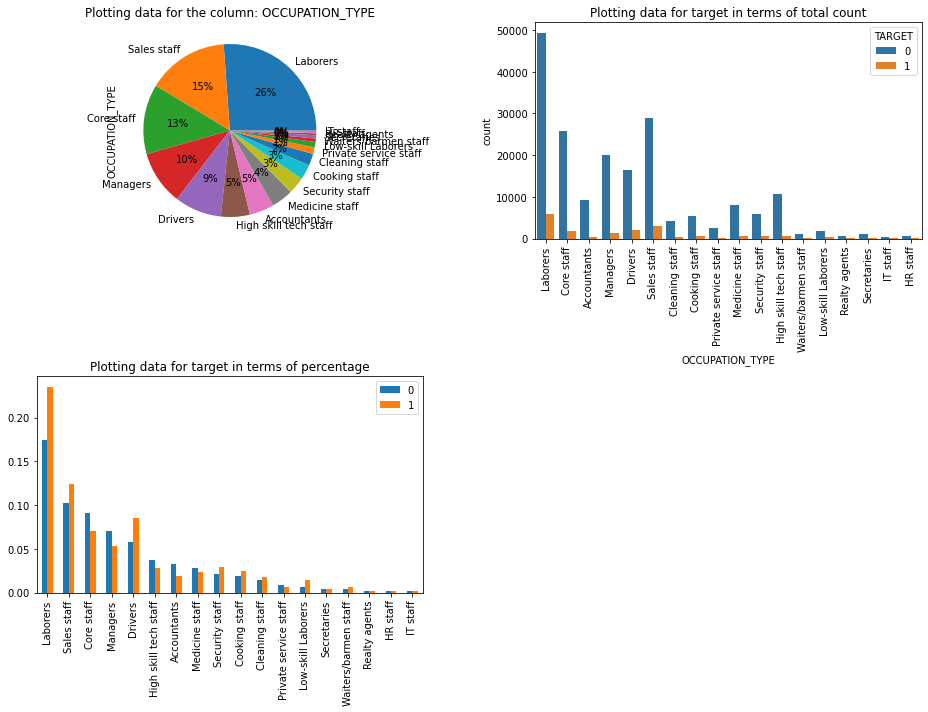

Plotting  NAME_EDUCATION_TYPE


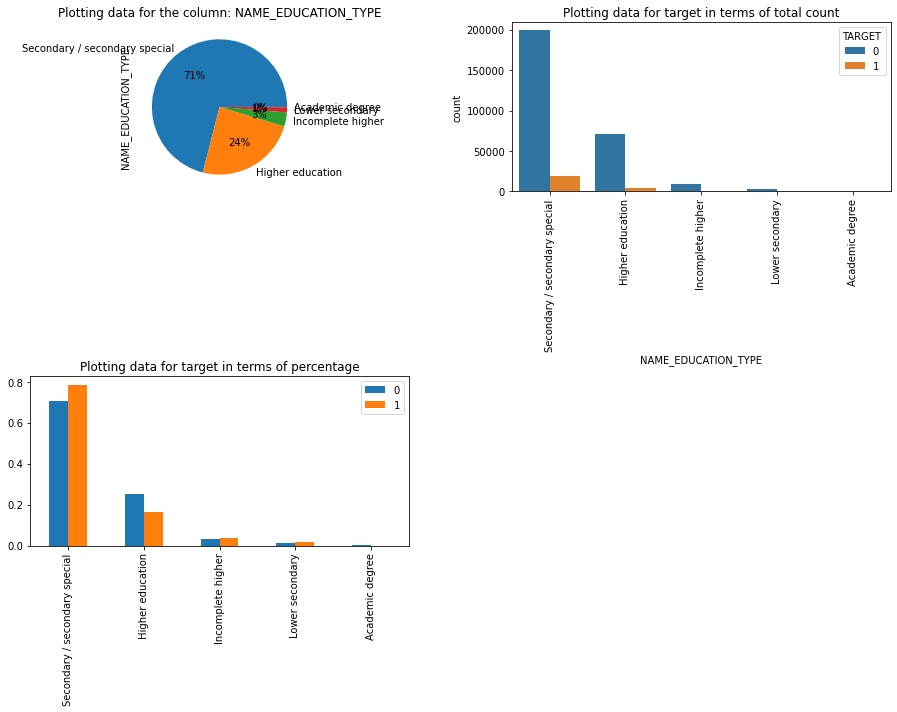

Plotting  FLAG_OWN_CAR


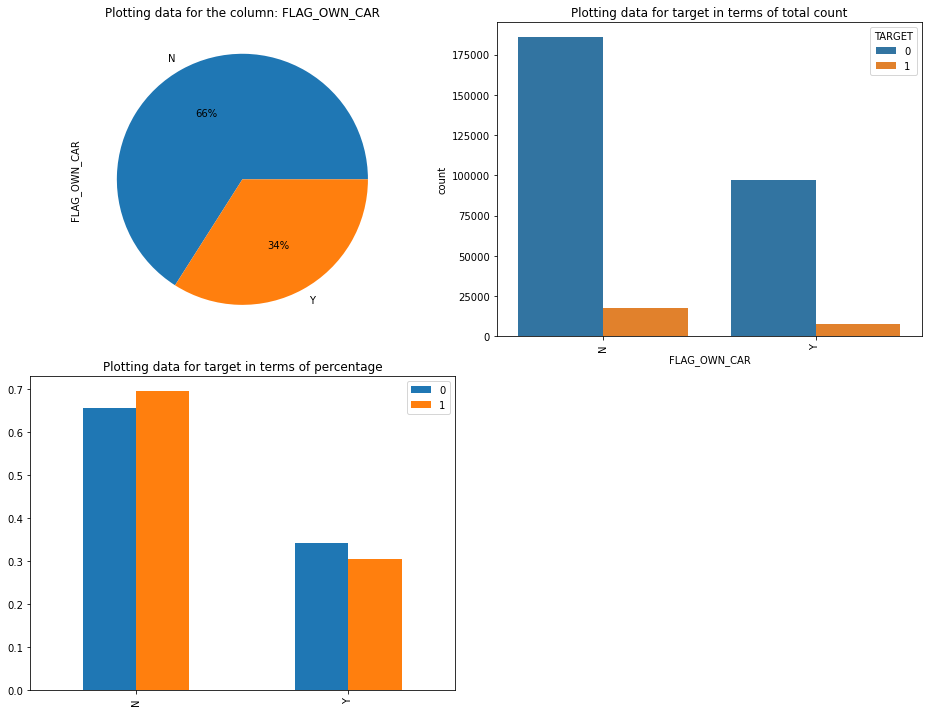

Plotting  NAME_HOUSING_TYPE


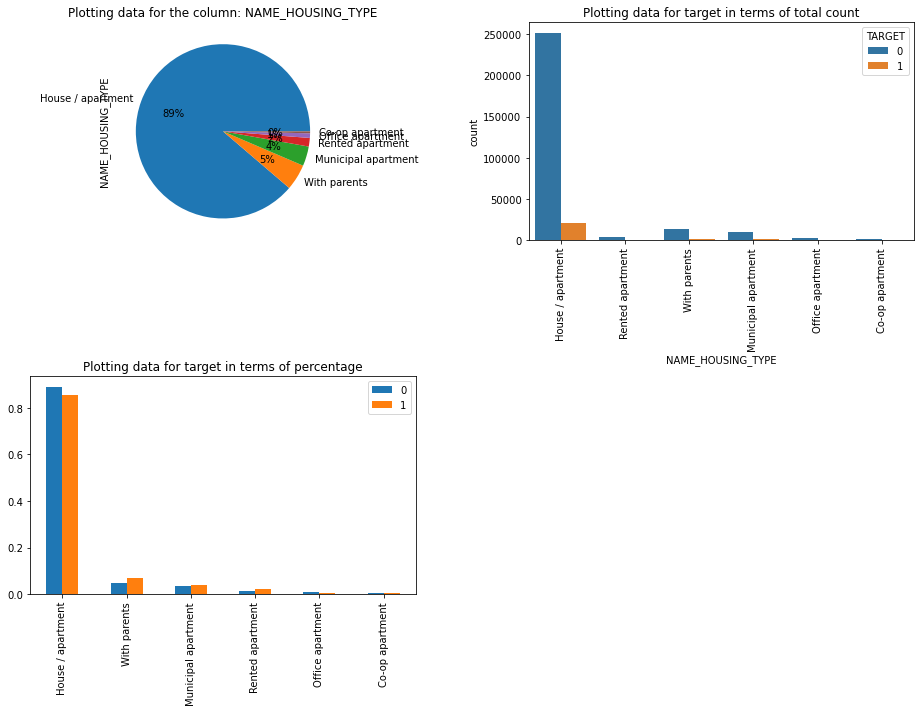

Plotting  NAME_CONTRACT_TYPE


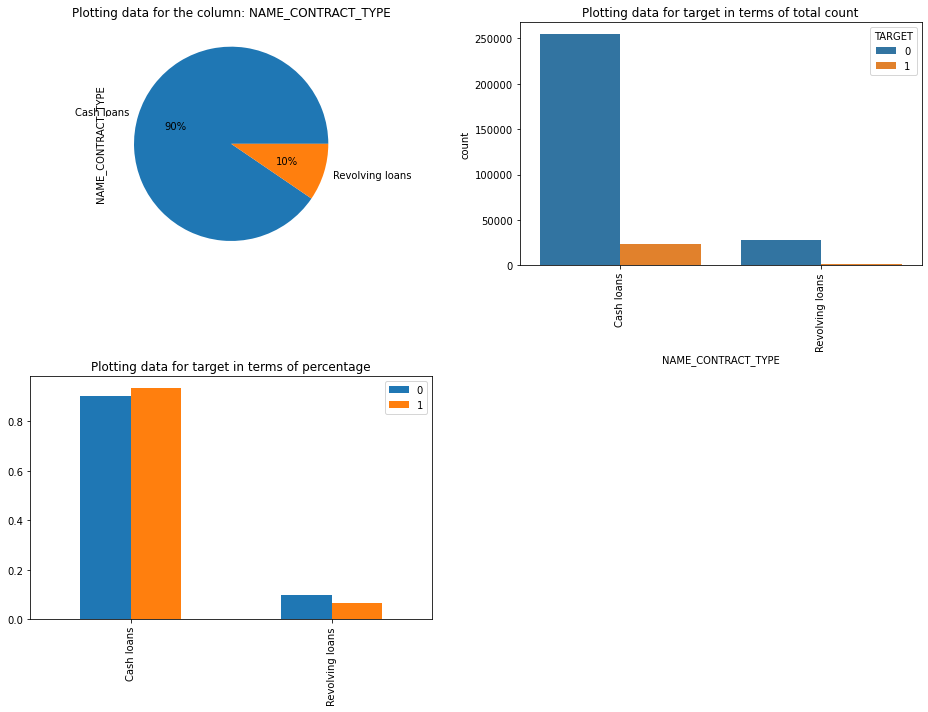

Plotting  ORGANIZATION_TYPE


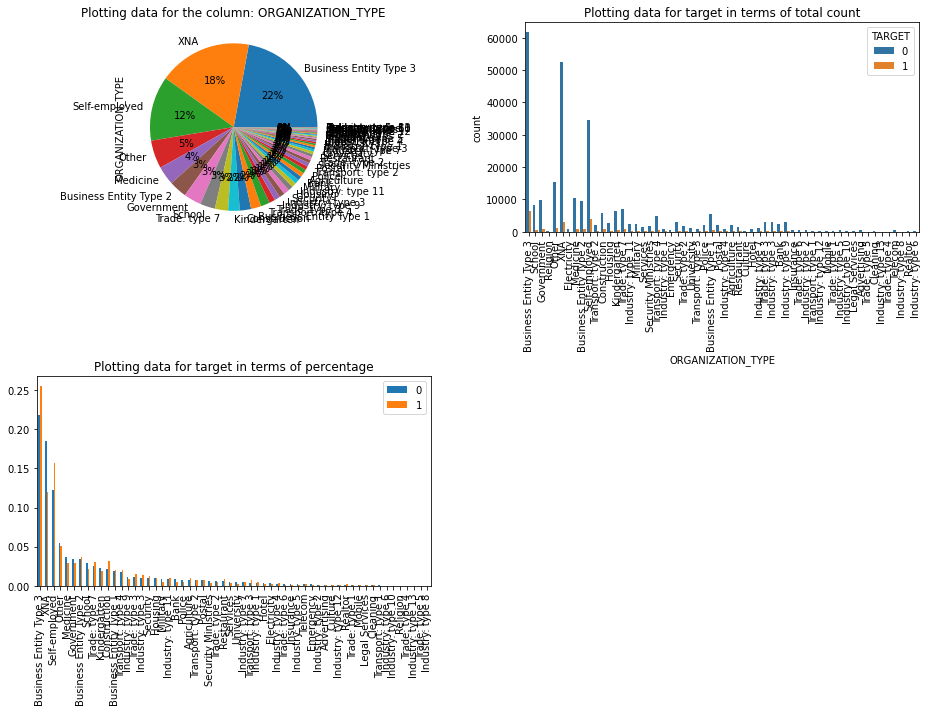

Plotting  CODE_GENDER


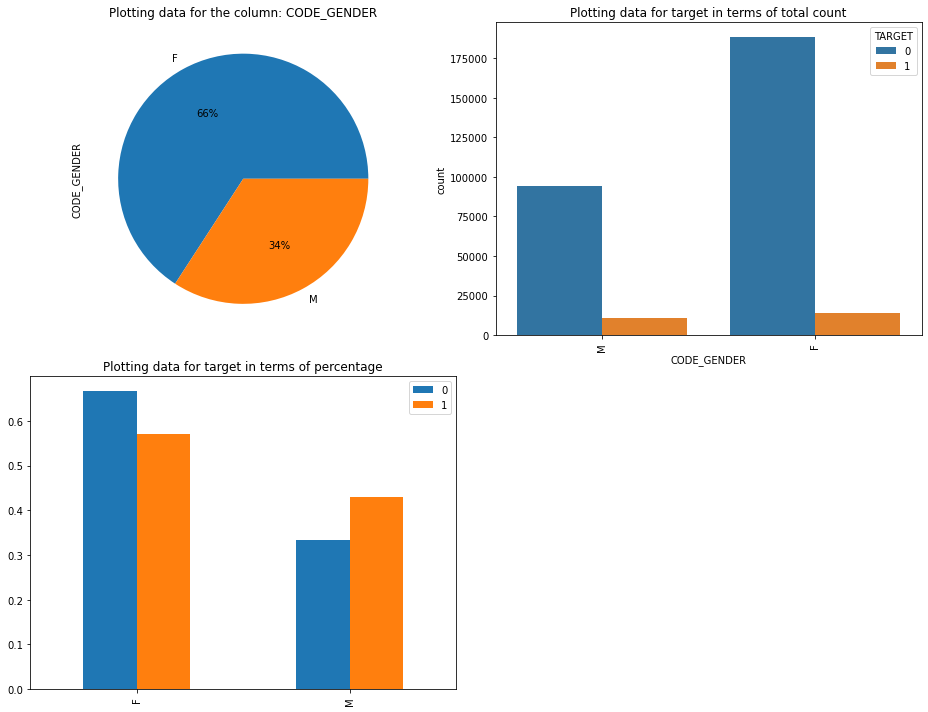

Plotting  NAME_TYPE_SUITE


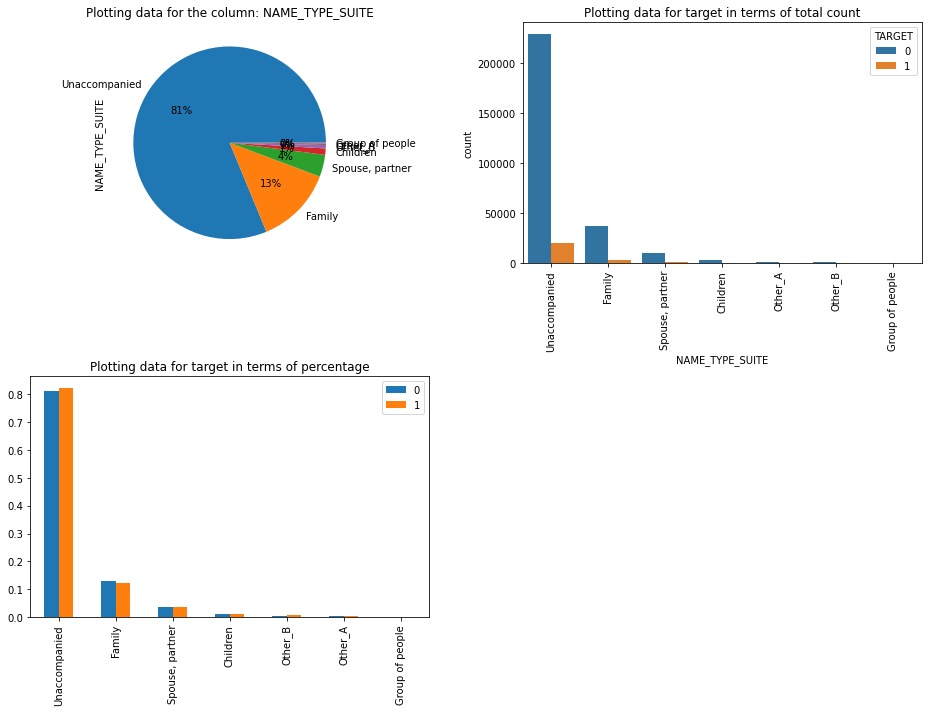

Plotting  NAME_FAMILY_STATUS


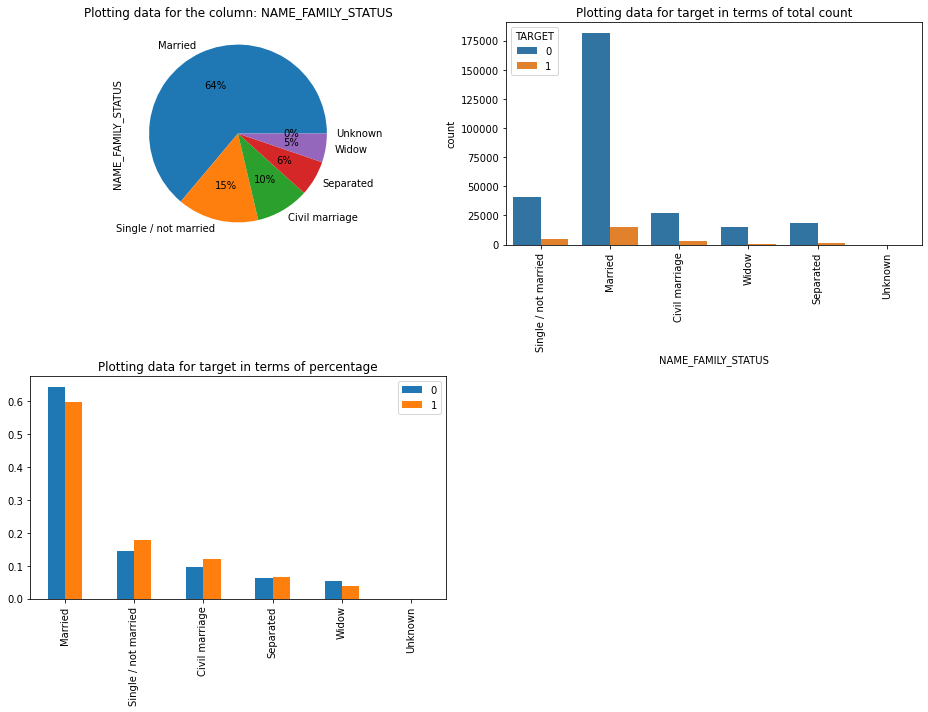

Plotting  FLAG_OWN_REALTY


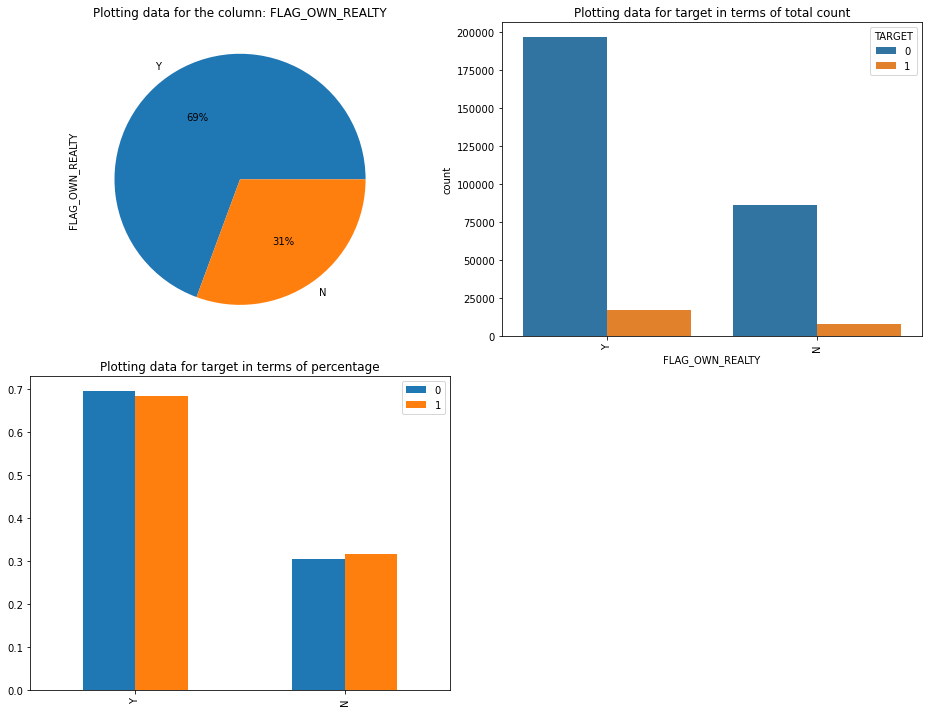

Plotting  NAME_INCOME_TYPE


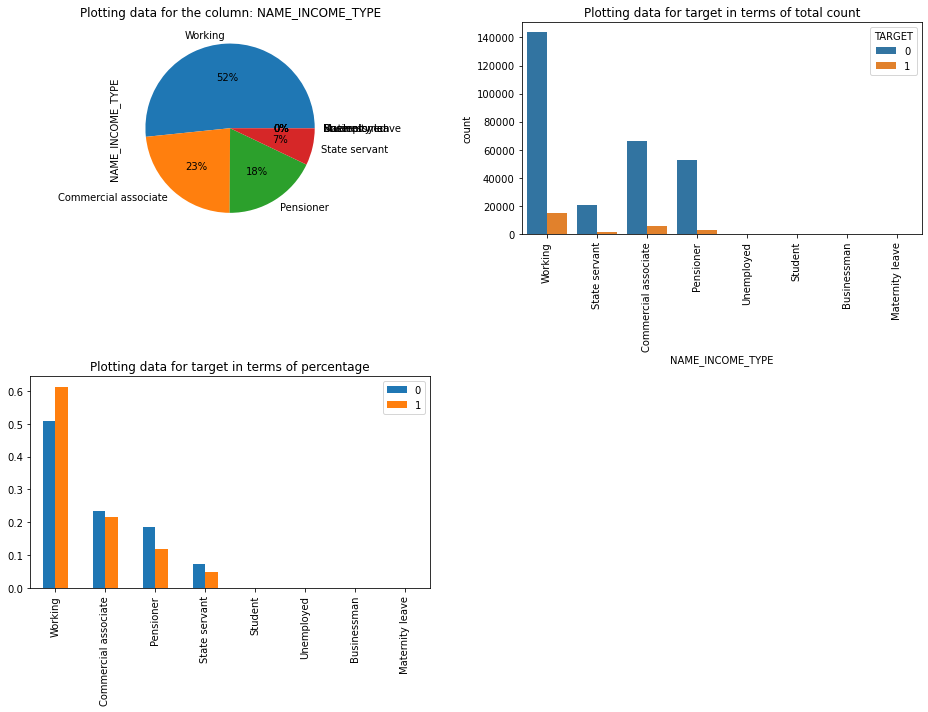

Plotting  EMERGENCYSTATE_MODE


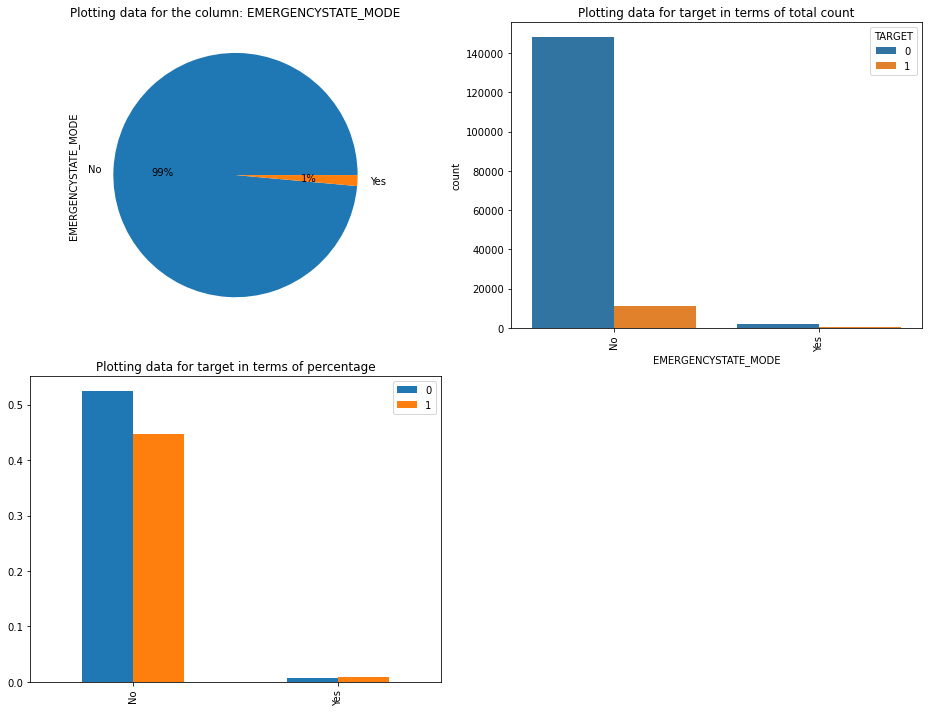

In [132]:
for col in categorical:
    print("Plotting ", col)
    plotting(df,train_0, train_1, col)
    print('             ====================================================================================')

## Univariate Analysis of numerical variables

Plotting Histogram

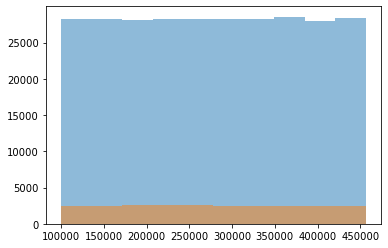

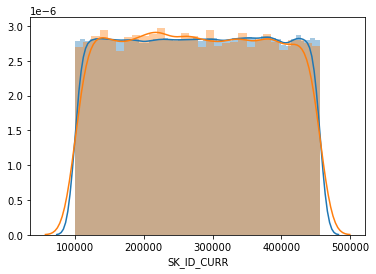

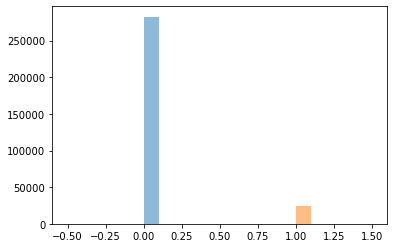

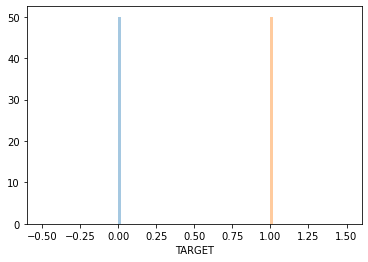

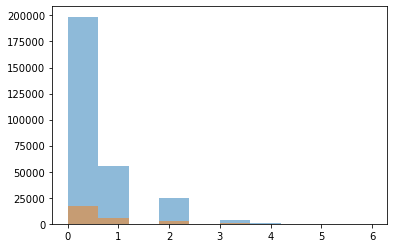

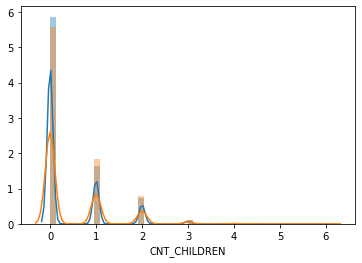

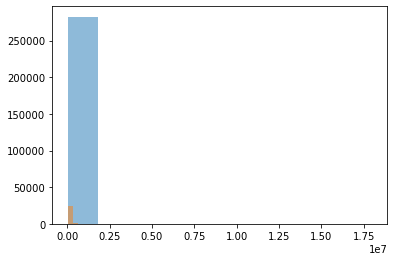

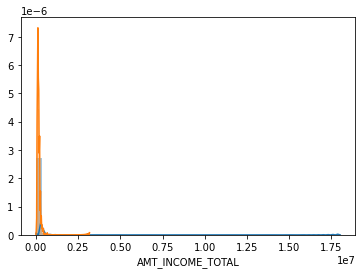

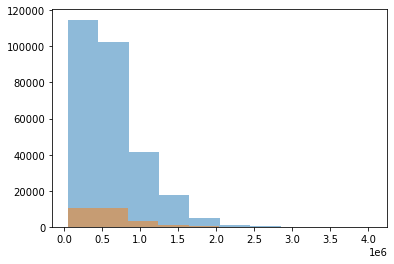

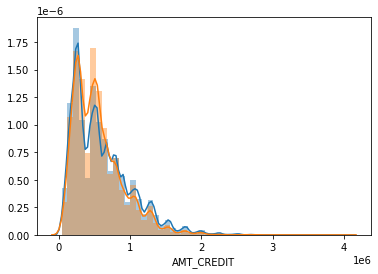

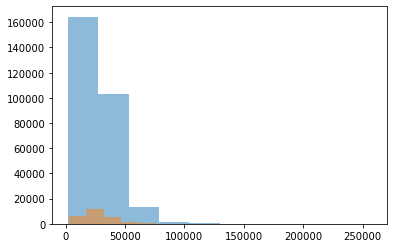

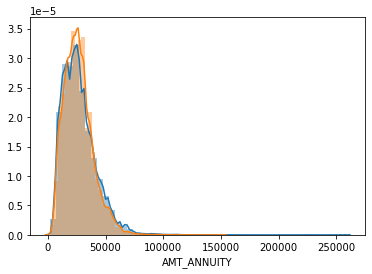

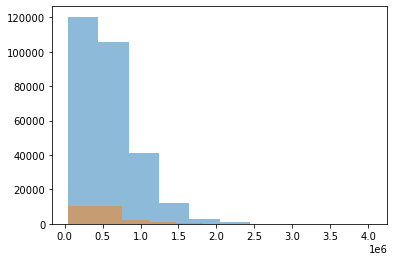

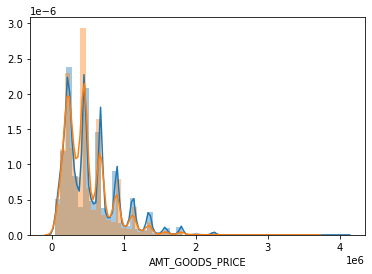

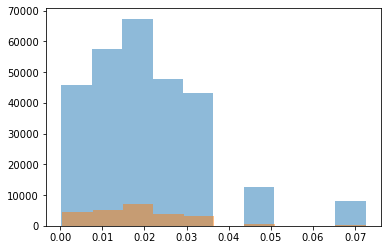

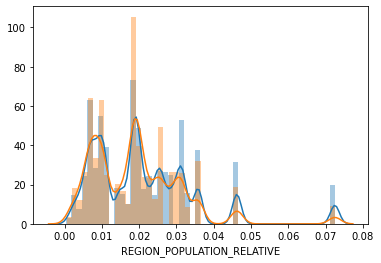

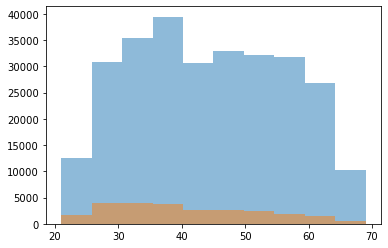

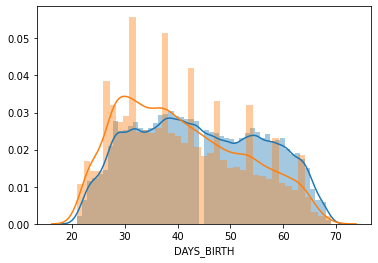

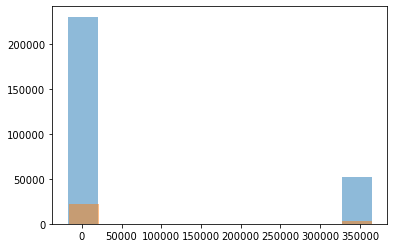

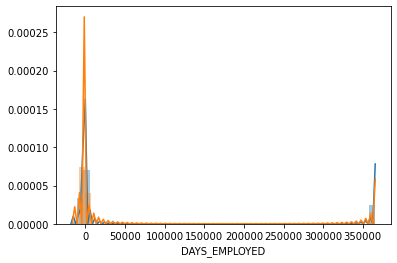

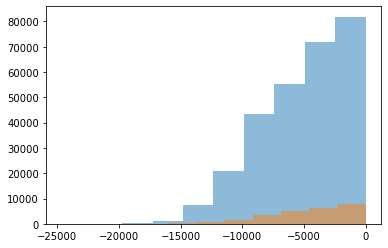

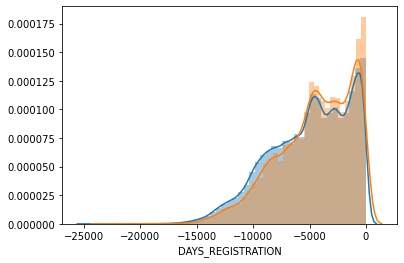

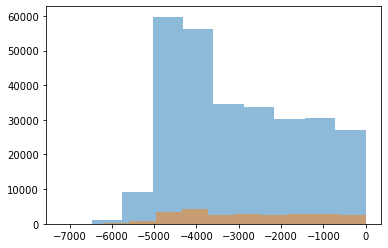

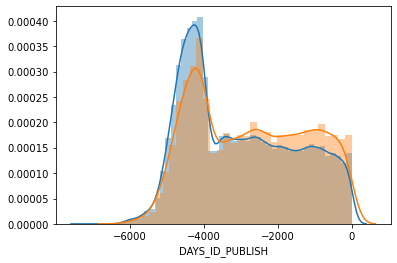

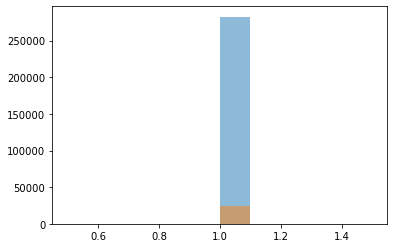

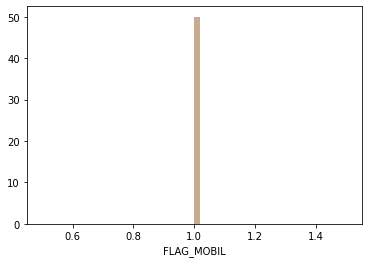

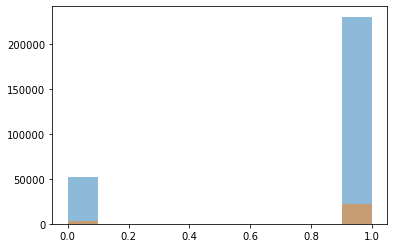

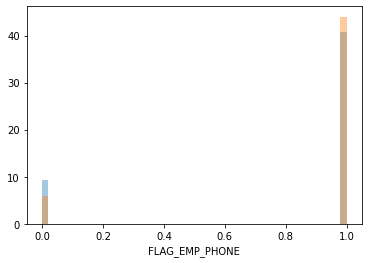

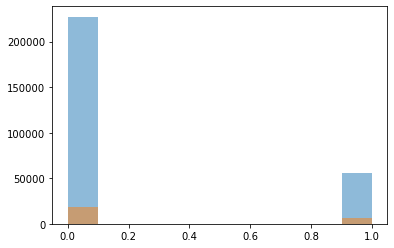

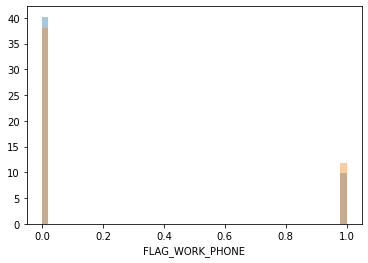

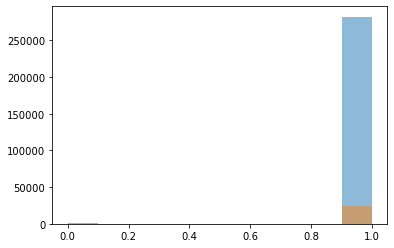

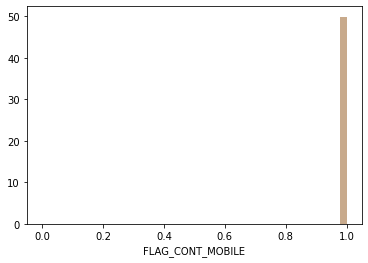

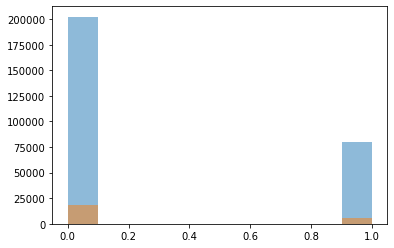

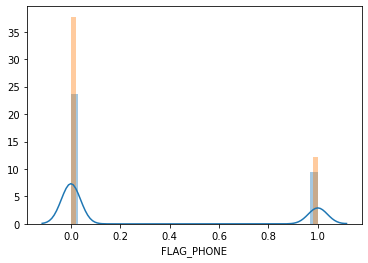

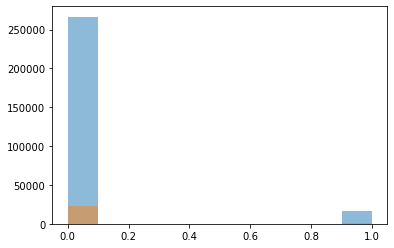

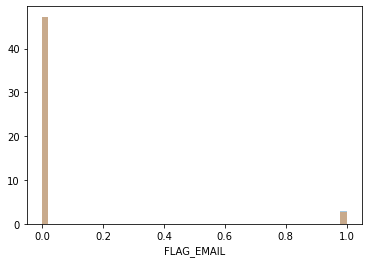

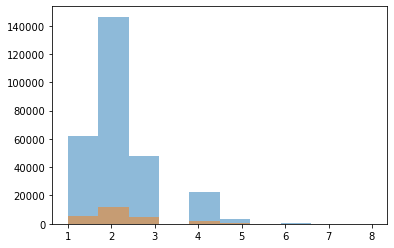

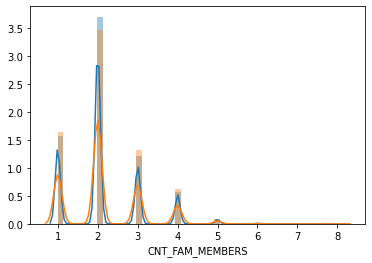

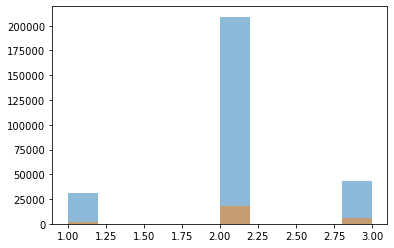

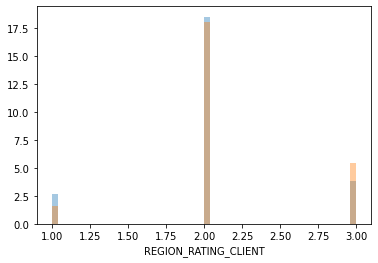

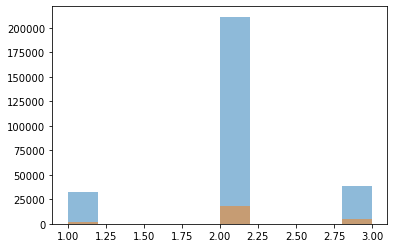

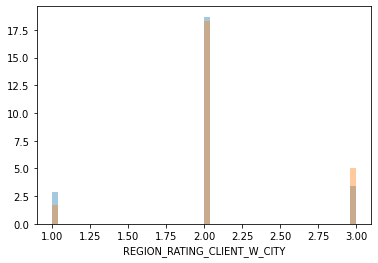

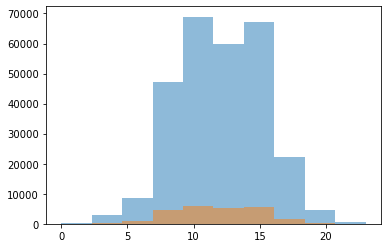

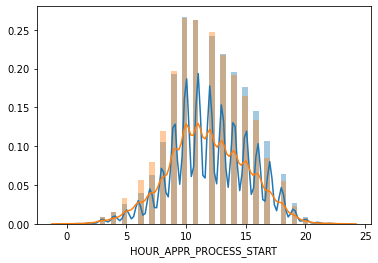

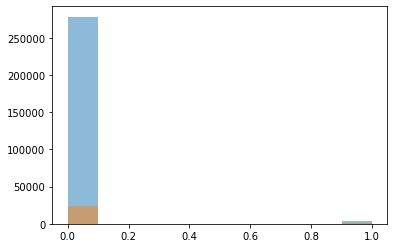

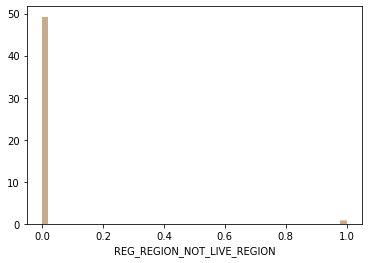

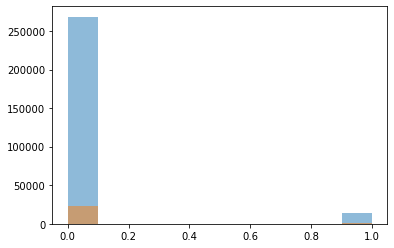

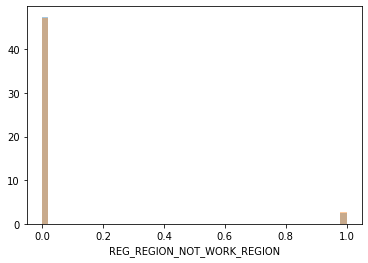

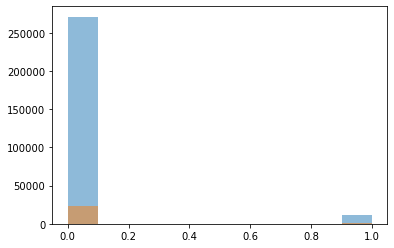

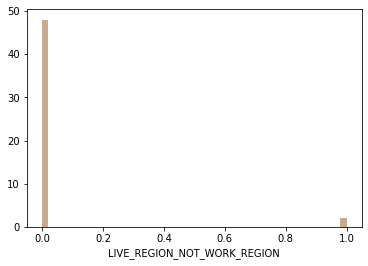

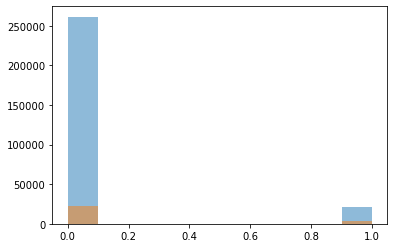

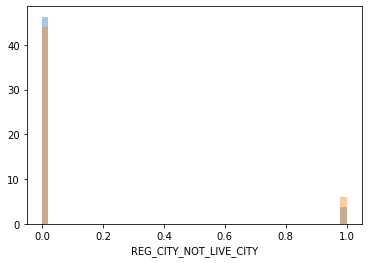

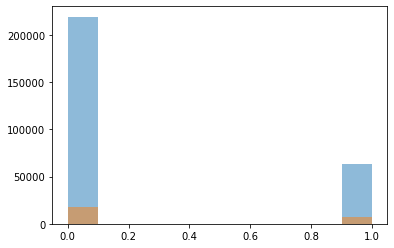

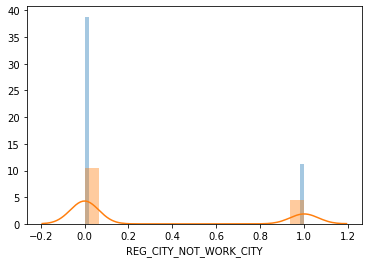

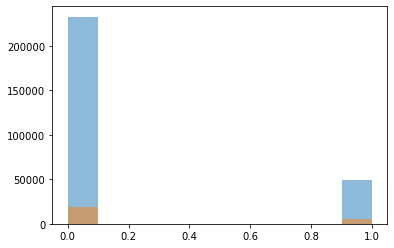

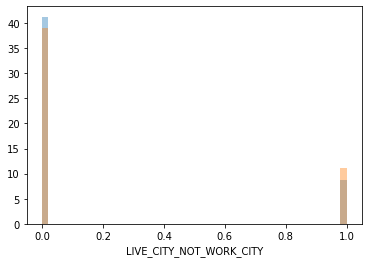

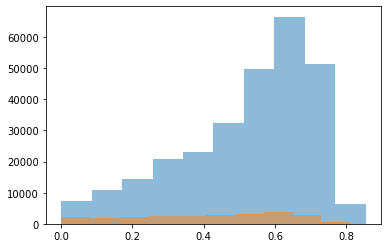

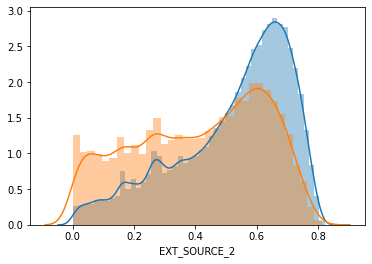

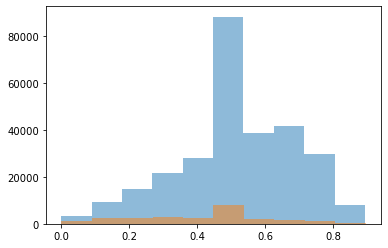

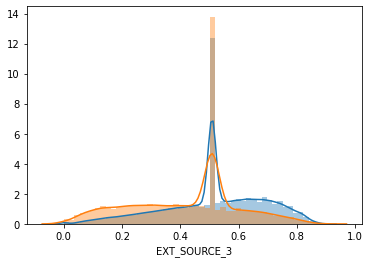

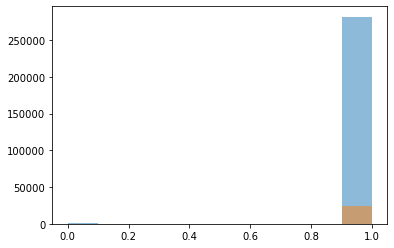

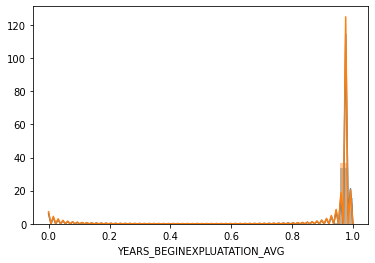

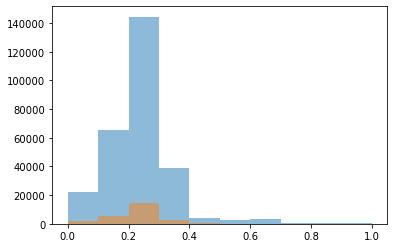

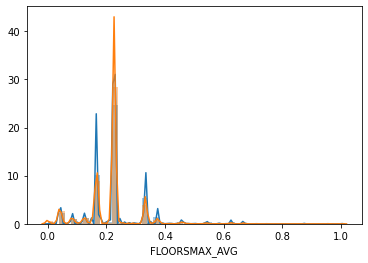

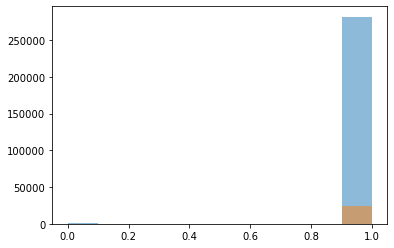

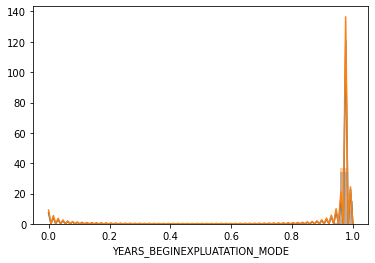

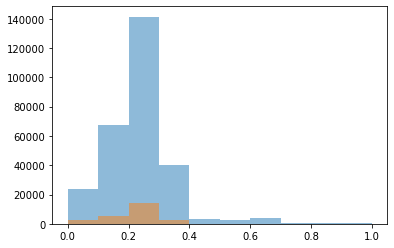

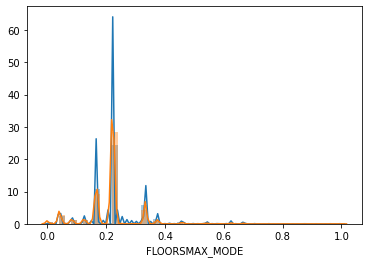

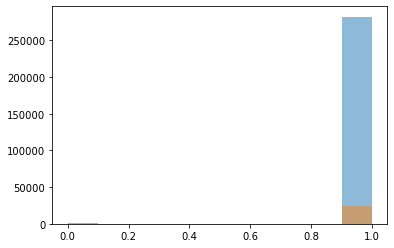

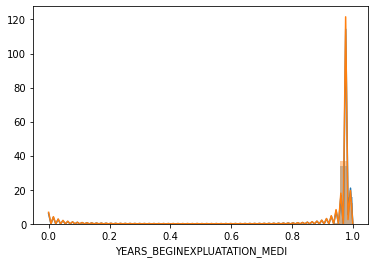

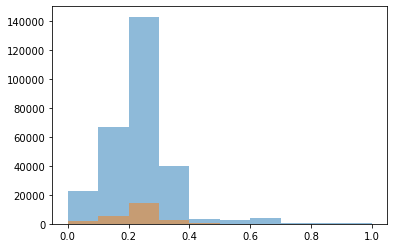

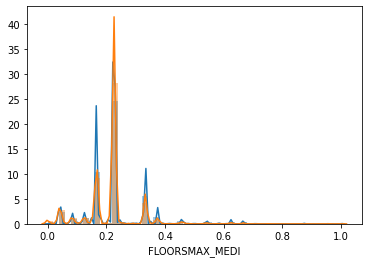

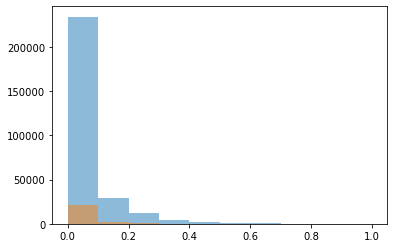

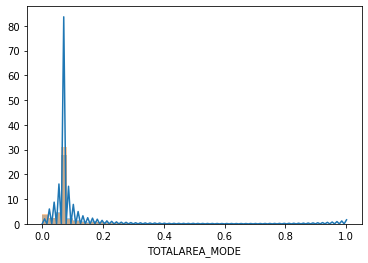

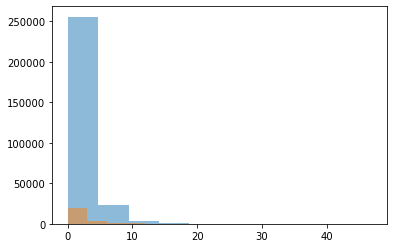

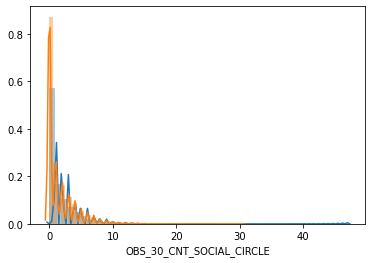

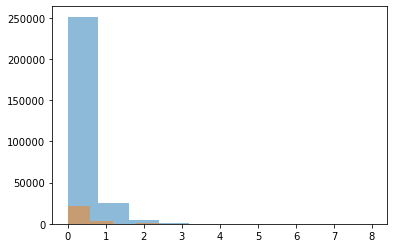

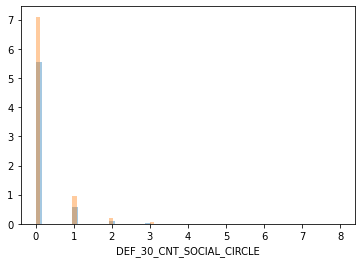

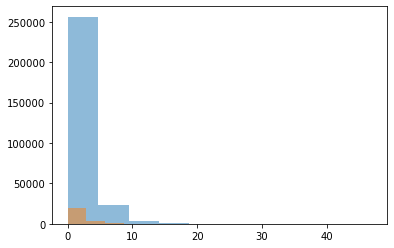

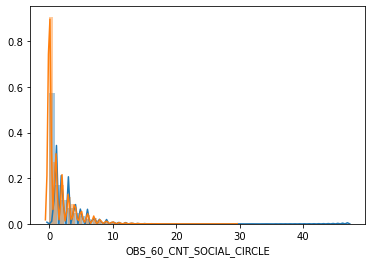

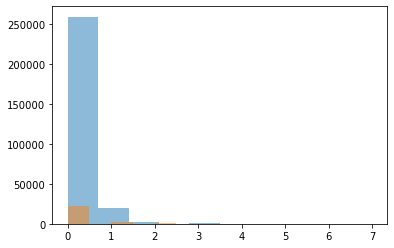

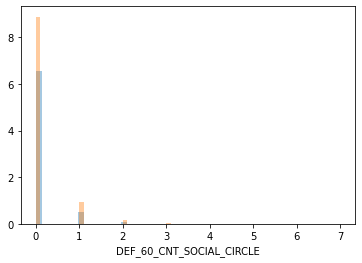

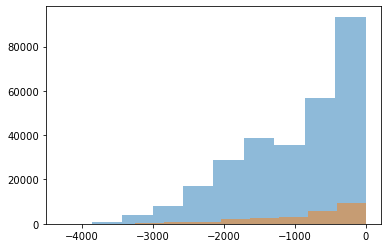

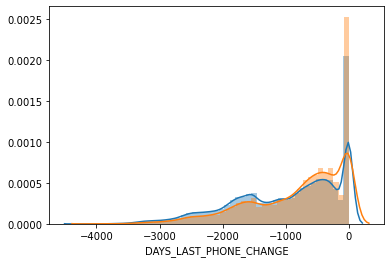

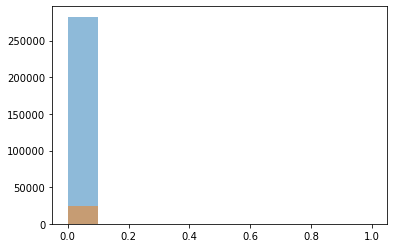

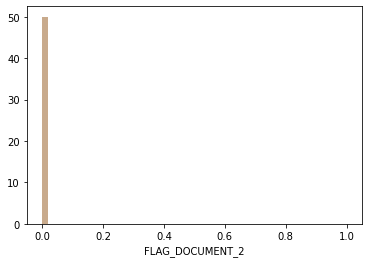

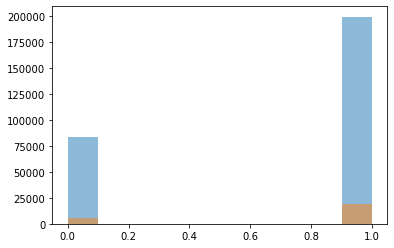

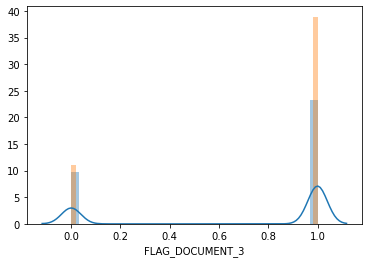

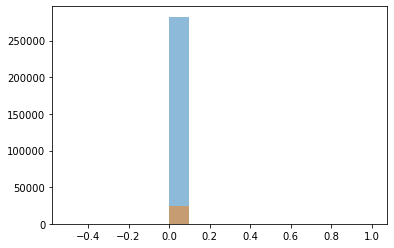

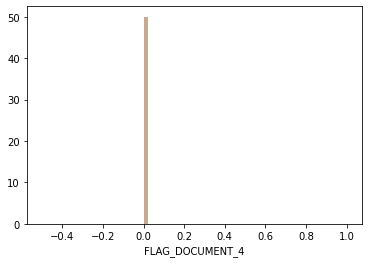

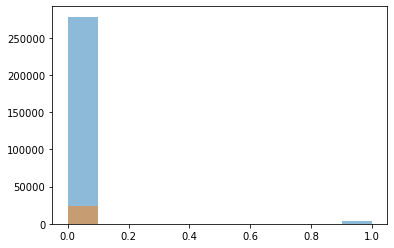

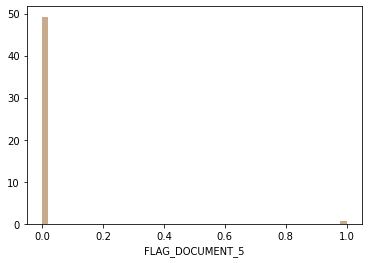

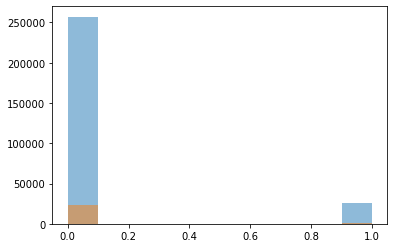

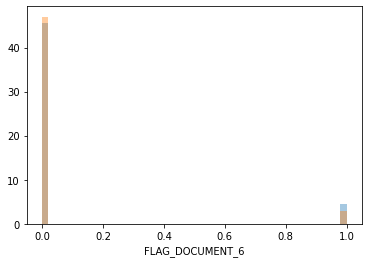

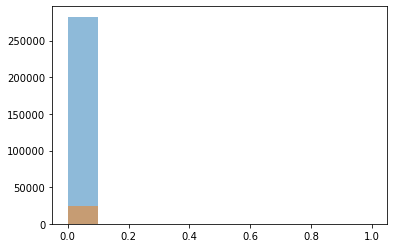

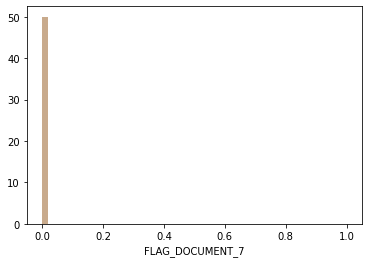

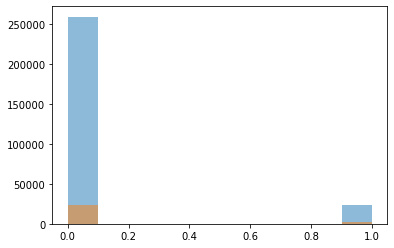

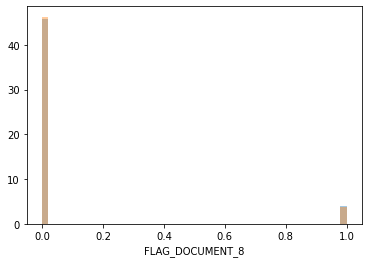

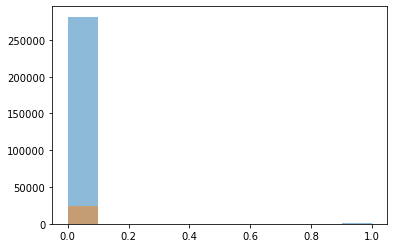

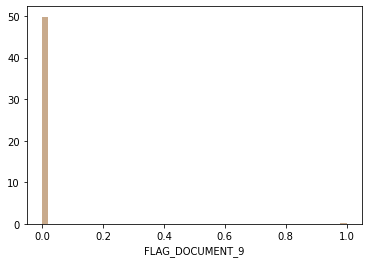

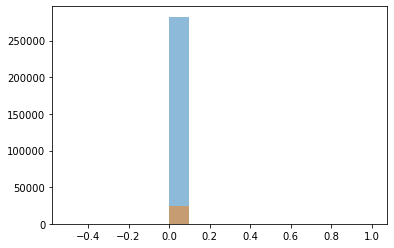

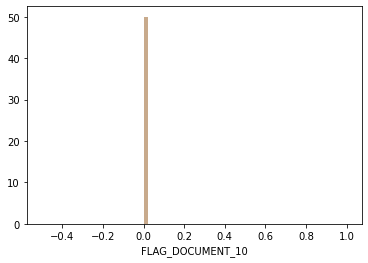

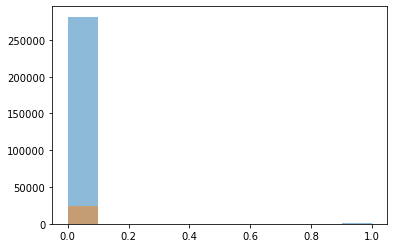

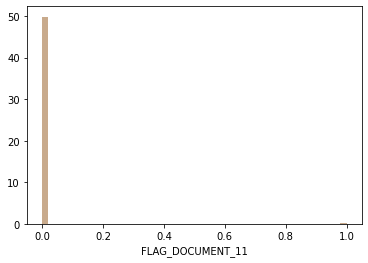

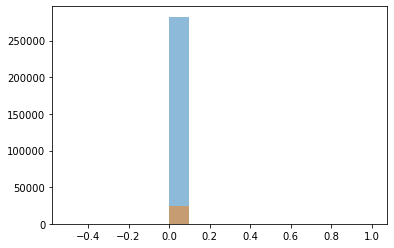

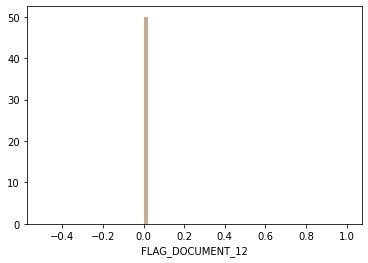

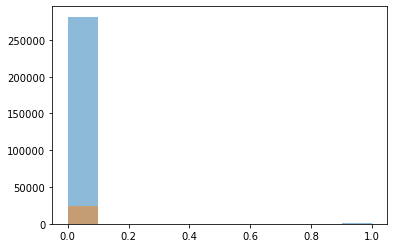

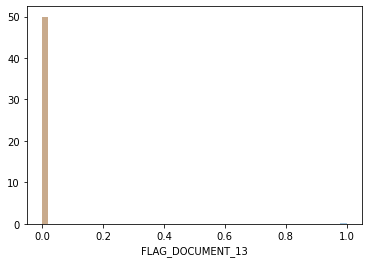

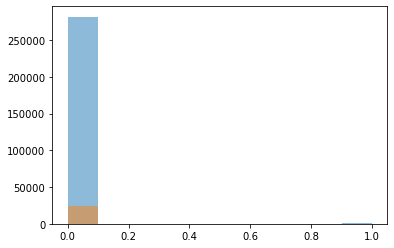

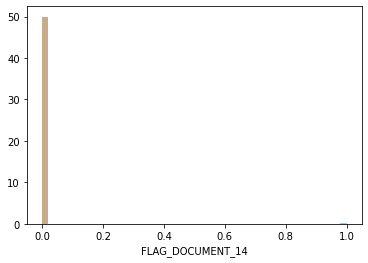

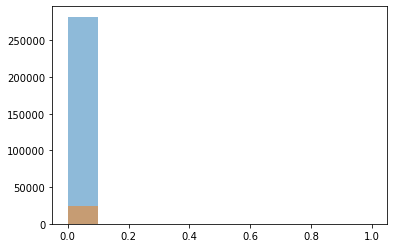

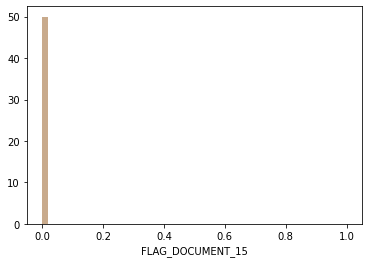

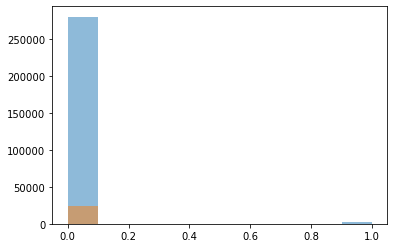

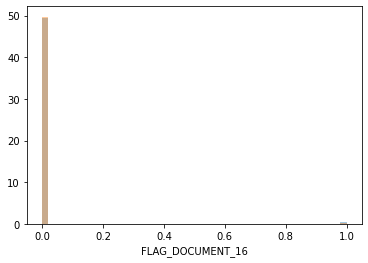

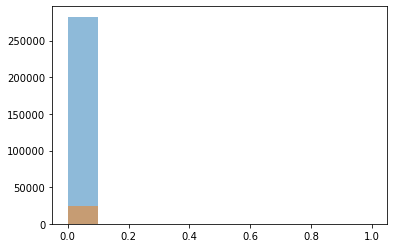

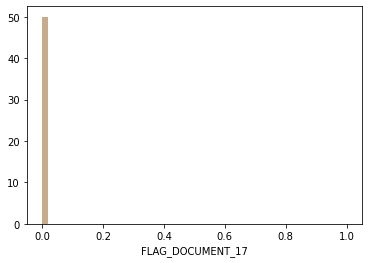

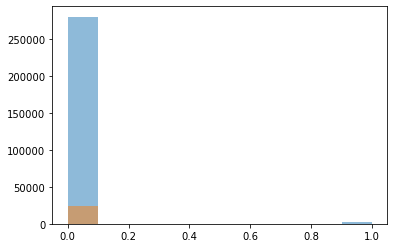

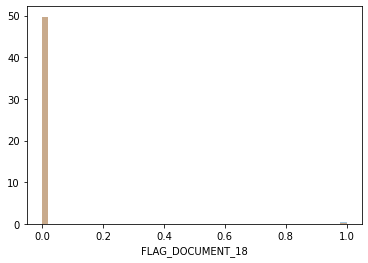

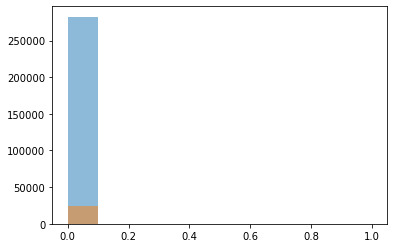

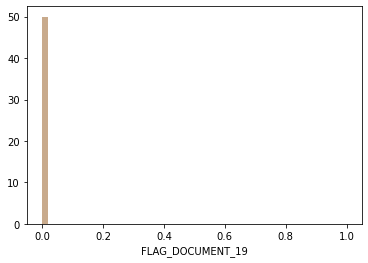

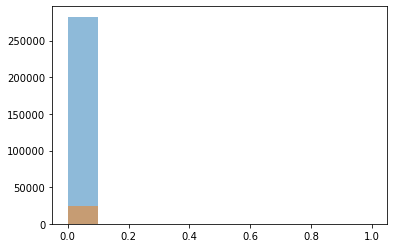

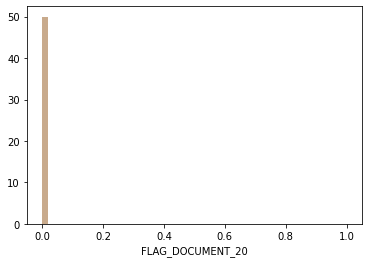

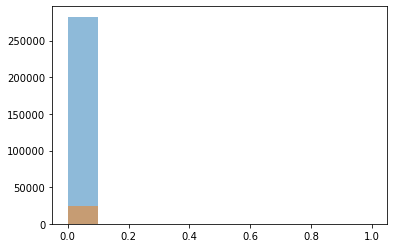

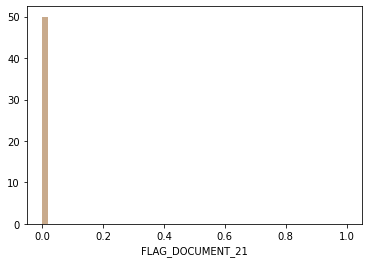

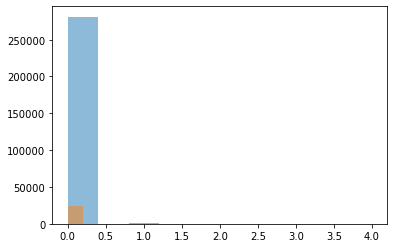

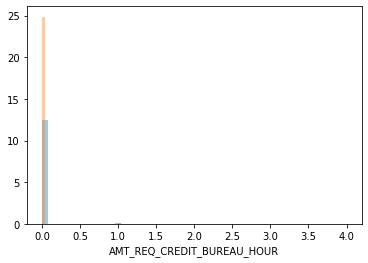

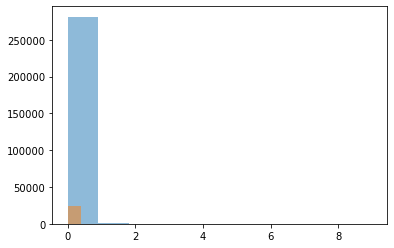

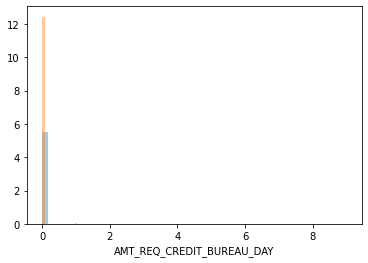

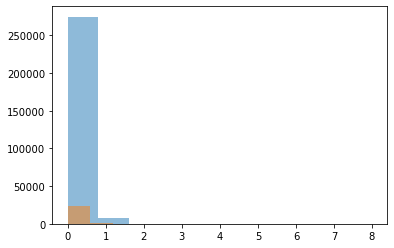

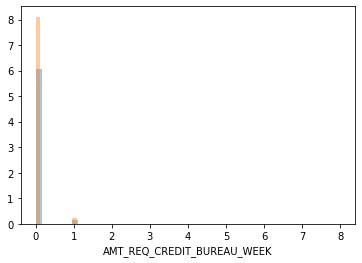

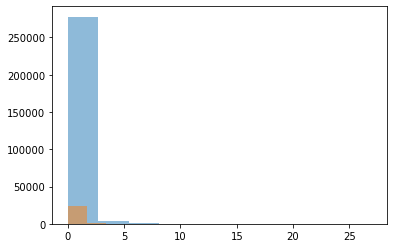

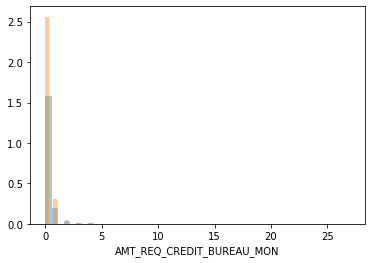

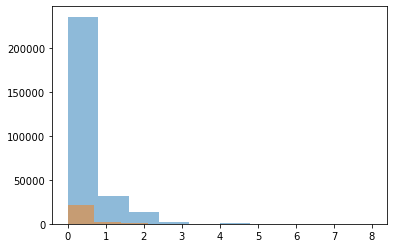

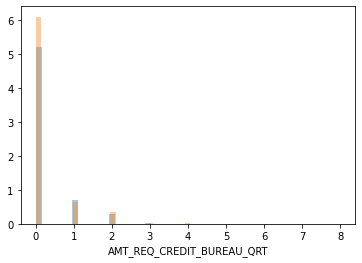

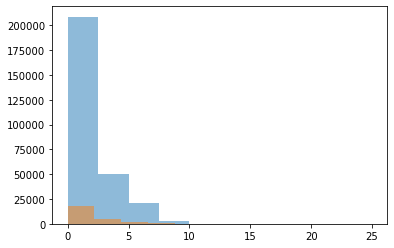

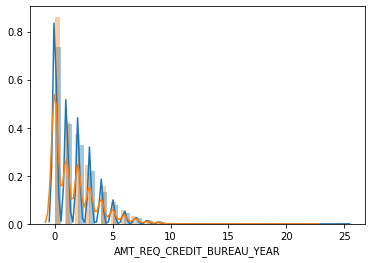

In [133]:
for column in numericals:
    plt.hist(train_0[column],alpha=0.5,label='0')
    plt.hist(train_1[column],alpha=0.5,label='1')
    plt.show()
    
    sns.distplot(train_0[column], label='0')
    sns.distplot(train_1[column], label='1')
    
    plt.show()
    print(" ========================================================")

## Numerical columns

### Heat map for client with all other cases

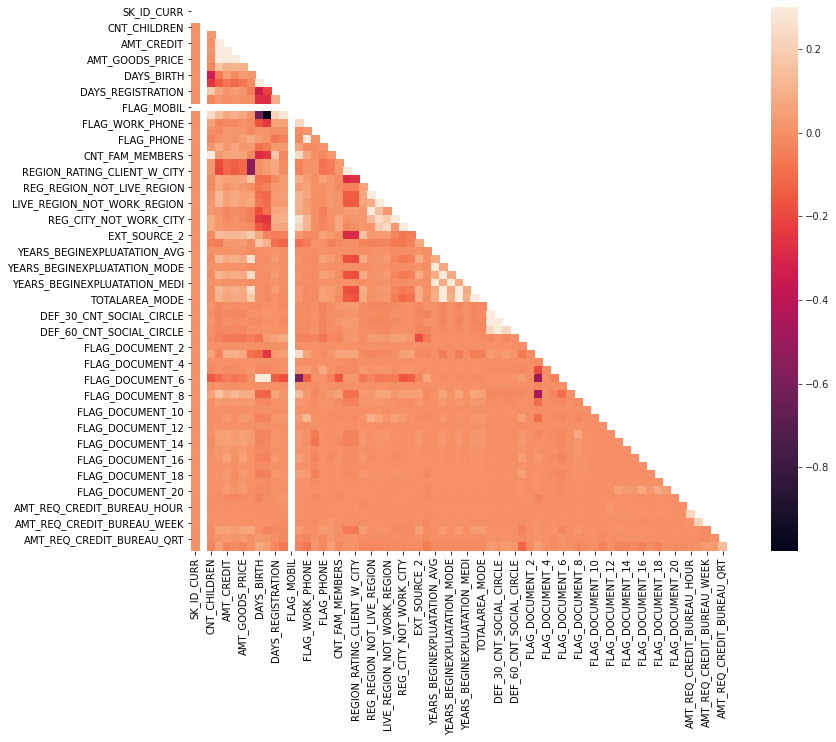

In [134]:
corr = train_0.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(13, 10))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True);

In [135]:
train_0.corr()

SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                    1.000000     NaN     -0.000889   
TARGET                             NaN     NaN           NaN   
CNT_CHILDREN                 -0.000889     NaN      1.000000   
AMT_INCOME_TOTAL              0.001741     NaN      0.027878   
AMT_CREDIT                   -0.000324     NaN      0.003419   
...                                ...     ...           ...   
AMT_REQ_CREDIT_BUREAU_DAY    -0.001626     NaN      0.001117   
AMT_REQ_CREDIT_BUREAU_WEEK    0.002271     NaN     -0.000597   
AMT_REQ_CREDIT_BUREAU_MON    -0.000032     NaN     -0.007597   
AMT_REQ_CREDIT_BUREAU_QRT    -0.000275     NaN     -0.006781   
AMT_REQ_CREDIT_BUREAU_YEAR    0.003516     NaN     -0.030729   

                            AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                          0.001741   -0.000324     0.000092   
TARGET                                   NaN         NaN          NaN   
CNT_CHILDREN                        0.027878    0.003419     0.021271   
AMT_INCOME_TOTAL                    1.000000    0.342791     0.418940   
AMT_CREDIT                          0.342791    1.000000     0.771295   
...                                      ...         ...          ...   
AMT_REQ_CREDIT_BUREAU_DAY           0.008028    0.005134     0.002463   
AMT_REQ_CREDIT_BUREAU_WEEK          0.008672    0.000982     0.012426   
AMT_REQ_CREDIT_BUREAU_MON           0.058668    0.055059     0.036286   
AMT_REQ_CREDIT_BUREAU_QRT           0.020456    0.026991     0.014978   
AMT_REQ_CREDIT_BUREAU_YEAR          0.042524   -0.027606    -0.005591   

                            AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
SK_ID_CURR                        -0.000191                    0.000354   
TARGET                                  NaN                         NaN   
CNT_CHILDREN                      -0.000213                   -0.024502   
AMT_INCOME_TOTAL                   0.349354                    0.167824   
AMT_CREDIT                         0.986879                    0.100605   
...                                     ...                         ...   
AMT_REQ_CREDIT_BUREAU_DAY          0.005506                    0.001629   
AMT_REQ_CREDIT_BUREAU_WEEK         0.001216                   -0.002808   
AMT_REQ_CREDIT_BUREAU_MON          0.056638                    0.071485   
AMT_REQ_CREDIT_BUREAU_QRT          0.026967                   -0.003207   
AMT_REQ_CREDIT_BUREAU_YEAR        -0.029884                   -0.001426   

                            DAYS_BIRTH  DAYS_EMPLOYED  ...  FLAG_DOCUMENT_18  \
SK_ID_CURR                    0.001326       0.001742  ...          0.001255   
TARGET                             NaN            NaN  ...               NaN   
CNT_CHILDREN                 -0.338941      -0.244891  ...          0.004318   
AMT_INCOME_TOTAL             -0.062607      -0.141252  ...          0.008230   
AMT_CREDIT                    0.047402      -0.072533  ...          0.035564   
...                                ...            ...  ...               ...   
AMT_REQ_CREDIT_BUREAU_DAY    -0.001580      -0.000910  ...          0.013469   
AMT_REQ_CREDIT_BUREAU_WEEK    0.003524       0.001717  ...         -0.003505   
AMT_REQ_CREDIT_BUREAU_MON     0.001845      -0.033652  ...         -0.001074   
AMT_REQ_CREDIT_BUREAU_QRT     0.021294       0.018210  ...         -0.004404   
AMT_REQ_CREDIT_BUREAU_YEAR    0.077694       0.043038  ...         -0.038070   

                            FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
SK_ID_CURR                          0.000676          0.000832   
TARGET                                   NaN               NaN   
CNT_CHILDREN                        0.001108          0.001332   
AMT_INCOME_TOTAL                    0.005761          0.000839   
AMT_CREDIT                          0.021560          0.032152   
...                                      ...               ...   
AMT_REQ_CREDIT_BUREAU_DAY           0.001353          0.00

In [136]:
correlation_0 = train_0.corr().abs().unstack().sort_values(kind='quicksort').dropna()
correlation_0

AMT_REQ_CREDIT_BUREAU_HOUR    FLAG_DOCUMENT_15                2.692886e-08
FLAG_DOCUMENT_15              AMT_REQ_CREDIT_BUREAU_HOUR      2.692886e-08
YEARS_BEGINEXPLUATATION_MEDI  FLAG_DOCUMENT_4                 7.917857e-06
FLAG_DOCUMENT_4               YEARS_BEGINEXPLUATATION_MEDI    7.917857e-06
AMT_REQ_CREDIT_BUREAU_DAY     DAYS_REGISTRATION               8.579312e-06
                                                                  ...     
DEF_30_CNT_SOCIAL_CIRCLE      DEF_30_CNT_SOCIAL_CIRCLE        1.000000e+00
OBS_30_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        1.000000e+00
TOTALAREA_MODE                TOTALAREA_MODE                  1.000000e+00
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MEDI    1.000000e+00
AMT_REQ_CREDIT_BUREAU_YEAR    AMT_REQ_CREDIT_BUREAU_YEAR      1.000000e+00
Length: 4356, dtype: float64

In [137]:
correlation_0 = correlation_0[correlation_0 != 1.0]
correlation_0

AMT_REQ_CREDIT_BUREAU_HOUR    FLAG_DOCUMENT_15                2.692886e-08
FLAG_DOCUMENT_15              AMT_REQ_CREDIT_BUREAU_HOUR      2.692886e-08
YEARS_BEGINEXPLUATATION_MEDI  FLAG_DOCUMENT_4                 7.917857e-06
FLAG_DOCUMENT_4               YEARS_BEGINEXPLUATATION_MEDI    7.917857e-06
AMT_REQ_CREDIT_BUREAU_DAY     DAYS_REGISTRATION               8.579312e-06
                                                                  ...     
FLOORSMAX_MEDI                FLOORSMAX_AVG                   9.970189e-01
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        9.983925e-01
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        9.983925e-01
FLAG_EMP_PHONE                DAYS_EMPLOYED                   9.997584e-01
DAYS_EMPLOYED                 FLAG_EMP_PHONE                  9.997584e-01
Length: 4290, dtype: float64

In [138]:
correlation_0.tail(10)

FLOORSMAX_MEDI                FLOORSMAX_MODE                  0.988157
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.988157
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.993582
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.993582
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997019
FLOORSMAX_MEDI                FLOORSMAX_AVG                   0.997019
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998393
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998393
FLAG_EMP_PHONE                DAYS_EMPLOYED                   0.999758
DAYS_EMPLOYED                 FLAG_EMP_PHONE                  0.999758
dtype: float64

### Heat map for client with payment difficulties

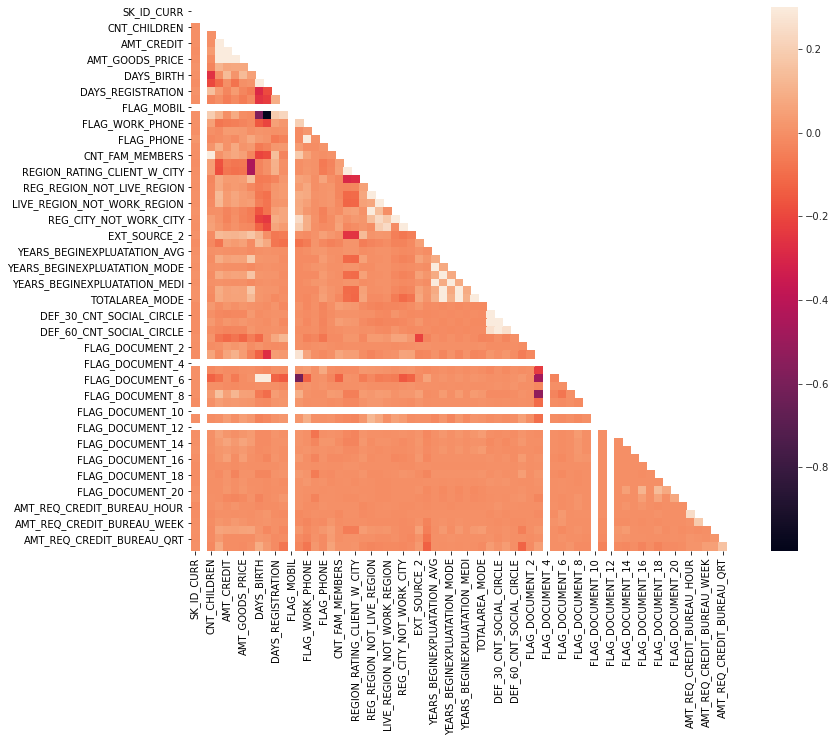

In [139]:
corr1 = train_1.corr()
mask1 = np.zeros_like(corr)
mask1[np.triu_indices_from(mask1)] = True
f, ax = plt.subplots(figsize=(13, 10))
with sns.axes_style("white"):
    ax = sns.heatmap(corr1, mask=mask1, vmax=0.3, square=True);

In [140]:
correlation_1 = train_1.corr().abs()
correlation_1 = correlation_1.unstack().sort_values(kind='quicksort')
correlation_1 = correlation_1.dropna()
correlation_1 = correlation_1[correlation_1 != 1.0 ]
print(correlation_1.tail(10))

FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.989369
FLOORSMAX_MEDI                FLOORSMAX_MODE                  0.989369
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.996125
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.996125
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997233
FLOORSMAX_MEDI                FLOORSMAX_AVG                   0.997233
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998270
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998270
FLAG_EMP_PHONE                DAYS_EMPLOYED                   0.999702
DAYS_EMPLOYED                 FLAG_EMP_PHONE                  0.999702
dtype: float64


## Reading the previous application data

In [141]:
previous_application = pd.read_csv('previous_application.csv')
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [142]:
previous_application.shape

(1048575, 37)

This file contains duplicate SK_ID_CURR which indicates that a person have taken loan multiple times.

In [143]:
# Unique previous applicants in the data set.
previous_application['SK_ID_PREV'].value_counts()

2099199    1
1600088    1
1694318    1
1688173    1
1690220    1
          ..
2169481    1
2189959    1
2187910    1
2181763    1
2097152    1
Name: SK_ID_PREV, Length: 1048575, dtype: int64

In [144]:
# Unique current applicants in the data set.
previous_application['SK_ID_CURR'].value_counts()

265681    52
173680    47
187868    46
235163    43
133023    42
          ..
144878     1
283711     1
138731     1
447599     1
100401     1
Name: SK_ID_CURR, Length: 305828, dtype: int64

The length of 'SK_ID_CURR' is 305828 and length of 'SK_ID_PREV' is 1048575 which indicates that there are duplicate values in 'SK_ID_PREV'.

### Filling null values in previous application

In [145]:
previous_application.isnull().sum().sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       1044854
RATE_INTEREST_PRIMARY          1044854
RATE_DOWN_PAYMENT               559396
AMT_DOWN_PAYMENT                559396
NAME_TYPE_SUITE                 515140
DAYS_TERMINATION                420708
NFLAG_INSURED_ON_APPROVAL       420708
DAYS_FIRST_DRAWING              420708
DAYS_FIRST_DUE                  420708
DAYS_LAST_DUE_1ST_VERSION       420708
DAYS_LAST_DUE                   420708
AMT_GOODS_PRICE                 240965
AMT_ANNUITY                     233009
CNT_PAYMENT                     233006
PRODUCT_COMBINATION                224
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_CREDIT                           0
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
AMT_APPLICATION                      0
NAME_PAYMENT_TYPE                    0
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS     

In [146]:
x = len(previous_application)/2
previous_application.columns[previous_application.isnull().sum() < x]
previous_application = previous_application[previous_application.columns[previous_application.isnull().sum() < x]]
previous_application.shape

(1048575, 33)

In [147]:
pf_missing = previous_application.count()/len(previous_application)
pf_missing = (1-pf_missing)*100
pf_missing = pf_missing[pf_missing > 0]
pf_missing

AMT_ANNUITY                  22.221491
AMT_GOODS_PRICE              22.980235
NAME_TYPE_SUITE              49.127626
CNT_PAYMENT                  22.221205
PRODUCT_COMBINATION           0.021362
DAYS_FIRST_DRAWING           40.121880
DAYS_FIRST_DUE               40.121880
DAYS_LAST_DUE_1ST_VERSION    40.121880
DAYS_LAST_DUE                40.121880
DAYS_TERMINATION             40.121880
NFLAG_INSURED_ON_APPROVAL    40.121880
dtype: float64

In [148]:
previous_application['AMT_ANNUITY'].describe()

count    815566.000000
mean      15891.265151
std       14745.557438
min           0.000000
25%        6301.350000
50%       11250.000000
75%       20523.003750
max      418058.145000
Name: AMT_ANNUITY, dtype: float64

In [149]:
# Since mean is greater hence filling with mean will be helpful
previous_application['AMT_ANNUITY'].fillna(previous_application['AMT_ANNUITY'].mean(), inplace=True)

In [150]:
previous_application['AMT_GOODS_PRICE'].describe()

count    8.076100e+05
mean     2.262892e+05
std      3.134490e+05
min      0.000000e+00
25%      5.058000e+04
50%      1.115116e+05
75%      2.295000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [151]:
# Since mean is greater hence filling with mean will be helpful
previous_application['AMT_GOODS_PRICE'].fillna(previous_application['AMT_GOODS_PRICE'].mean(), inplace=True)

In [152]:
previous_application['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      318730
Family             134396
Spouse, partner     42160
Children            19957
Other_B             11084
Other_A              5707
Group of people      1401
Name: NAME_TYPE_SUITE, dtype: int64

In [153]:
# Since it is a categorical column and does not impact credibility of client. Hence, filling it with mode.
previous_application['NAME_TYPE_SUITE'].fillna(previous_application['NAME_TYPE_SUITE'].mode()[0], inplace=True)

In [154]:
previous_application['CNT_PAYMENT'].describe()

count    815569.000000
mean         15.995639
std          14.508109
min           0.000000
25%           6.000000
50%          12.000000
75%          24.000000
max          84.000000
Name: CNT_PAYMENT, dtype: float64

In [155]:
# Since mean is greater hence filling with mean will be helpful
previous_application['CNT_PAYMENT'].fillna(previous_application['CNT_PAYMENT'].mean(), inplace=True)

In [156]:
previous_application['PRODUCT_COMBINATION'].value_counts()

Cash                              178352
POS household with interest       166869
POS mobile with interest          139176
Cash X-Sell: middle                89806
Cash X-Sell: low                   80873
Card Street                        70951
POS industry with interest         62492
POS household without interest     52747
Card X-Sell                        50490
Cash Street: high                  37235
Cash X-Sell: high                  36813
Cash Street: middle                21616
Cash Street: low                   21166
POS mobile without interest        15181
POS other with interest            15072
POS industry without interest       7856
POS others without interest         1656
Name: PRODUCT_COMBINATION, dtype: int64

In [157]:
# Since it is a categorical column. Hence, filling it with mode.
previous_application['PRODUCT_COMBINATION'].fillna(previous_application['PRODUCT_COMBINATION'].mode()[0], inplace=True)

In [158]:
previous_application['DAYS_FIRST_DRAWING'].sample(10)

48272          NaN
539941    365243.0
239014    365243.0
613114    365243.0
713958         NaN
703847    365243.0
549484    365243.0
787848         NaN
773783         NaN
404178         NaN
Name: DAYS_FIRST_DRAWING, dtype: float64

In [159]:
# Almost all the columns have same values hence, filling it and all other columns with mode.
previous_application['DAYS_FIRST_DRAWING'].fillna(previous_application['DAYS_FIRST_DRAWING'].mode()[0], inplace=True)
previous_application['DAYS_FIRST_DUE'].fillna(previous_application['DAYS_FIRST_DUE'].mode()[0], inplace=True)
previous_application['DAYS_LAST_DUE_1ST_VERSION'].fillna(previous_application['DAYS_LAST_DUE_1ST_VERSION'].mode()[0], inplace=True)
previous_application['DAYS_LAST_DUE'].fillna(previous_application['DAYS_LAST_DUE'].mode()[0], inplace=True)
previous_application['DAYS_TERMINATION'].fillna(previous_application['DAYS_TERMINATION'].mode()[0], inplace=True)
previous_application['NFLAG_INSURED_ON_APPROVAL'].fillna(previous_application['NFLAG_INSURED_ON_APPROVAL'].mode()[0], inplace=True)

In [160]:
previous_application.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_TYPE_SUITE                0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
DAYS_FIRST_DRAWING             0
DAYS_FIRST_DUE                 0
DAYS_LAST_DUE_1ST_VERSION      0
DAYS_LAST_

## Merging the data of both current and previous application

The duplicate values will also be introduced in the merge dataframe and that can help in predicting credibility of the client.

In [161]:
previous_train = df.merge(previous_application, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [162]:
previous_train.shape

(887291, 113)

In [163]:
previous_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100004       0      Revolving loans           M            Y   
4      100006       0           Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               Y             0           67500.0      135000.0   
4               Y             0          135000.0      312682.5   

   AMT_ANNUITY_x  ...  NAME_SELLER_INDUSTRY CNT_PAYMENT NAME_YIELD_GROUP  \
0        24700.5  ...       Auto technology        24.0       low_normal   
1        35698.5  ...                   XNA        12.0       low_normal   
2        35698.5  ...             Furniture         6.0           middle   
3         6750.0  ...          Connectivity         4.0           middle   
4        29686.5  ...                   XNA        48.0       low_normal   

           PRODUCT_COMBINATION DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
0      POS other with interest           365243.0         -565.0   
1             Cash X-Sell: low           365243.0         -716.0   
2   POS industry with interest           365243.0         -797.0   
3  POS mobile without interest           365243.0         -784.0   
4             Cash X-Sell: low           365243.0         -151.0   

   DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0                      125.0          -25.0             -17.0   
1                     -386.0         -536.0            -527.0   
2                     -647.0         -647.0            -639.0   
3                     -694.0         -724.0            -714.0   
4                     1259.0         -151.0            -143.0   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2                        0.0  
3                        0.0  
4                        0.0  

[5 rows x 113 columns]

In [164]:
previous_train['SK_ID_CURR'].value_counts()

265681    52
173680    47
235163    43
133023    42
326092    41
          ..
209042     1
211091     1
200854     1
166053     1
100401     1
Name: SK_ID_CURR, Length: 262312, dtype: int64

This means that new dataframe has multiple values for a client.

## Segregating dataset on Target=0 and Target=1

In [165]:
train_0 = df.loc[df['TARGET'] == 0]
train_1 = df.loc[df['TARGET'] == 1]

In [166]:
ptrain_0 = previous_train.loc[previous_train['TARGET'] == 0]
ptrain_1 = previous_train.loc[previous_train['TARGET'] == 1]

In [167]:
# now proceed with plotting for insights
def plotting1(col, hue):
    
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(221)
    df[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ col)
    
    
    ax2 = plt.subplot(222)
    df1 = pd.DataFrame()
    df1['0']= ((train_0[col].value_counts())/len(train_0))
    df1['1']= ((train_1[col].value_counts())/len(train_1))
    df1.plot.bar(ax=ax2)
    plt.title('Plotting data for target in terms of percentage')

    ax3 = plt.subplot(223)
    sns.countplot(x= col, hue = hue, data = ptrain_0, ax = ax3)
    plt.xticks(rotation=90)
    plt.title('Plotting data for non-defaulters in terms of total count')

    ax4 = plt.subplot(224)
    sns.countplot(x= col, hue = hue, data = ptrain_1, ax = ax4)
    plt.xticks(rotation=90)
    plt.title('Plotting data for defaulters in terms of total count')

    plt.tight_layout()

    plt.show()

# Bivariate Analysis

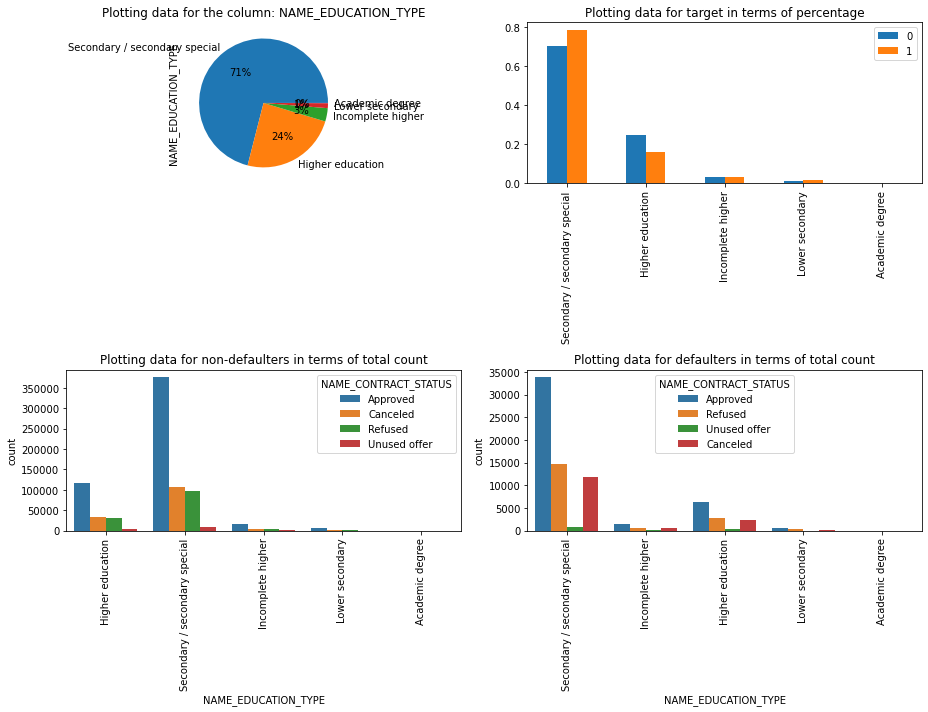

In [168]:
plotting1('NAME_EDUCATION_TYPE', 'NAME_CONTRACT_STATUS')

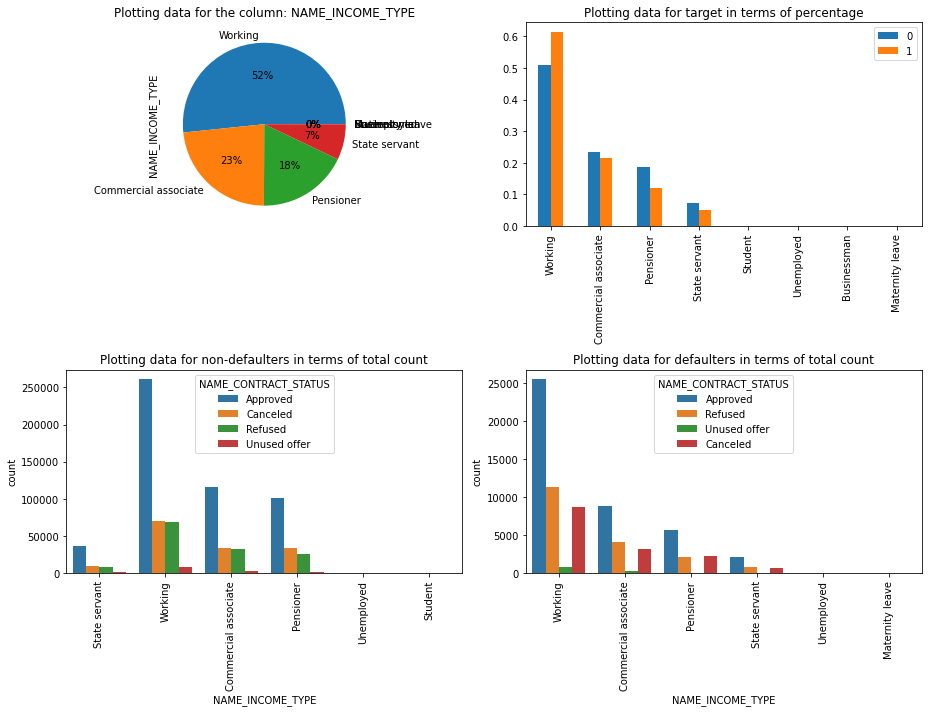

In [169]:
plotting1('NAME_INCOME_TYPE', 'NAME_CONTRACT_STATUS')

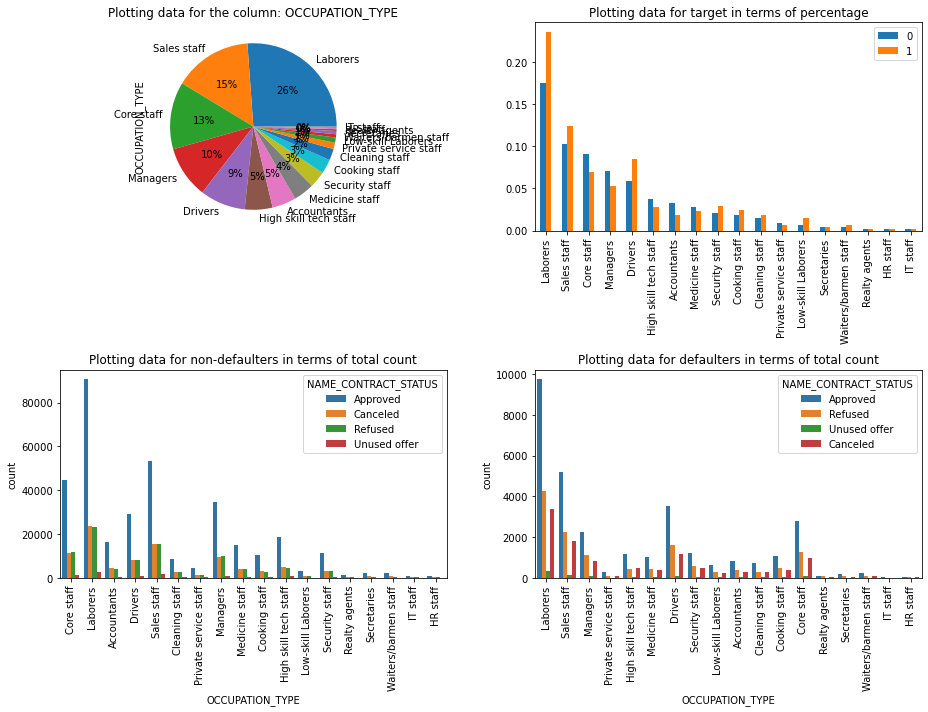

In [170]:
plotting1('OCCUPATION_TYPE', 'NAME_CONTRACT_STATUS')

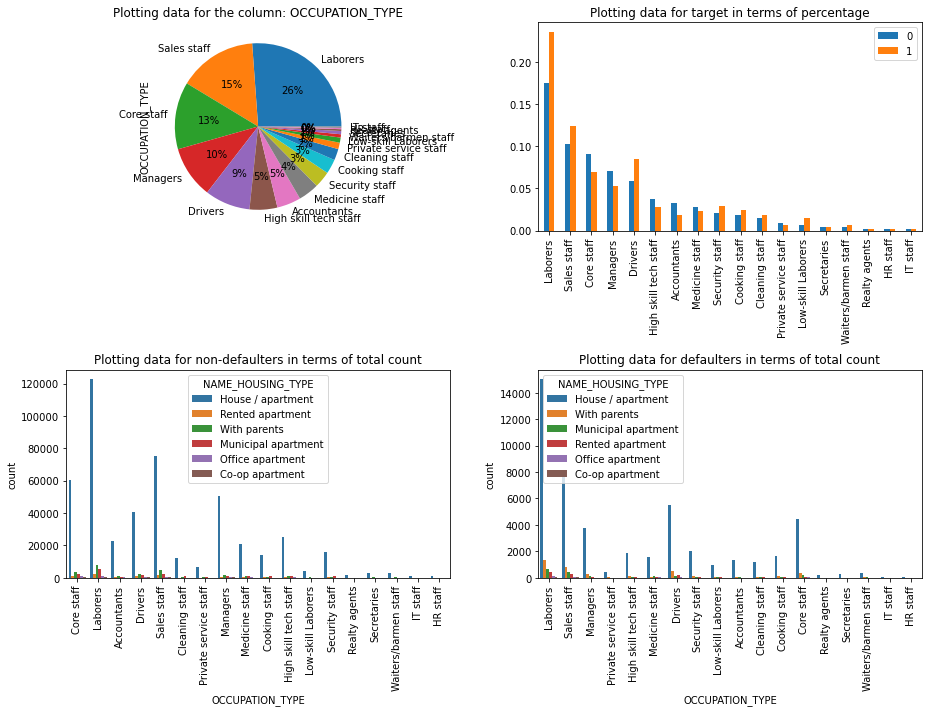

In [171]:
plotting1('OCCUPATION_TYPE','NAME_HOUSING_TYPE')

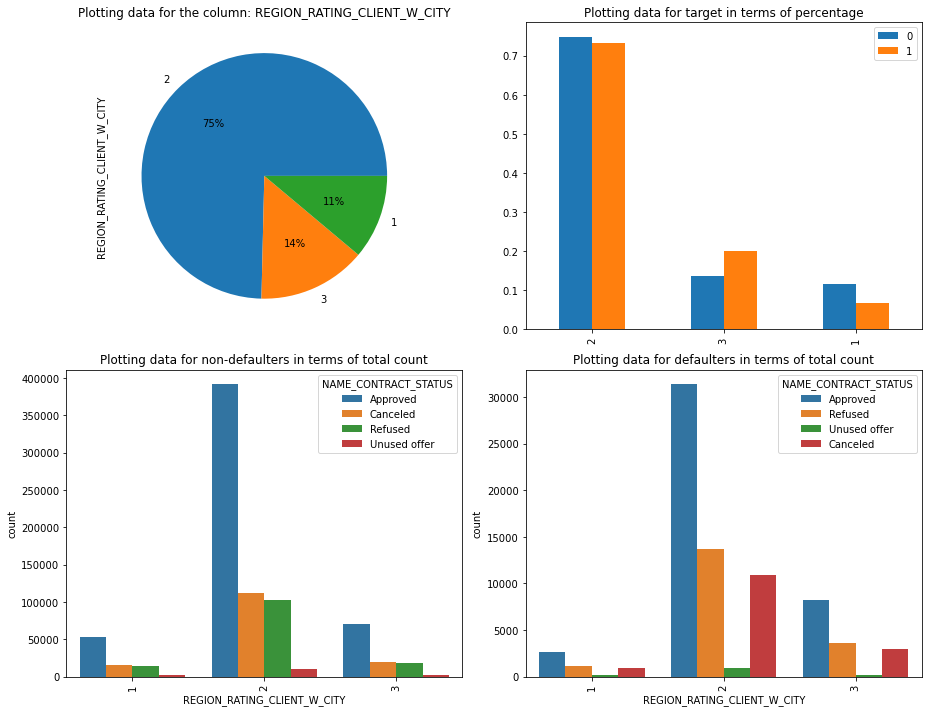

In [172]:
plotting1('REGION_RATING_CLIENT_W_CITY','NAME_CONTRACT_STATUS')

## The End